In [2]:
shape_cat=""
vol=""
z_range=""
key=""
quantile=""
test=""
z_diff=""

In [3]:
shape_cat="mcal"
vol="vlim"
z_range="all_z"

In [4]:
#This header file contains all the common packages
%matplotlib inline
%run header.py $shape_cat $vol $z_range 
%run -i func.py  
%run -i corr_func.py  

In [5]:
dz = shapes[('All', 'ZRED2')] - shapes[('All', 'Z')]
dz_std = dz.std()
z_diff = 0.1
print(dz_std)

0.03805941343307495


In [6]:
if test=="foreground":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])>=z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="background":
    members=shapes[(shapes[('All','Z')]-shapes[('All','ZRED2')])<=-z_diff]
    diff=members[('All','Z')]-members[('All','ZRED2')]
    diff.hist()
    diff.describe()
elif test=="":
    members=shapes
else:
    raise TypeError

In [7]:
# if vol!="uber":
#     members=shapes

In [8]:
if quantile!="":
    i=int(quantile)

In [9]:
if key=="lambda":
    key=('All','All','LAMBDA_CHISQ')
elif key=="z":
    key=('All','All','Z_LAMBDA')
elif key=="mag":
    key=('All','All','BCG_ZLUM')

In [10]:
def thirds_by_key(catalog,key):
    step0=catalog[key].quantile(0.0)
    step1=catalog[key].quantile(0.333333)
    step2=catalog[key].quantile(0.666666)
    step3=catalog[key].quantile(1)
    
    catalog1=catalog[(catalog[key]>step0) & (catalog[key]<step1)]
    catalog2=catalog[(catalog[key]>step1) & (catalog[key]<step2)]
    catalog3=catalog[(catalog[key]>step2) & (catalog[key]<step3)]
    
    return (catalog1,catalog2,catalog3)

In [11]:
if key!="":
    clusters_list=thirds_by_key(clusters,key)
    clusters=clusters_list[i]

In [12]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [13]:
NBINS=10

In [14]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [15]:
len(shapes)

105029

In [16]:
len(members)

105029

In [17]:
if key=="":
    assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [18]:
ng_abs=get_ng_list('abs', 'b')
ng_rel=get_ng_list('rel', 'b')

1it [00:00,  4.49it/s]

66993
30023
50054


4it [00:00,  6.18it/s]

104078
103769


6it [00:00,  6.70it/s]

75221
104272


9it [00:01,  7.74it/s]

40199
87051
86952


12it [00:01,  8.11it/s]

96839
99935


14it [00:01,  8.37it/s]

94997
103618


16it [00:01,  8.40it/s]

87860
59779


19it [00:02, 10.28it/s]

20635
53383
45650
99120


23it [00:02, 10.48it/s]

67234
39830
22134
7146
33515


29it [00:02, 13.41it/s]

28061
34061
22028
104317


32it [00:02, 14.90it/s]

44897
36939
71712
77267


34it [00:03, 13.19it/s]

78510
102682
25828


38it [00:03, 12.29it/s]

77678
88261
94376


40it [00:03, 11.01it/s]

104588
87518
104426


44it [00:03, 11.44it/s]

29568
104245
101518


46it [00:04, 10.39it/s]

104611
96519


48it [00:04,  9.04it/s]

104521
98540


51it [00:04,  9.29it/s]

96401
33294
3744
96054


55it [00:05, 10.79it/s]

58790
63139
96499


57it [00:05, 11.94it/s]

33369
53266


61it [00:05, 11.28it/s]

54080
1801
103734
61717


63it [00:05, 12.26it/s]

57356
62554
103710


67it [00:06, 11.42it/s]

92466
89516
100507


71it [00:06, 11.49it/s]

36353
86407
12818


73it [00:06, 11.70it/s]

73524
90521
21585


75it [00:06, 11.96it/s]

100185
104298
85530


80it [00:07, 12.39it/s]

40846
22921
62715
91709


82it [00:07, 12.19it/s]

69911
89048
58770


86it [00:07, 12.03it/s]

74223
50201
102673


90it [00:08, 13.44it/s]

27049
43654
45602
91363


94it [00:08, 13.87it/s]

47944
64869
34320
30138


96it [00:08, 14.38it/s]

89510
104378


98it [00:08,  9.91it/s]

79312
92284
96077


102it [00:09,  9.36it/s]

81798
103426
65006


104it [00:09,  9.28it/s]

103733
5490
49951
70592


109it [00:09, 12.61it/s]

16903
71976
103618


111it [00:09, 11.35it/s]

69412
90360
63351


115it [00:10, 11.76it/s]

25145
84771
88304


119it [00:10, 13.16it/s]

12781
33379
66605
71316


121it [00:10, 12.46it/s]

97383
58809
66066


125it [00:11, 10.58it/s]

102681
103552


127it [00:11,  9.90it/s]

97823
34162
42429


129it [00:11, 10.36it/s]

82462
77044


131it [00:11,  9.75it/s]

97875
4484
87050


133it [00:11, 10.51it/s]

103470
104400


139it [00:12,  8.33it/s]

40662
10856
1916
67370


141it [00:12,  8.64it/s]

96415
95238
35819


143it [00:13,  8.77it/s]

93290
15114
96519


147it [00:13, 10.18it/s]

57411
84202
26854


149it [00:13, 11.60it/s]

48543
68824
84684


153it [00:13, 12.17it/s]

88539
35558
51470
39534


157it [00:14, 13.26it/s]

104604
25541
30133


161it [00:14, 13.28it/s]

87917
68932
9175


163it [00:14, 13.35it/s]

63094
60317
22546
66036


167it [00:14, 13.39it/s]

72574
13152
74385


169it [00:15, 11.56it/s]

102163
22671
83322


173it [00:15, 12.22it/s]

104054
9374
20751


175it [00:15,  9.69it/s]

91189
12453
98749


180it [00:16, 11.41it/s]

28635
27827
60119
55053


182it [00:16, 11.70it/s]

64652
104361
36672


186it [00:16, 11.89it/s]

101875
43944
46217


188it [00:16, 11.50it/s]

100814
84266
103604


192it [00:17, 10.97it/s]

103013
18982
53851


194it [00:17, 11.52it/s]

35958
104593


196it [00:17, 10.18it/s]

102018
71437


198it [00:17,  9.74it/s]

81109
54208
74246


202it [00:18, 11.27it/s]

15335
97017
98939


206it [00:18, 11.23it/s]

104642
71081
11323


208it [00:18, 12.47it/s]

40495
70437
103595


210it [00:18, 10.93it/s]

98325
88069
37221


214it [00:19,  9.64it/s]

68757
26991
10989


218it [00:19,  9.32it/s]

97043
88861
103736
103221


220it [00:20,  8.11it/s]

73669
16085
61618


224it [00:20,  9.83it/s]

50014
99980
100389


226it [00:20,  9.99it/s]

47475
103120
74015


230it [00:20, 10.93it/s]

101066
15358
100797


232it [00:21,  9.90it/s]

104673
80836
62347


237it [00:21, 11.00it/s]

9558
56708
102112


239it [00:21, 10.50it/s]

104022
103461


241it [00:22, 10.14it/s]

103220
21518


243it [00:22, 10.13it/s]

103912
86208
73242


246it [00:22,  9.56it/s]

96951
104752


247it [00:22,  8.41it/s]

104378
57038
11240
41054


252it [00:23,  8.76it/s]

96980
102597


253it [00:23,  8.11it/s]

75354
71535


256it [00:23, 10.20it/s]

43843
12253
57439


258it [00:23, 10.46it/s]

74636
71118
67189


262it [00:24,  9.33it/s]

100206
93584
23882


266it [00:24, 10.85it/s]

26781
11679
98497


268it [00:24, 11.37it/s]

100591
50282
104665


270it [00:24, 10.12it/s]

97205
84478
104256


272it [00:25, 10.09it/s]

57089
83351


276it [00:25,  9.63it/s]

92711
20629
9506


278it [00:25, 10.40it/s]

102547
104167


280it [00:26,  9.47it/s]

103712
87555
84478


283it [00:26,  9.40it/s]

101831
89768
97334


287it [00:26,  8.51it/s]

104298
103777
41914


290it [00:27,  6.96it/s]

69078
102959


291it [00:27,  6.50it/s]

102428
36227


294it [00:27,  7.73it/s]

62810
103534


295it [00:27,  8.08it/s]

104452
81655
104204


298it [00:28,  7.95it/s]

61680
67318
94627


302it [00:28,  9.51it/s]

27638
96444
103664


304it [00:28,  9.51it/s]

64663
55865
83261


308it [00:29, 10.99it/s]

104599
19953
21393
56550


313it [00:29, 13.21it/s]

32133
39857
67533


315it [00:29, 11.76it/s]

103074
104508
54501


317it [00:29, 12.05it/s]

21748
65333
103754


321it [00:30, 12.87it/s]

66032
28642
104601


323it [00:30, 10.17it/s]

104548
74600


325it [00:30,  8.60it/s]

97320
41614


328it [00:31,  7.24it/s]

104608
104466
56846


330it [00:31,  7.41it/s]

101139
58979
104184


334it [00:31,  9.33it/s]

85894
22739
103755


336it [00:32,  9.29it/s]

83248
103586
68592


340it [00:32,  9.13it/s]

103217
103852
76386


342it [00:32,  9.10it/s]

61704
13554
2267
20782


346it [00:32, 11.04it/s]

103230
74957
95317


350it [00:33, 11.50it/s]

44592
63844
96357


352it [00:33, 11.31it/s]

27125
91551
58011


356it [00:33, 11.99it/s]

25023
59499
103748


358it [00:34, 10.43it/s]

83590
99729
56511


362it [00:34, 11.08it/s]

36892
96781
26031


364it [00:34,  8.36it/s]

77065
66055
73756


367it [00:35,  7.81it/s]

94793
7901
103194


371it [00:35,  8.31it/s]

67732
100450


372it [00:35,  7.51it/s]

104478
100269


375it [00:36,  9.62it/s]

74623
11968
101310


377it [00:36,  9.35it/s]

55996
62444
78091


381it [00:36,  9.25it/s]

99794
104405


382it [00:36,  7.89it/s]

101911
66395


385it [00:37,  8.03it/s]

59319
99852


387it [00:37,  8.97it/s]

31043
104004
66193


389it [00:37,  9.83it/s]

50209
103199
103689


393it [00:37, 10.43it/s]

14440
71644
75461


395it [00:37, 11.39it/s]

12146
29314
58853
103468


400it [00:38, 12.13it/s]

64590
82126
102700


402it [00:38,  7.73it/s]

93384
99951


404it [00:39,  8.20it/s]

101260
72254


407it [00:39,  8.43it/s]

17113
80553
103508


409it [00:39,  8.52it/s]

14416
85347
61897


413it [00:39, 10.29it/s]

102932
16623
103347


415it [00:40,  9.81it/s]

94966
103697


417it [00:40,  9.69it/s]

99780
87627


419it [00:40,  9.65it/s]

33407
103110
74223


423it [00:40, 10.13it/s]

82536
66769
100515


425it [00:41, 10.31it/s]

27042
104018
104474


427it [00:41,  9.98it/s]

104132
102285


430it [00:41,  9.15it/s]

101897
103274


433it [00:42,  8.46it/s]

98821
103931


434it [00:42,  7.75it/s]

102873
12487
47294


437it [00:42,  9.26it/s]

91489
68326
103653


439it [00:42,  9.28it/s]

61689
86712


443it [00:43,  7.76it/s]

23576
101735
82005


445it [00:43,  7.39it/s]

100286
94178
68487


449it [00:43,  9.16it/s]

22984
65963
64553


451it [00:44,  8.82it/s]

103123
26576
101016


455it [00:44,  9.34it/s]

103083
64920
13791


458it [00:44, 10.90it/s]

25678
94223
64554


460it [00:44, 10.93it/s]

104546
66333


462it [00:45, 10.37it/s]

68791
46921
98355


466it [00:45, 10.43it/s]

81641
96044
104007


468it [00:45,  9.81it/s]

76086
68505
69240


472it [00:46, 10.28it/s]

104296
16332
72438


476it [00:46, 11.42it/s]

55532
18628
62869


478it [00:46, 10.37it/s]

98466
103012
23602


480it [00:46, 11.37it/s]

102773
24769


482it [00:47,  8.12it/s]

87609
62423


484it [00:47,  7.68it/s]

103468


486it [00:47,  8.26it/s]

71958
104782


487it [00:47,  7.41it/s]

101326
91490


490it [00:48,  7.74it/s]

62347
104477


492it [00:48,  8.66it/s]

54896
93431
87717


494it [00:48,  8.79it/s]

61513
52636
62995


498it [00:48, 10.17it/s]

40319
104146


500it [00:49, 10.54it/s]

50743
64383
95620


502it [00:49, 10.11it/s]

103993
87571
56692


507it [00:49, 11.14it/s]

32785
36429
59080
26977


509it [00:49, 12.02it/s]

102522
102558


511it [00:50, 11.26it/s]

57692
81216
104164


515it [00:50, 11.38it/s]

21825
99658
104118


519it [00:50, 11.29it/s]

99421
59792
57592
85086


522it [00:51,  7.59it/s]

97857
103130


523it [00:51,  7.11it/s]

64999
53239


526it [00:51,  8.17it/s]

102824
61254


528it [00:52,  8.88it/s]

102199
104733


529it [00:52,  9.14it/s]

104522
99778


531it [00:52,  8.18it/s]

99988
61878
91438


535it [00:52,  9.49it/s]

89084
43366
104232


538it [00:53,  9.27it/s]

104505
103091


540it [00:53,  9.45it/s]

94810
25291
1535


543it [00:53, 10.53it/s]

87108
76320


545it [00:53, 10.35it/s]

103854
98657
33183


549it [00:54, 12.40it/s]

13535
71067
64066
73241


553it [00:54, 12.83it/s]

99426
30473
16613


555it [00:54, 12.24it/s]

104234
71194
78785


557it [00:54, 11.47it/s]

70154
98045
103528


561it [00:55,  7.99it/s]

103947
97571


563it [00:55,  8.50it/s]

58662
24148


564it [00:55,  8.76it/s]

77989
58899
79624


568it [00:56,  8.86it/s]

76738
96393
48966


572it [00:56,  9.86it/s]

101987
24242
96791


574it [00:56, 10.37it/s]

63853
28963
100423


576it [00:57,  9.24it/s]

103274
45038
69807


580it [00:57,  9.96it/s]

88976
101906


582it [00:57, 10.15it/s]

80411
97310
66849


584it [00:57,  9.37it/s]

103951
38414
95064


588it [00:58, 11.12it/s]

80300
21922
12581
104066


590it [00:58, 11.56it/s]

96305
101047


594it [00:58, 10.41it/s]

97212
63939
70901


596it [00:58,  9.41it/s]

72478
103606


598it [00:59,  9.31it/s]

63558
31293


600it [00:59,  6.18it/s]

98256
40653
82807


603it [00:59,  7.41it/s]

103755
27583
98769


607it [01:00,  8.39it/s]

103638
98617
7347


609it [01:00,  8.96it/s]

103831
96361


611it [01:00,  9.19it/s]

102287
64771


614it [01:01,  8.70it/s]

96104
104016
37999


616it [01:01,  8.97it/s]

104314
68515
51796


620it [01:01, 11.41it/s]

36302
9027
97671


624it [01:01, 12.02it/s]

64135
58789
10570


627it [01:02, 13.79it/s]

19716
8869
54752
91030


629it [01:02, 13.64it/s]

46541
102661
80281


633it [01:02,  9.98it/s]

104067
102509
103660
57378


635it [01:03,  8.62it/s]

23142
10882
102854


640it [01:03,  9.44it/s]

8512
101719
101819


644it [01:03, 10.56it/s]

34912
43215
71730


646it [01:04, 10.52it/s]

101438
13531
104133


648it [01:04,  9.05it/s]

104034
6916
103264


652it [01:04,  9.69it/s]

102888
104134


654it [01:04,  9.74it/s]

55039
63637
40858


656it [01:05, 10.03it/s]

103489
92076


658it [01:05,  8.72it/s]

93008
100429


660it [01:05,  8.95it/s]

102865
98357


662it [01:05,  8.28it/s]

102931
69555
76947


666it [01:06,  8.73it/s]

70373
103934


667it [01:06,  7.49it/s]

95752
49179


670it [01:06,  8.70it/s]

31847
104456
66376


673it [01:07,  9.16it/s]

99647
98007


674it [01:07,  8.20it/s]

101936
21446
85749


676it [01:07,  9.67it/s]

6831


679it [01:07,  8.62it/s]

30306
104732
30510
49686


683it [01:08,  9.55it/s]

104533
104320
103347
104063


687it [01:08,  8.58it/s]

99362
63272
35883


689it [01:08,  9.84it/s]

92330
70140
102195


693it [01:09, 10.36it/s]

103051
46605
88369


695it [01:09,  9.28it/s]

103747
61815
104133


699it [01:09,  9.43it/s]

81644
104733


700it [01:10,  8.29it/s]

98716
24223
63926


704it [01:10,  9.62it/s]

103936
62162


706it [01:10, 10.14it/s]

95121
64255
53559


708it [01:10, 10.00it/s]

77371
104662
77887


712it [01:11, 10.14it/s]

67173
84093
60797


714it [01:11,  9.72it/s]

98154
85533


716it [01:11, 10.74it/s]

47419
80542


719it [01:12,  8.06it/s]

103367
103272
55656


722it [01:12,  7.89it/s]

104366
101364


723it [01:12,  7.87it/s]

104479
64872


726it [01:13,  8.19it/s]

96608
102869


729it [01:13,  8.26it/s]

86460
66665
95156
104544


732it [01:13,  8.52it/s]

77919
80747
86976


735it [01:13,  8.92it/s]

94115
70518
103194


737it [01:14,  7.80it/s]

98064
98363


740it [01:14,  8.01it/s]

103664
58872


742it [01:14,  9.14it/s]

48644
99380
102438


745it [01:15,  9.46it/s]

77347
54423
97922


747it [01:15,  9.81it/s]

47366
102891
104337


751it [01:15, 10.50it/s]

104396
15205
99567


753it [01:15,  9.14it/s]

97175
98874


755it [01:16,  6.67it/s]

97636
94980


758it [01:16,  5.44it/s]

57749
57326
98573


761it [01:17,  6.98it/s]

56351
51181
83032


766it [01:17,  9.56it/s]

94230
33488
31016
32556


769it [01:17, 11.50it/s]

36400
3636
61871
97084


771it [01:17, 10.87it/s]

104159
104480


773it [01:18,  9.91it/s]

58337
97974
93007


777it [01:18, 10.13it/s]

31124
76259


779it [01:18,  9.47it/s]

96043
86055


781it [01:18, 10.87it/s]

80172
27847
14842
34112


784it [01:19, 11.89it/s]

104169
94764


788it [01:19, 10.50it/s]

98231
56832
104538
103121


790it [01:19,  9.44it/s]

81513
104243
76953


794it [01:20, 10.17it/s]

56221
71083
89857


798it [01:20,  9.09it/s]

85549
63063
56853


800it [01:20, 10.10it/s]

35857
39036
96015


802it [01:21,  9.16it/s]

104757
18260
89186


806it [01:21, 11.92it/s]

47082
43092
104525


808it [01:21, 11.88it/s]

12410
100616


810it [01:21, 11.27it/s]

79999
103246
104302


814it [01:22, 11.04it/s]

61627
47161
57639


816it [01:22, 10.66it/s]

104379
37702
6470
90511


819it [01:22, 11.84it/s]

9690
53528
104720


824it [01:22, 11.99it/s]

61103
103932
104211


826it [01:23, 10.93it/s]

60421
39237
99896


830it [01:23, 12.28it/s]

77581
27410
86984


832it [01:23, 10.77it/s]

85490
33384
104253


834it [01:23, 11.45it/s]

53187


836it [01:24,  8.43it/s]

67727
30980
102484


840it [01:24,  9.85it/s]

51996
104177
43081


842it [01:24,  9.87it/s]

102500
16293
34288


845it [01:24, 10.92it/s]

95853
104768


847it [01:25, 10.54it/s]

87539
68252


849it [01:25,  9.89it/s]

85539
61096
85329


853it [01:25,  9.79it/s]

99866
81417
42008


855it [01:25,  9.67it/s]

104527
80133


857it [01:26, 10.89it/s]

44414
78801


859it [01:26,  9.29it/s]

104475
104044


861it [01:26,  8.54it/s]

103622
71753


865it [01:26, 10.06it/s]

100550
49680
30847


867it [01:27, 10.16it/s]

87351
89991
101135


869it [01:27,  9.21it/s]

94123
72732
26737


873it [01:27, 10.95it/s]

56775
63253
94942
39757


877it [01:28,  8.49it/s]

28778
103625


878it [01:28,  7.49it/s]

100185
78721


882it [01:28, 10.15it/s]

36127
58640
22703
39200


885it [01:28, 11.11it/s]

31233
101051
68450


887it [01:29, 10.55it/s]

100601
99285


889it [01:29,  8.99it/s]

104335
103170
14432


893it [01:29, 10.05it/s]

10522
104075


895it [01:30,  9.77it/s]

90062
28903
104306


897it [01:30,  9.26it/s]

95788
74695


900it [01:30,  9.55it/s]

23364
93470
99610


902it [01:30,  9.25it/s]

92659
83453
93022


906it [01:31, 10.82it/s]

64575
20775
97608


908it [01:31,  9.65it/s]

104636
99639


912it [01:31, 11.09it/s]

46865
11392
63330
85702
68513


916it [01:32,  9.00it/s]

57128
104150
99474


919it [01:32,  8.57it/s]

103166
104718


920it [01:32,  8.24it/s]

103303
75864


923it [01:33,  8.38it/s]

54226
42660
103954


927it [01:33,  9.23it/s]

52430
35283
64518


929it [01:33,  9.22it/s]

104546
98327
104575
104662


933it [01:34,  7.89it/s]

101265
100983


934it [01:34,  6.81it/s]

102450
103225


935it [01:34,  7.42it/s]

71389
85039


939it [01:35,  8.88it/s]

61949
62885
100864


942it [01:35, 10.08it/s]

10258
75112
104218


944it [01:35,  9.34it/s]

79449
101376


946it [01:35,  9.20it/s]

95706
48691


948it [01:35,  9.44it/s]

65926
101987
103983


951it [01:36,  9.00it/s]

104437
101796


952it [01:36,  7.78it/s]

60069


955it [01:37,  6.70it/s]

104578
104482


957it [01:37,  7.22it/s]

74137
52909


959it [01:37,  8.36it/s]

67360
64785
46972


961it [01:37,  8.40it/s]

103504
18172
63471


965it [01:38,  9.05it/s]

102852
104214


967it [01:38,  9.82it/s]

57391
17440
53260


969it [01:38, 10.92it/s]

58934
104400


973it [01:38, 11.29it/s]

103024
44698
24154


975it [01:38, 10.66it/s]

100670
102931
71963


977it [01:39, 11.08it/s]

2493
42299
101941


981it [01:39, 11.09it/s]

50699
91162


983it [01:39, 10.87it/s]

101778
30457
101959


985it [01:39, 11.81it/s]

21389
101554
67662


989it [01:40, 11.89it/s]

43973
84944
103770


991it [01:40, 11.49it/s]

17331
26786
101370


995it [01:40,  9.78it/s]

104620
64452
59761


997it [01:40, 10.15it/s]

52901
96874
85490


1002it [01:41, 11.60it/s]

18326
32228
65767
86640


1004it [01:41, 11.03it/s]

69777
55582
83916


1008it [01:41, 10.48it/s]

95969
83223
97565


1010it [01:42,  9.50it/s]

103305
71105
64013


1014it [01:42,  9.12it/s]

104730
66696


1016it [01:42,  9.16it/s]

71796
48252


1018it [01:42, 10.50it/s]

92034
18222
102512


1020it [01:43,  9.52it/s]

93409
103911


1022it [01:43,  8.92it/s]

83876
99533


1025it [01:43,  9.55it/s]

74564
65021
51492


1028it [01:44,  9.59it/s]

80082
87434
95750


1031it [01:44,  9.30it/s]

42920
103730
70298


1034it [01:44,  7.87it/s]

70543
103461
67972


1037it [01:45,  8.62it/s]

76462
89005
104147


1039it [01:45,  8.12it/s]

55931
45073
72949


1043it [01:45, 10.06it/s]

23387
77650
83717
69478


1047it [01:46,  8.40it/s]

103637
104679


1049it [01:46,  8.66it/s]

98472
12187


1050it [01:46,  8.78it/s]

104629
87866
42025


1053it [01:46,  9.07it/s]

103832
52203
83344


1056it [01:47,  9.40it/s]

104155
59204
98371


1059it [01:47,  8.40it/s]

103328
63600


1061it [01:47,  8.74it/s]

100798
56177


1065it [01:48,  9.28it/s]

99881
52470
3898


1067it [01:48,  8.97it/s]

103754
95303


1068it [01:48,  7.74it/s]

104182
101668


1070it [01:48,  8.54it/s]

102017
65211
98655


1073it [01:49,  7.70it/s]

97096
77653
42705


1077it [01:49,  9.32it/s]

30116
99354
33373


1081it [01:49, 11.41it/s]

38109
49127
73843


1083it [01:50, 11.40it/s]

104396
59158
101792


1085it [01:50,  9.45it/s]

103685
32811


1087it [01:50, 10.32it/s]

104561
19206
59039


1091it [01:50, 10.45it/s]

80004
66525


1093it [01:51, 10.22it/s]

95336
101742
104458
61405


1097it [01:51, 10.54it/s]

64991
29975
101335


1099it [01:51, 10.17it/s]

27020
97168
47305


1103it [01:52, 10.02it/s]

66253
89889
61015


1105it [01:52, 10.65it/s]

15604
79398
92947


1107it [01:52, 10.42it/s]

104178
100753


1110it [01:52,  8.51it/s]

103551
81306


1113it [01:53,  6.35it/s]

36553
97632
69409


1116it [01:53,  8.23it/s]

76527
38361
56579


1118it [01:53,  8.52it/s]

104577
104445


1120it [01:54,  8.70it/s]

103083
103545


1122it [01:54,  7.87it/s]

104080
23634
55163


1126it [01:54,  8.38it/s]

98979
101005


1127it [01:55,  7.44it/s]

94827
52025
38611


1130it [01:55,  9.05it/s]

60282
95467


1132it [01:55,  8.33it/s]

95865
41778


1134it [01:55,  7.82it/s]

103879


1136it [01:56,  8.33it/s]

99810
83484
14909


1138it [01:56,  8.63it/s]

102509
65906
72836


1142it [01:56,  8.41it/s]

91195
90911


1143it [01:56,  7.61it/s]

104478
97005


1146it [01:57,  8.02it/s]

41736
31713
98498


1148it [01:57,  7.93it/s]

67682
3200
92753


1152it [01:57,  8.47it/s]

67073
69475
100619


1154it [01:58,  8.82it/s]

51387
104276
104164


1157it [01:58,  7.41it/s]

104744
102199


1158it [01:58,  7.88it/s]

90519
104112


1162it [01:59,  8.31it/s]

104452
104368


1163it [01:59,  7.37it/s]

104551
101910


1166it [01:59,  9.02it/s]

60869
70015
76146


1168it [01:59,  8.45it/s]

104405
60898
61049


1173it [02:00,  9.97it/s]

103084
14239
75048


1175it [02:00, 10.49it/s]

88872
64923
48344


1179it [02:00, 12.57it/s]

52062
10162
86477
95421


1181it [02:00, 12.01it/s]

30992
49226
99632


1183it [02:01, 11.24it/s]

100416
104273


1187it [02:01,  9.40it/s]

50249
59591
87345
103828


1191it [02:02,  5.84it/s]

103278
101887
85343
67441


1196it [02:02,  7.43it/s]

43379
5543
99810


1198it [02:03,  7.79it/s]

102048
103769


1199it [02:03,  7.00it/s]

102209
66117


1201it [02:03,  8.57it/s]

33401
63936
85345


1205it [02:03,  9.57it/s]

103585
60016
4183


1207it [02:03,  9.85it/s]

101997
97790
63429


1211it [02:04, 10.09it/s]

104264
57301
104142


1213it [02:04,  9.80it/s]

70125
70842
97464


1217it [02:04,  9.95it/s]

46606
95011


1219it [02:05, 10.03it/s]

76853
51283


1221it [02:05, 10.05it/s]

103625
82650
97956


1224it [02:05,  8.77it/s]

104121
102609


1225it [02:05,  8.29it/s]

74675
58916


1228it [02:06,  8.12it/s]

79154
104553
29586


1230it [02:06,  6.59it/s]

83019
85113
35253


1233it [02:06,  7.96it/s]

90524
25319
90570


1236it [02:07,  9.14it/s]

92868
62858
81362


1238it [02:07,  9.94it/s]

95590
73989


1242it [02:07,  9.23it/s]

19555
103885


1244it [02:07, 10.45it/s]

63766
48510
47527


1246it [02:08, 10.78it/s]

80383
86840
95334


1248it [02:08, 10.55it/s]

90024
104176


1251it [02:08,  9.09it/s]

104564
104577


1254it [02:09,  8.16it/s]

56494
104368
103428


1256it [02:09,  7.87it/s]

104067
67690
26819


1260it [02:09,  9.64it/s]

50738
102236
98979


1262it [02:10,  8.23it/s]

104440
16388
21712


1265it [02:10,  9.55it/s]

86933
22968
103449


1267it [02:10, 10.64it/s]

104102


1270it [02:10,  7.55it/s]

69365
95429


1271it [02:11,  7.04it/s]

95971
76673


1273it [02:11,  7.82it/s]

103665
76401
103332


1277it [02:11,  8.34it/s]

103957
104389
38230


1281it [02:12, 10.05it/s]

64515
5334
63781
100893


1283it [02:12,  9.57it/s]

91958
73021
57670


1287it [02:12,  8.96it/s]

104254
101293
53280


1291it [02:13, 10.36it/s]

84287
22378
28885
28345


1295it [02:13, 12.55it/s]

56231
16823
52484


1297it [02:13, 11.23it/s]

90631
104599
104283


1301it [02:14,  9.16it/s]

104252
79218
38947


1303it [02:14,  8.75it/s]

104751
103051


1304it [02:14,  7.54it/s]

90958
58715


1307it [02:14,  8.26it/s]

104561
100954
59188


1310it [02:15,  6.15it/s]

84523
103832


1312it [02:15,  7.02it/s]

99472
98670


1314it [02:15,  8.28it/s]

18975
66993
47285


1316it [02:16,  9.48it/s]

72656
103703
61106


1320it [02:16,  9.46it/s]

95845
80941
104315


1322it [02:16,  8.78it/s]

101837
71852
67346


1326it [02:17,  8.83it/s]

102145
103446


1327it [02:17,  9.14it/s]

92555
104184


1330it [02:17,  8.96it/s]

49644
63128
103394


1333it [02:17,  8.98it/s]

71929
95531
47100


1335it [02:18,  9.24it/s]

104377
90314


1339it [02:18,  8.61it/s]

104198
102485
83882


1340it [02:18,  8.35it/s]

65068
89083


1342it [02:19,  7.77it/s]

104570
48180
103871


1346it [02:19,  8.22it/s]

101129
97271
96790


1349it [02:20,  6.19it/s]

86809
68254
103313


1352it [02:20,  7.51it/s]

63458
68589
64768


1354it [02:20,  7.96it/s]

79195
102540


1357it [02:20,  8.56it/s]

69272
21344


1359it [02:21,  8.16it/s]

104178
103366


1360it [02:21,  7.01it/s]

99384
104489


1362it [02:21,  7.75it/s]

102852
65804
100684


1366it [02:21,  9.33it/s]

63017
31732
11710
103239


1368it [02:22, 10.11it/s]

104476
104164


1372it [02:22, 10.68it/s]

91270
5459
47349
103146


1376it [02:22, 10.58it/s]

60249
102446
86272


1378it [02:23,  9.33it/s]

86392
64536
103619


1382it [02:23,  9.40it/s]

91761
99251


1383it [02:23,  8.51it/s]

101984
77743


1384it [02:23,  7.67it/s]

25639
57640
69601


1389it [02:24,  8.23it/s]

81294
101601


1392it [02:24,  8.46it/s]

96923
54750
104477
97225


1395it [02:25,  8.50it/s]

102697
102594
62532


1397it [02:25,  9.13it/s]

16313
55754
51585


1401it [02:25,  9.77it/s]

87046
103695
102506
103930


1407it [02:26, 11.07it/s]

2476
27832
16331
61967
104598


1409it [02:26, 11.88it/s]

26352
64432
96891


1411it [02:26, 10.62it/s]

104431
97052


1415it [02:26,  9.97it/s]

65579
81301
102789


1417it [02:27,  8.81it/s]

101595
61899


1419it [02:27,  9.34it/s]

104732
97406


1422it [02:27,  9.28it/s]

34518
103357
102538


1425it [02:28,  9.35it/s]

56351
77371
79800


1428it [02:28,  7.49it/s]

104423
103606
46216


1430it [02:28,  7.78it/s]

100332
92659


1432it [02:29,  8.39it/s]

87658
74292


1435it [02:29,  8.64it/s]

41023
97072
64512


1437it [02:29,  8.77it/s]

103177
61768
79407


1441it [02:29,  9.58it/s]

46109
98143
59463


1443it [02:30, 10.30it/s]

52754
104405


1445it [02:30,  9.67it/s]

102152
98009


1447it [02:30,  8.68it/s]

100942
89385
92461


1451it [02:31,  8.90it/s]

96174
104446
67705


1454it [02:31,  9.04it/s]

21785
103240
57781


1456it [02:31,  9.07it/s]

62094
58978


1458it [02:31,  9.46it/s]

104397
86402


1461it [02:32,  9.25it/s]

29216
65124
101644


1463it [02:32,  9.53it/s]

35007
17773
77616


1467it [02:32,  9.32it/s]

17566
90806
6685
16578


1470it [02:32, 11.02it/s]

64947
79966
90564


1474it [02:33, 11.25it/s]

99871
19115
76750


1478it [02:33, 11.69it/s]

71888
57747
65044
54851
89662


1480it [02:33, 10.22it/s]

99353
102183


1484it [02:34,  8.97it/s]

70114
104471


1485it [02:34,  7.86it/s]

104431
47768
64486


1489it [02:34,  9.47it/s]

77572
55492
5636


1491it [02:35, 10.86it/s]

101491
52559


1493it [02:35, 10.54it/s]

88330
104533
81137


1497it [02:35,  9.65it/s]

68203
67348
104396
104324


1501it [02:36,  8.05it/s]

104597
90212


1502it [02:36,  6.65it/s]

104608
28663
27855
100283


1509it [02:37, 10.34it/s]

1934
79040
55757
11662


1512it [02:37, 12.33it/s]

31242
47523
26029
71853


1514it [02:37, 12.49it/s]

63673
104636


1518it [02:37, 10.40it/s]

17503
67398
100318


1520it [02:37, 11.97it/s]

67088
4897
99939


1522it [02:38,  9.69it/s]

94431
103645


1524it [02:38,  9.68it/s]

67556
103571


1526it [02:38,  9.06it/s]

91884
42274
78863


1530it [02:38, 10.86it/s]

20676
104217
102032


1532it [02:39,  8.80it/s]

104530
67333


1534it [02:39,  9.14it/s]

99760
104152


1538it [02:39, 10.35it/s]

13596
99072
4558


1540it [02:40, 10.13it/s]

92384
97732
100616
94214


1542it [02:40,  9.22it/s]

81574
86800


1544it [02:40,  8.80it/s]

104417


1548it [02:41,  6.29it/s]

37451
46292
101882


1550it [02:41,  7.58it/s]

77120
47353
104876


1554it [02:41,  9.51it/s]

65589
71957
36849
23309


1556it [02:41,  9.84it/s]

103590
103645
59319


1560it [02:42,  9.67it/s]

90482
95592
103984


1564it [02:42, 10.11it/s]

103195
30124
103857


1566it [02:42,  9.89it/s]

70624
60972
1694


1568it [02:43, 10.61it/s]

104342
104169


1570it [02:43, 10.22it/s]

103254
103370


1572it [02:43,  9.19it/s]

100714
61604
104326


1577it [02:43, 10.34it/s]

97325
27973
103655


1579it [02:44, 10.35it/s]

16931
83023
104653
94971


1583it [02:44,  9.95it/s]

52394
101480
94488


1586it [02:45,  7.95it/s]

63239
98991
67138


1589it [02:45,  8.73it/s]

85093
70519
100231


1591it [02:45,  8.34it/s]

55565
98822


1592it [02:45,  8.58it/s]

55617
103534


1596it [02:46,  8.66it/s]

69828
88311


1597it [02:46,  7.65it/s]

102421
70415


1599it [02:46,  8.40it/s]

100675
65816
30480


1602it [02:46,  9.13it/s]

95533
61606
63394


1605it [02:47,  9.35it/s]

101525
22325
88249


1609it [02:47, 10.51it/s]

104029
55484
83497


1611it [02:47,  9.73it/s]

103988
103093
63063


1615it [02:48,  9.76it/s]

65380
66868


1617it [02:48,  9.78it/s]

91869
43317


1619it [02:48,  9.47it/s]

103627
96759
39402


1622it [02:48,  8.67it/s]

95429
104516


1623it [02:49,  8.21it/s]

98809
84127


1627it [02:49,  7.30it/s]

97837
39724
15429


1629it [02:49,  8.80it/s]

86438
12424
103501


1631it [02:50,  8.64it/s]

100616
56958
98729


1635it [02:50,  9.94it/s]

42868
103700
63043


1637it [02:50, 10.40it/s]

21528
65280


1639it [02:50, 10.08it/s]

102767
59105


1641it [02:51,  9.22it/s]

103328
73010
37799


1645it [02:51,  9.66it/s]

104468
104123
87392
77373


1649it [02:51,  9.52it/s]

65647
103833
59655


1652it [02:52,  9.07it/s]

103978
103737


1653it [02:52,  8.20it/s]

80424
75280
17923


1657it [02:52,  9.74it/s]

104593
71437


1659it [02:52, 11.17it/s]

92712
12380
103940


1661it [02:53, 10.28it/s]

63294
33610
99979


1665it [02:53,  9.00it/s]

57196
104264
87258


1667it [02:53,  9.18it/s]

64343
101104
103357


1670it [02:54,  8.68it/s]

104053
92018


1672it [02:54,  9.06it/s]

104174
73185


1675it [02:54,  8.69it/s]

59489
103569
46921


1676it [02:54,  8.61it/s]

42253
55180
104448


1681it [02:55, 10.63it/s]

74608
59621
66615


1683it [02:55,  9.87it/s]

104051
33193
102113


1685it [02:55, 10.91it/s]

104273
103353


1687it [02:55,  9.49it/s]

102801
100934


1690it [02:56,  9.06it/s]

102301
67470
59026


1694it [02:56,  9.49it/s]

103464
103814
12190
29006


1698it [02:56, 11.09it/s]

60195
104604
87245


1700it [02:57,  9.67it/s]

103736
104353
4489


1705it [02:57,  9.14it/s]

104190
31807
58638


1707it [02:58,  9.60it/s]

92762
78777
54796


1709it [02:58,  9.49it/s]

85835
39431
58433


1713it [02:58, 10.64it/s]

78206
95493


1715it [02:58, 11.28it/s]

66391
27398
102013
40334


1719it [02:59, 11.77it/s]

56460
47910
47447


1721it [02:59, 12.11it/s]

103598
104377


1725it [02:59, 11.03it/s]

103737
45502
50584


1727it [02:59, 10.50it/s]

104580
97189
103698
73044


1731it [03:00, 10.00it/s]

51152
103706
12960


1734it [03:00, 11.31it/s]

11031
93314
101523


1738it [03:00, 11.16it/s]

104711
97492
32629


1740it [03:01,  9.99it/s]

104453
64193
97798
77907


1743it [03:01,  7.79it/s]

101909
20090
104272


1748it [03:01,  9.69it/s]

47686
36669
104279


1750it [03:02,  9.95it/s]

103346
68228
103476


1752it [03:02,  8.98it/s]

77582
98684


1755it [03:02,  8.83it/s]

76869
83311


1756it [03:02,  8.96it/s]

101036
83608
67948


1761it [03:03, 10.39it/s]

43405
35595
103512


1763it [03:03, 10.48it/s]

90300
41640
56940


1765it [03:03, 10.34it/s]

73507
60842


1767it [03:03, 10.60it/s]

104478
86291


1769it [03:04,  9.67it/s]

103515
103983


1771it [03:04,  9.52it/s]

103974
103797


1774it [03:04,  7.98it/s]

86440
98099
87533


1777it [03:05,  8.53it/s]

45199
65170
50128


1779it [03:05,  8.88it/s]

79274
104664
15222


1782it [03:05,  7.54it/s]

103220
5547
68398
59560


1787it [03:06,  8.87it/s]

104526
101267
42195


1789it [03:06,  8.71it/s]

78449
69116


1791it [03:06,  8.35it/s]

103148
104481


1794it [03:07,  8.79it/s]

80610
85626
17007


1797it [03:07,  9.25it/s]

98075
101468
57783


1800it [03:07,  9.09it/s]

76762
98142


1801it [03:07,  8.00it/s]

103921
99954


1803it [03:08,  8.65it/s]

103390
102678


1806it [03:08,  8.82it/s]

65093
57140
102177


1808it [03:08,  7.71it/s]

102348
103694


1810it [03:08,  8.42it/s]

100249
103694


1813it [03:09,  7.82it/s]

104448
103418


1814it [03:09,  7.04it/s]

91669
84160


1815it [03:09,  7.59it/s]

67123
92303


1819it [03:10,  7.57it/s]

102938
101697


1820it [03:10,  7.69it/s]

70427
99929


1823it [03:10,  5.70it/s]

85975
101083


1824it [03:11,  5.44it/s]

100761
25249


1828it [03:11,  8.18it/s]

68977
71627
35926
103530
88545


1832it [03:11,  8.52it/s]

104190
50627
81729


1835it [03:12,  8.72it/s]

104284
104086
22350


1837it [03:12, 10.16it/s]

15060
103401


1839it [03:12,  9.90it/s]

101564
101451


1842it [03:12,  9.07it/s]

104464
99637


1843it [03:12,  7.96it/s]

99026
43035


1845it [03:13,  9.06it/s]

104061
84015
86191


1849it [03:13,  9.28it/s]

94941
80643
101520


1851it [03:13,  8.58it/s]

102950
96989


1855it [03:14,  9.11it/s]

104151
60516
87042
103938


1857it [03:14,  7.04it/s]

103194
61266


1859it [03:14,  8.23it/s]

63381
103251


1862it [03:15,  6.22it/s]

103449
103413
52487


1864it [03:15,  7.44it/s]

100780
90142
37823


1867it [03:15,  8.54it/s]

103328
75514
86349


1869it [03:16,  9.32it/s]

102068
104431


1873it [03:16,  8.19it/s]

97740
55114


1875it [03:16,  8.79it/s]

103701
101153
63724


1879it [03:17, 10.09it/s]

67272
2321
55894
100863


1881it [03:17, 10.07it/s]

82415
93101
80068


1885it [03:17, 10.04it/s]

80825
66659
103539


1887it [03:17, 10.52it/s]

15640
100590
104402


1891it [03:18,  9.49it/s]

103914
95341
16917


1893it [03:18,  9.80it/s]

68483
103748


1896it [03:18,  8.99it/s]

81137
26564
46427


1898it [03:19,  9.73it/s]

104297
104165


1901it [03:19,  8.18it/s]

59875
85925
102567


1903it [03:19,  7.46it/s]

104226
99937


1906it [03:20,  8.48it/s]

92285
14990
51954


1908it [03:20,  9.27it/s]

104519
103577


1912it [03:20,  9.73it/s]

48966
49694
54785
56199


1914it [03:20, 10.47it/s]

86064
43897
104404


1918it [03:21, 10.07it/s]

100653
103586
99950
104378


1921it [03:21,  8.64it/s]

97127
103823


1924it [03:21,  8.36it/s]

59435
62426
80031


1926it [03:22,  8.28it/s]

101344
103648


1929it [03:22,  8.51it/s]

86152
62392


1931it [03:22,  9.19it/s]

61169
103495
62386


1935it [03:23, 10.33it/s]

104008
23011
97879
76389
103887


1937it [03:23,  9.47it/s]

50752
103314


1941it [03:23,  8.38it/s]

99787
103769


1942it [03:24,  7.57it/s]

104368
101485


1943it [03:24,  7.72it/s]

91317
104372


1947it [03:24,  8.30it/s]

76180
76320


1948it [03:24,  8.19it/s]

104566
77633


1951it [03:25,  8.19it/s]

75910
74639
17546


1953it [03:25,  8.00it/s]

103988
45437
91402


1957it [03:25,  8.17it/s]

101001
103287


1959it [03:26,  8.30it/s]

54804
104098


1961it [03:26,  8.72it/s]

101684
100680


1962it [03:26,  7.23it/s]

101244
13732


1965it [03:26,  8.26it/s]

103685
54839


1967it [03:27,  8.44it/s]

103329
100932


1968it [03:27,  7.21it/s]

102694
103211


1971it [03:27,  8.45it/s]

14651
104520
56495


1972it [03:27,  8.15it/s]

14418
53368
104190


1977it [03:28,  9.16it/s]

97190
101870
18464


1980it [03:28,  7.29it/s]

103568
83416
8403


1984it [03:28,  9.93it/s]

24587
55737
77143
104686
99481


1988it [03:29,  9.12it/s]

29546
102615


1990it [03:29,  9.21it/s]

104354
96756
75580


1994it [03:29, 10.20it/s]

92522
90426
31905
66175
104500


1996it [03:30,  9.14it/s]

100263
88285


2000it [03:30,  9.11it/s]

60612
70442
93120


2002it [03:30,  8.86it/s]

98858
48868
67853


2006it [03:31, 10.71it/s]

31647
77067
28261


2008it [03:31, 10.85it/s]

74214
65851
41053


2012it [03:31, 11.19it/s]

63533
81825
104511
102734


2016it [03:32,  8.98it/s]

68664
104544
39730
67258


2020it [03:32,  7.79it/s]

102594
102176


2023it [03:33,  7.97it/s]

75875
69603
104532
60121


2025it [03:33,  8.52it/s]

103689
13979
102785


2029it [03:33, 10.21it/s]

61783
85285
103143


2031it [03:34,  9.02it/s]

104403
82999


2033it [03:34,  9.23it/s]

100034
104452


2035it [03:34,  8.10it/s]

95157
70061
103708


2039it [03:35,  8.63it/s]

96430
104604
68177


2042it [03:35,  8.37it/s]

103903
83698


2043it [03:35,  8.27it/s]

103905
73435


2046it [03:35,  8.90it/s]

62804
32766
69002


2048it [03:36,  8.79it/s]

100279
45421
65480


2052it [03:36, 10.90it/s]

102186
12492
46982
81646


2056it [03:36,  9.81it/s]

103903
103831
44767


2058it [03:37,  6.91it/s]

103471
91324


2062it [03:37,  8.34it/s]

104535
36214
99247
92833


2066it [03:38,  9.92it/s]

84167
21708
87273
8911


2068it [03:38, 10.45it/s]

85780
104466
68554


2072it [03:38, 10.54it/s]

91198
33060
61571


2074it [03:38, 10.08it/s]

104456
77842
103910


2078it [03:39,  9.32it/s]

101499
63401


2080it [03:39,  9.07it/s]

88553
58610


2082it [03:39,  9.57it/s]

73232
88346
78557


2084it [03:39,  9.06it/s]

103512
38028
98905


2088it [03:40, 10.75it/s]

42162
87860
101401


2090it [03:40,  9.59it/s]

91969
42363
97257


2092it [03:40, 10.62it/s]

103737
99880


2094it [03:40,  9.37it/s]

81538
101272


2098it [03:41,  8.66it/s]

60879
38508
102654


2100it [03:41,  8.83it/s]

74429
57800
104174


2104it [03:42,  8.95it/s]

103324
104133
80256
95330


2108it [03:42,  9.15it/s]

60004
99453
95615


2111it [03:42,  8.56it/s]

60190
100940
56209


2114it [03:43,  8.93it/s]

104333
104012


2116it [03:43,  8.26it/s]

104408
24542


2118it [03:43,  8.28it/s]

103993
97452


2119it [03:43,  7.51it/s]

65050
64795


2121it [03:44,  8.24it/s]

104367
104103


2124it [03:44,  8.41it/s]

101155
104380


2125it [03:44,  7.59it/s]

97680
72351


2128it [03:44,  8.40it/s]

94005
52331


2129it [03:45,  6.86it/s]

100927
80030


2132it [03:45,  7.98it/s]

97406
46990


2134it [03:45,  8.15it/s]

100841
94452
104345


2137it [03:46,  6.60it/s]

102487
104609


2138it [03:46,  7.22it/s]

104488
103527


2140it [03:46,  7.12it/s]

104469
20556
104300


2144it [03:47,  8.55it/s]

100543
102961


2146it [03:47,  7.63it/s]

85926
102930
57004


2148it [03:47,  7.76it/s]

100597
94315


2151it [03:47,  8.60it/s]

100659
104310


2154it [03:48,  8.03it/s]

86089
78869
103889
29348


2157it [03:48,  8.70it/s]

103813
104332
21351


2160it [03:48,  9.48it/s]

68563
103310
66411


2163it [03:49,  8.87it/s]

92858
89411
44923


2165it [03:49,  8.81it/s]

86255
92384


2167it [03:49, 10.06it/s]

31411
94983


2170it [03:50,  9.26it/s]

103673
100604


2171it [03:50,  8.24it/s]

87113
45849
40972


2174it [03:50,  9.98it/s]

62883
103449


2176it [03:50,  8.22it/s]

6457
96240
96619


2179it [03:51,  7.74it/s]

102410
76598
99251


2183it [03:51,  8.62it/s]

85257
75997
50306


2187it [03:51, 10.20it/s]

104212
39358
67596
68759
101744


2190it [03:52,  9.31it/s]

101190
91125


2193it [03:52,  8.37it/s]

90373
101342
83417


2196it [03:52,  8.35it/s]

88173
103938
26644


2198it [03:53,  9.18it/s]

65131
58929


2200it [03:53, 10.02it/s]

78925
4653
98935


2204it [03:53, 10.03it/s]

63165
100244


2206it [03:53, 10.01it/s]

91507
100434
21653
21594


2210it [03:54, 11.63it/s]

51176
104431
103366


2212it [03:54, 11.16it/s]

41878
87558
27337


2216it [03:54,  9.33it/s]

74226
77614
85113


2218it [03:55,  9.14it/s]

77986
87357
104392


2221it [03:55,  7.46it/s]

104397
104063


2224it [03:55,  8.17it/s]

99604
24639


2227it [03:56,  9.46it/s]

51883
22461
67247


2229it [03:56, 10.19it/s]

70034
72754
98969


2231it [03:56, 10.07it/s]

26187
63299
63220


2233it [03:56, 10.37it/s]

104535
93213


2237it [03:57,  9.67it/s]

12895
70481


2239it [03:57,  9.52it/s]

96790
76938


2240it [03:57,  8.02it/s]

89281
60293


2242it [03:57,  9.39it/s]

33768
97080


2245it [03:57,  8.63it/s]

104315
101564
25471
101710


2249it [03:58,  9.02it/s]

68928
104056


2250it [03:58,  8.02it/s]

80031
103238


2252it [03:58,  8.46it/s]

82706
2670


2255it [03:59,  7.02it/s]

71554
104205
13918


2257it [03:59,  8.03it/s]

57894
95653


2258it [03:59,  8.49it/s]

54557
84954


2262it [03:59,  8.98it/s]

34403
100149
56925


2265it [04:00,  9.13it/s]

104667
94316


2266it [04:00,  7.78it/s]

104397
77039


2268it [04:00,  8.44it/s]

103401
53665
58716


2272it [04:01,  9.88it/s]

46885
97506
66091


2274it [04:01,  9.75it/s]

89511
96530
88710


2278it [04:01,  9.17it/s]

104586
104130


2279it [04:01,  9.18it/s]

104150
100211


2282it [04:02,  8.88it/s]

23922
90731
35551


2284it [04:02,  9.71it/s]

52966
104306
30511


2288it [04:02, 11.61it/s]

25482
63969
101899


2290it [04:02, 10.46it/s]

102869
54893
98838


2294it [04:03,  7.56it/s]

50770
100064
86023


2296it [04:03,  8.04it/s]

17603
101321


2298it [04:03,  8.22it/s]

104204
104548


2300it [04:04,  7.18it/s]

104586
78631
99906


2304it [04:04,  8.09it/s]

96998
104240
49657


2306it [04:04,  8.42it/s]

87309
100769


2309it [04:05,  9.28it/s]

7351
103904


2311it [04:05, 10.86it/s]

83208
11831
70936
13583


2315it [04:05, 10.77it/s]

26730
104334
77186
104310


2319it [04:06,  8.72it/s]

60845
19697


2321it [04:06,  8.26it/s]

96324
75215


2322it [04:06,  7.40it/s]

71101
101087


2324it [04:06,  7.74it/s]

99851
52799


2327it [04:07,  8.51it/s]

22156
103910
103135


2330it [04:07, 10.18it/s]

10744
24523
74607
98919


2334it [04:08,  8.43it/s]

91519
61627
97667


2336it [04:08,  8.19it/s]

104487
69831
104190


2340it [04:08,  9.23it/s]

84973
55161
41919
75392


2345it [04:09, 11.02it/s]

13274
26806
104353


2347it [04:09, 11.78it/s]

96430
40923
97272


2349it [04:09, 10.29it/s]

93644
96255


2351it [04:09, 10.34it/s]

78882
59004
104140


2353it [04:09,  9.46it/s]

91441
102220


2357it [04:10,  8.85it/s]

104287
97210


2358it [04:10,  7.71it/s]

102480
103957


2360it [04:10,  7.46it/s]

102869
16022
84560


2363it [04:11,  8.53it/s]

104548
104420


2365it [04:11,  6.90it/s]

76140
64362


2368it [04:11,  8.42it/s]

36929
58260
85539


2371it [04:12,  8.05it/s]

90488
86725
64641


2373it [04:12,  5.78it/s]

103791
86133
64892


2377it [04:12,  7.75it/s]

100143
40252
26373


2379it [04:13,  8.58it/s]

103830
88197
96834


2384it [04:13, 10.26it/s]

47901
33608
51260
101456


2386it [04:13,  9.19it/s]

104293
98936


2388it [04:14,  8.18it/s]

75268
33576


2392it [04:14, 10.44it/s]

104637
30904
52948


2394it [04:14, 10.22it/s]

102200
94753
76800


2396it [04:14,  9.74it/s]

69510
103772
94981


2399it [04:15,  8.92it/s]

102373
77743
77650


2403it [04:15,  9.76it/s]

72656
72311
102828


2407it [04:15, 10.55it/s]

104415
8636
104608


2409it [04:16, 10.39it/s]

61768
60375
64352
49305


2413it [04:16,  9.95it/s]

56694
49867
104408


2415it [04:16, 10.27it/s]

25455
102342
87172


2419it [04:17,  9.47it/s]

100700
95947


2421it [04:17,  9.34it/s]

103922
15346


2423it [04:17,  8.89it/s]

79253
104548


2424it [04:17,  7.29it/s]

96048
65969


2426it [04:18,  7.82it/s]

104693
101763


2431it [04:18,  9.35it/s]

29155
33480
8322
29461
104314


2433it [04:18,  9.44it/s]

94827
81214


2435it [04:18,  8.66it/s]

104298
102709


2437it [04:19,  8.42it/s]

51380
68281


2439it [04:19,  9.18it/s]

87542
91554
86354


2443it [04:19,  8.93it/s]

90971
104486


2444it [04:19,  7.45it/s]

100603
104343


2447it [04:20,  8.64it/s]

35221
104655


2450it [04:20, 10.08it/s]

103637
83021
27953
104310


2452it [04:20,  6.92it/s]

98183
60233
99735


2456it [04:21,  8.35it/s]

34191
88247
39565


2458it [04:21,  8.90it/s]

103221
104210


2460it [04:21,  8.34it/s]

94118
104548


2463it [04:22,  8.92it/s]

103571
98432
69751


2466it [04:22,  9.33it/s]

20184
85105
58708


2470it [04:22, 10.18it/s]

104463
19638
82422


2472it [04:22, 10.50it/s]

56282
104335
28852


2476it [04:23, 11.70it/s]

103959
104111
10543
98189
84470


2480it [04:23,  9.47it/s]

81233
66297


2482it [04:23, 11.24it/s]

66386
13407
24668
36130


2485it [04:24, 12.08it/s]

104395
91971
13202


2489it [04:24, 10.83it/s]

104312
100487
93759


2492it [04:24,  8.53it/s]

26739
104495
102873


2495it [04:25,  8.31it/s]

104367
104310


2496it [04:25,  7.35it/s]

104149
18897
69433


2498it [04:25,  8.98it/s]

103748
92510


2502it [04:26,  9.15it/s]

102978
62045
103659


2504it [04:26,  8.49it/s]

79158
85152
71323


2507it [04:26,  8.83it/s]

103841
41357
32254
102758


2512it [04:27,  9.52it/s]

104081
100324


2513it [04:27,  7.61it/s]

88962
64991


2516it [04:27,  7.72it/s]

52117
103611


2518it [04:27,  8.34it/s]

81466
102196


2519it [04:27,  8.57it/s]

103700
102594


2522it [04:28,  8.74it/s]

38179
64903
13755


2524it [04:28,  9.13it/s]

104405
100287
45545


2528it [04:28, 10.62it/s]

32597
81700
78930


2531it [04:29,  7.61it/s]

104598
99420
52995
103954


2534it [04:29,  8.14it/s]

100673
81933
88389


2538it [04:30,  9.43it/s]

74588
21115
89718


2540it [04:30,  9.48it/s]

69152
58938
104381


2544it [04:30,  9.34it/s]

104456
103547
67173


2546it [04:31,  8.78it/s]

92749
103855


2549it [04:31,  9.08it/s]

37780
94112


2550it [04:31,  9.14it/s]

103357
63545
99379


2553it [04:31,  9.12it/s]

103510
68458
70013


2555it [04:31, 10.05it/s]

62939
104564


2558it [04:32,  9.25it/s]

104227
73821


2561it [04:32,  8.78it/s]

65931
78827
85581


2564it [04:32,  9.49it/s]

53240
72284
53484


2566it [04:33, 10.00it/s]

66715
88367


2568it [04:33,  8.36it/s]

104733


2571it [04:34,  6.21it/s]

103428
101280
102717


2572it [04:34,  5.53it/s]

104385
30383


2574it [04:34,  6.79it/s]

100073
31895
99992


2578it [04:34,  8.00it/s]

75958
104598


2579it [04:34,  8.33it/s]

96525
46807
101844


2583it [04:35,  9.34it/s]

98699
49415


2585it [04:35,  9.38it/s]

104733
19183
66297


2587it [04:35,  9.79it/s]

103870
104665


2589it [04:35, 10.01it/s]

29901
98670
104688


2593it [04:36,  9.69it/s]

80351
103335
47364


2595it [04:36,  9.83it/s]

79312
71722


2597it [04:36, 10.55it/s]

62818
91930


2600it [04:37,  9.04it/s]

98677
98946


2601it [04:37,  7.40it/s]

104174
103005


2603it [04:37,  7.67it/s]

104287
14755
104656


2607it [04:37,  8.60it/s]

75856
104174
89835


2610it [04:38,  6.59it/s]

104606
103875


2611it [04:38,  6.33it/s]

83691
104505


2613it [04:38,  7.47it/s]

100751
101828


2615it [04:39,  7.49it/s]

104109
86440
63470


2618it [04:39,  7.34it/s]

71272
103311


2620it [04:39,  7.67it/s]

104630
99028


2623it [04:40,  7.96it/s]

40205
73635
102670


2626it [04:40,  8.57it/s]

103535
94841
55643


2630it [04:40,  9.44it/s]

14521
31133
97435


2632it [04:41,  8.86it/s]

104328
68292


2633it [04:41,  9.11it/s]

95533
103468


2635it [04:41,  7.52it/s]

104174
34375
84541


2638it [04:41,  8.62it/s]

104548
89109
55460


2641it [04:42,  7.30it/s]

94810
40277


2643it [04:42,  8.66it/s]

64682
104700


2645it [04:42,  8.17it/s]

86779
36742
61820


2648it [04:43,  7.80it/s]

94527
83778
83747


2652it [04:43,  8.53it/s]

101988
104187


2653it [04:43,  8.67it/s]

104124
92161


2656it [04:43,  8.44it/s]

50662
76769
101757


2659it [04:44,  8.69it/s]

50326
68952
67741


2661it [04:44,  8.76it/s]

104423
41111
63664


2665it [04:44, 10.27it/s]

55853
94348
103357


2667it [04:45,  8.95it/s]

104468
46108


2669it [04:45,  9.98it/s]

97991
104291


2673it [04:45,  9.96it/s]

62405
20965
102670


2675it [04:45,  9.64it/s]

101936
100220


2677it [04:46,  9.20it/s]

55786
88175


2679it [04:46, 10.46it/s]

23554
97442
104178


2683it [04:46, 10.04it/s]

94821
18598
71446


2685it [04:46, 11.09it/s]

104541
14259
22612


2687it [04:47,  9.07it/s]

40773
78799
93836


2691it [04:47,  9.19it/s]

103739
65450
100013


2693it [04:47,  7.75it/s]

78042
103915


2696it [04:48,  7.81it/s]

104453
49924


2698it [04:48,  8.35it/s]

104326
102413


2699it [04:48,  7.28it/s]

103871
51008


2701it [04:48,  8.91it/s]

45066
104077


2704it [04:49,  8.55it/s]

102273
90536
19962


2706it [04:49,  9.04it/s]

93546
69391


2708it [04:49, 10.63it/s]

22098
103864


2710it [04:49,  9.63it/s]

72843
96763
60535


2714it [04:50,  9.91it/s]

68682
93013
104335


2716it [04:50,  9.00it/s]

77605
65599


2718it [04:50,  9.33it/s]

92583
90328


2721it [04:50,  9.24it/s]

40027
69455
65489


2723it [04:51,  9.16it/s]

84286
104755


2725it [04:51,  7.66it/s]

104147
100963


2728it [04:52,  5.40it/s]

58200
80988
61074


2731it [04:52,  6.88it/s]

94058
48345
98109


2734it [04:52,  8.20it/s]

47661
103921
101214


2736it [04:52,  9.04it/s]

14963
103820
103600


2738it [04:53,  9.11it/s]

102321
104642


2741it [04:53,  8.60it/s]

84286
104488


2744it [04:53,  7.45it/s]

69655
104503


2745it [04:54,  7.04it/s]

89260
104325


2747it [04:54,  7.47it/s]

104487
83129


2750it [04:54,  7.67it/s]

91064
100088
32279


2752it [04:54,  8.49it/s]

68846
30164
93189


2756it [04:55,  9.33it/s]

103428
59960


2758it [04:55,  8.80it/s]

104595
93212


2760it [04:55,  9.63it/s]

62830
85152
99120


2763it [04:55,  8.86it/s]

100008
104184


2764it [04:56,  9.14it/s]

67948
104610


2767it [04:56,  5.68it/s]

87573
103922
72617


2769it [04:56,  6.90it/s]

98553
90838
81586


2773it [04:57,  8.49it/s]

70402
63892
104469


2775it [04:57,  8.13it/s]

98248
104783


2778it [04:57,  8.86it/s]

65331
50023


2780it [04:58,  9.55it/s]

85469
81925
100171


2782it [04:58,  8.94it/s]

104138
63788
75257


2784it [04:58,  9.89it/s]

62746
101334


2788it [04:58,  9.74it/s]

71797
27328
100065


2790it [04:59,  9.87it/s]

86651
104264


2794it [04:59, 10.57it/s]

78798
84817
26806


2796it [04:59,  9.68it/s]

104609
75850
92034
103586


2800it [05:00,  8.93it/s]

104042
104044


2802it [05:00,  8.71it/s]

63851
101326


2803it [05:00,  8.85it/s]

100587
61800


2805it [05:01,  6.61it/s]

104256
79111
104480


2808it [05:01,  6.49it/s]

99833
52458


2810it [05:01,  7.51it/s]

104202
67180


2814it [05:01,  8.31it/s]

32021
49612
104218


2816it [05:02,  9.23it/s]

77420
64947
103931


2818it [05:02,  9.08it/s]

99995
104058


2820it [05:02,  9.19it/s]

100006
57912


2823it [05:02,  8.03it/s]

65548
103489
32016


2825it [05:03,  8.31it/s]

102545
58462
89661


2829it [05:03,  9.26it/s]

58322
103931
104603


2831it [05:03,  7.58it/s]

101434
55751


2834it [05:04,  8.31it/s]

103196
48588


2836it [05:04,  9.00it/s]

97929
95889
80008


2839it [05:04,  9.60it/s]

71147
43429
104369


2841it [05:04,  9.45it/s]

66436
71024
104669


2846it [05:05,  8.02it/s]

103069
17718
90174


2847it [05:05,  7.05it/s]

92406
66079


2849it [05:05,  7.81it/s]

103702
104705


2852it [05:06,  7.30it/s]

83749
103581
75900


2855it [05:06,  8.02it/s]

103581
103477


2856it [05:06,  8.50it/s]

94538
91144


2859it [05:07,  8.44it/s]

28907
97640
104035


2862it [05:07,  8.74it/s]

90576
21768
103665


2864it [05:07,  8.70it/s]

79242
82684
79167


2868it [05:08,  8.85it/s]

85697
71063


2869it [05:08,  8.46it/s]

101497
93952


2871it [05:08,  7.43it/s]

97480
87462
103368


2875it [05:09,  8.12it/s]

54728
103990
75275


2879it [05:09,  9.35it/s]

104180
78655
45888
69280
98508


2882it [05:09,  8.52it/s]

103522
55091


2884it [05:10,  5.97it/s]

104708
73649
100864


2888it [05:10,  7.51it/s]

101026
104483


2889it [05:10,  6.89it/s]

103096
15017
102165


2893it [05:11,  8.32it/s]

92049
63347


2895it [05:11,  8.68it/s]

103293
104301


2896it [05:11,  8.28it/s]

58545
73886


2898it [05:11,  9.37it/s]

56658
67073


2901it [05:12,  9.23it/s]

104254
81760


2903it [05:12,  9.69it/s]

56543
17075
83419


2905it [05:12,  9.42it/s]

96006
104124


2908it [05:12,  9.64it/s]

72479
31957
79629


2910it [05:12, 10.39it/s]

29779
96707
79340


2914it [05:13,  9.82it/s]

56500
102455


2916it [05:13,  9.80it/s]

48312
94953


2918it [05:13, 10.43it/s]

100120
52912
103347


2920it [05:14,  9.54it/s]

103723
104235


2922it [05:14,  8.53it/s]

65714
102877


2924it [05:14,  5.26it/s]

104558
66150
87171


2928it [05:15,  6.77it/s]

88232
101307
86381


2931it [05:15,  8.03it/s]

48975
103766
59563


2934it [05:15,  9.49it/s]

81232
51440
72585


2936it [05:16,  9.21it/s]

98507
100538


2938it [05:16,  9.32it/s]

103637
102585


2941it [05:16,  8.32it/s]

98912
104437
42912


2944it [05:17,  8.35it/s]

78869
96415


2945it [05:17,  8.61it/s]

94223
103703


2947it [05:17,  7.81it/s]

104560
68340
100394


2951it [05:17,  9.06it/s]

16821
104440
104231


2953it [05:18,  9.73it/s]

20874
96167
96899


2956it [05:18,  9.33it/s]

97157
60762
101742


2960it [05:18,  9.07it/s]

77551
104138


2961it [05:18,  8.96it/s]

103384
92362


2964it [05:19,  6.17it/s]

104521
104420


2965it [05:19,  5.76it/s]

65563


2967it [05:20,  7.00it/s]

103987
102196


2968it [05:20,  6.59it/s]

98188
56875


2972it [05:20,  9.07it/s]

28698
21909
100388


2974it [05:20,  9.62it/s]

90543
69863
62703


2976it [05:20,  9.74it/s]

37752
77100
104555


2980it [05:21,  9.56it/s]

85731
102186
35863


2982it [05:21,  9.71it/s]

99171
102450


2984it [05:21,  9.55it/s]

101172
65733


2987it [05:22,  8.73it/s]

103994
102708


2988it [05:22,  7.32it/s]

103282
86404


2991it [05:22,  7.62it/s]

104304
77546


2992it [05:22,  8.11it/s]

98978
80472
68058


2995it [05:23,  7.81it/s]

93048
61174


2997it [05:23,  8.25it/s]

104320
94992


2999it [05:23,  7.54it/s]

104535
79080
104253


3003it [05:24,  7.31it/s]

104385
94261


3004it [05:24,  7.03it/s]

82509
41228


3006it [05:24,  8.17it/s]

101525
33096
103659


3009it [05:24,  8.84it/s]

104315
88302


3013it [05:25,  8.93it/s]

102102
91200
66375
41092


3015it [05:25,  9.63it/s]

72300
98275
101685


3019it [05:25,  9.59it/s]

60380
94405
85593


3021it [05:26,  9.46it/s]

103606
72407


3023it [05:26,  9.46it/s]

100272
85255


3026it [05:26,  9.05it/s]

13795
62956
104130


3028it [05:26,  9.19it/s]

53245
97490
103988


3032it [05:27,  9.39it/s]

59839
96731


3034it [05:27,  8.38it/s]

88385
79489
103058


3036it [05:27,  7.65it/s]

104665
56194


3039it [05:28,  8.24it/s]

84289
62361
86152


3041it [05:28,  5.88it/s]

103408
86352
103606


3044it [05:29,  6.13it/s]

103760
13642


3046it [05:29,  7.28it/s]

100724
72376


3049it [05:29,  7.46it/s]

62978
104081


3050it [05:29,  7.04it/s]

104433
104488


3052it [05:30,  8.09it/s]

100863
49087
103706


3056it [05:30,  9.12it/s]

76028
66907
103387


3059it [05:30,  8.46it/s]

104545
102247


3060it [05:30,  7.53it/s]

100724
103945


3062it [05:31,  8.30it/s]

103926
87202


3065it [05:31,  8.27it/s]

103938
104544
68928
87446


3070it [05:32,  9.81it/s]

98563
37315
24121


3072it [05:32,  9.77it/s]

103992
91697


3076it [05:32, 10.99it/s]

103510
55501
72021
23540
101424


3078it [05:32, 10.04it/s]

82413
85341
89682


3082it [05:33,  8.15it/s]

27173
103974
76964


3084it [05:33,  8.51it/s]

65747
103699


3086it [05:34,  7.77it/s]

104081
64125


3088it [05:34,  8.35it/s]

104010
82020
91461


3092it [05:34,  8.87it/s]

60750
98117
81646


3095it [05:34,  9.01it/s]

23969
104717
19102


3097it [05:35,  9.62it/s]

103220
95502


3099it [05:35,  9.57it/s]

103832
89947


3102it [05:35,  8.99it/s]

34076
104606
34543


3105it [05:36,  8.86it/s]

54216
104609
14604


3107it [05:36,  9.19it/s]

98169
24518
50146
103312


3110it [05:36,  9.86it/s]

22352
26424
101868


3115it [05:36, 10.10it/s]

104670
102017
40266


3117it [05:37,  9.93it/s]

94728
86779
45439


3121it [05:37,  8.57it/s]

102681
103545


3122it [05:37,  8.74it/s]

103242
76342


3125it [05:38,  8.40it/s]

81788
56582
1433


3128it [05:38,  8.94it/s]

103361
104495


3129it [05:38,  7.46it/s]

104483
104044


3130it [05:38,  7.87it/s]

81182
103208


3134it [05:39,  8.40it/s]

104722
103606


3136it [05:39,  8.49it/s]

59524
63106
102540


3139it [05:39,  9.28it/s]

63674
22165
91905


3142it [05:40,  9.28it/s]

77129
76346


3145it [05:40, 11.08it/s]

93903
45794
54184
62902


3147it [05:40, 10.15it/s]

100086
53780
103663


3151it [05:40,  9.89it/s]

104686
63662
43079


3153it [05:41, 10.35it/s]

67925
94061
101326


3155it [05:41, 10.03it/s]

96228
81081


3158it [05:41,  8.98it/s]

98656
104211


3161it [05:42,  6.29it/s]

84518
103930


3162it [05:42,  6.15it/s]

103725
46128


3165it [05:42,  7.16it/s]

88878
100299


3167it [05:42,  8.12it/s]

55308
92815
19410


3169it [05:43,  8.72it/s]

104377
65533


3171it [05:43,  9.27it/s]

103767
49439


3173it [05:43,  9.29it/s]

71333
73130
85339


3176it [05:43,  9.14it/s]

104530
86809
84131


3179it [05:44,  8.33it/s]

59560
103084


3182it [05:44,  9.52it/s]

1679
84949


3184it [05:44,  9.75it/s]

104624
72675
101344


3188it [05:45, 10.28it/s]

67654
34354
88826


3190it [05:45,  9.65it/s]

100826
61084
64996
69470


3195it [05:45, 10.40it/s]

48077
48951
55820


3197it [05:45, 11.03it/s]

100649
32543
63986


3200it [05:46,  8.44it/s]

93951
95854


3201it [05:46,  8.62it/s]

101522
56861


3203it [05:46,  7.93it/s]

104367
44783
103391


3207it [05:47,  8.29it/s]

98788
99331


3208it [05:47,  7.50it/s]

72198
50216


3210it [05:47,  8.33it/s]

104158
95280


3213it [05:47,  8.48it/s]

80608
96534
99360


3215it [05:48,  7.30it/s]

102768
70340


3217it [05:48,  8.75it/s]

45525
100858


3220it [05:48,  8.54it/s]

103129
95458
46551


3224it [05:49,  9.88it/s]

96797
9215
77983


3226it [05:49,  9.05it/s]

103410
62682
104061
103366


3229it [05:49,  7.94it/s]

103545
15296
104548


3231it [05:50,  8.58it/s]

85793
90695


3234it [05:50,  8.23it/s]

72525
65625


3237it [05:50,  8.87it/s]

93584
57034
63814


3240it [05:51,  7.14it/s]

102322
92438
60042


3243it [05:51,  8.89it/s]

88016
27300
77487


3245it [05:51,  9.80it/s]

44189
104286
104856


3247it [05:51,  9.56it/s]

53703
104636


3250it [05:52,  9.32it/s]

101336
90969


3253it [05:52,  8.57it/s]

97636
104117


3256it [05:52,  8.71it/s]

73334
63629
103402
101298


3258it [05:53,  8.03it/s]

61400
53051


3260it [05:53,  8.94it/s]

97577
104464


3263it [05:53,  8.34it/s]

104340
100034


3264it [05:53,  7.48it/s]

100434
103083


3266it [05:54,  8.00it/s]

104577
87484
99794


3270it [05:54,  8.33it/s]

79046
103956
28449


3273it [05:54,  9.34it/s]

79055
62738
103445


3276it [05:55,  8.62it/s]

103102
104567
99010


3279it [05:55,  6.37it/s]

74466
68528
64376


3281it [05:56,  6.81it/s]

100819
103298


3284it [05:56,  8.47it/s]

39103
31869
98633


3286it [05:56,  8.88it/s]

104620
104271


3289it [05:56,  7.84it/s]

66873
100972


3290it [05:57,  7.05it/s]

103103
83965


3293it [05:57,  7.79it/s]

104184
96313


3294it [05:57,  7.41it/s]

49007
104340


3296it [05:57,  7.61it/s]

98253
102505


3299it [05:58,  7.34it/s]

65714
100895


3300it [05:58,  6.74it/s]

102371
104609


3303it [05:58,  8.02it/s]

101154
79106


3304it [05:58,  7.12it/s]

78446
36868


3306it [05:59,  8.08it/s]

104538
86470


3308it [05:59,  7.50it/s]

90333
58691


3310it [05:59,  7.48it/s]

97953
63347


3312it [05:59,  8.14it/s]

104056
104508


3315it [06:00,  7.28it/s]

85859
93392
74490


3318it [06:00,  5.40it/s]

103375
90799


3319it [06:01,  6.10it/s]

103708
102017


3322it [06:01,  6.69it/s]

88684
83831
104540


3325it [06:01,  7.38it/s]

63250
61013
102533


3328it [06:02,  8.43it/s]

92679
45642
104312


3331it [06:02,  7.66it/s]

102806
104544


3332it [06:02,  7.96it/s]

103497
104540


3335it [06:03,  7.46it/s]

103945
92865


3336it [06:03,  6.72it/s]

67232
103029


3339it [06:03,  7.48it/s]

76088
103163


3341it [06:03,  8.75it/s]

49031
64321
101064


3344it [06:04,  8.92it/s]

44647
96532


3345it [06:04,  8.75it/s]

97627
103192


3348it [06:04,  8.03it/s]

53714
84620
104463


3351it [06:04,  7.39it/s]

53321
103959
27413


3354it [06:05,  8.39it/s]

103396
84335


3355it [06:05,  7.50it/s]

98888
102166


3358it [06:06,  6.29it/s]

102873
99446


3359it [06:06,  5.61it/s]

103949


3360it [06:06,  6.36it/s]

103604
78983
98988


3364it [06:06,  8.01it/s]

104246
100209


3365it [06:07,  7.32it/s]

103303
99781


3368it [06:07,  8.45it/s]

104310
104581


3369it [06:07,  7.11it/s]

98844
103698


3370it [06:07,  7.58it/s]

71725
99360


3374it [06:08,  8.55it/s]

93640
61426
102341


3377it [06:08,  8.29it/s]

104134
103628


3378it [06:08,  7.44it/s]

103823
104256


3381it [06:09,  7.80it/s]

100268
104518


3382it [06:09,  7.45it/s]

43015
78006


3385it [06:09,  7.90it/s]

48930
104423


3386it [06:09,  8.25it/s]

104265
89980


3390it [06:10,  8.73it/s]

103021
72989
97367
67063


3392it [06:10,  8.57it/s]

84285
62152
96566


3394it [06:10,  8.58it/s]

66824


3397it [06:11,  6.34it/s]

103604
99263


3398it [06:11,  5.87it/s]

81107


3400it [06:11,  7.16it/s]

100737
103669


3401it [06:11,  6.83it/s]

104951
104716


3404it [06:11,  8.25it/s]

55780
57588
41806


3406it [06:12,  9.45it/s]

81491
104001
73484


3410it [06:12,  9.72it/s]

54722
94404
104175


3412it [06:12,  9.04it/s]

104022
58853
104389


3416it [06:13,  9.09it/s]

103499
103931
70511
97414


3419it [06:13,  8.61it/s]

100375
50596
84223


3422it [06:13,  8.80it/s]

102113
64947
88287


3425it [06:14,  9.02it/s]

104064
67548
82242


3429it [06:14,  8.92it/s]

99179
95587
91389
88210


3433it [06:15,  9.35it/s]

66964
64714
103535


3436it [06:15,  6.20it/s]

101387
103413


3437it [06:15,  5.87it/s]

100971
104246


3440it [06:16,  7.59it/s]

102448
104243


3441it [06:16,  6.59it/s]

104417
103685


3443it [06:16,  7.63it/s]

103750
101204


3446it [06:17,  7.64it/s]

71464
38923
54876


3448it [06:17,  8.33it/s]

87377
99993


3450it [06:17,  8.06it/s]

104606
100376


3453it [06:17,  8.76it/s]

51376
104650


3454it [06:18,  7.05it/s]

103814


3456it [06:18,  7.70it/s]

101203
94136
104311


3459it [06:18,  7.82it/s]

98411
104227


3460it [06:18,  7.35it/s]

90956
78499


3463it [06:19,  8.49it/s]

102066
99842


3464it [06:19,  7.40it/s]

99563
101336


3465it [06:19,  7.91it/s]

64880
104378


3469it [06:19,  8.59it/s]

104656
100729
57491


3472it [06:20,  8.86it/s]

94189
104686
96171


3474it [06:20,  6.08it/s]

104599
62042
101310


3478it [06:21,  8.31it/s]

57054
27468
104320


3480it [06:21,  7.98it/s]

103477
102585


3482it [06:21,  8.40it/s]

98051
99167


3485it [06:22,  7.31it/s]

102585
103551


3486it [06:22,  6.82it/s]

104283
104284


3489it [06:22,  8.03it/s]

89655
92414
89693


3491it [06:22,  7.68it/s]

101612
61954
104119


3494it [06:23,  8.16it/s]

100381
73861
83576


3498it [06:23,  9.58it/s]

43646
88590
61768


3501it [06:23,  9.34it/s]

103765
103901
29281


3503it [06:24,  9.38it/s]

104283
76139


3505it [06:24,  9.77it/s]

87700
104328


3508it [06:24,  9.19it/s]

13993
102158
22416


3510it [06:24,  9.74it/s]

103161
104595
36045


3512it [06:24, 10.53it/s]

91775


3514it [06:25,  7.25it/s]

92656
74681
101456


3517it [06:27,  2.83it/s]

104320
100419


3520it [06:28,  4.73it/s]

92911
73422


3521it [06:28,  4.94it/s]

67137
104118


3523it [06:28,  5.97it/s]

102252
104357


3526it [06:29,  6.37it/s]

93073
98051


3527it [06:29,  5.64it/s]

103757


3529it [06:29,  6.67it/s]

64700
56146
104188


3531it [06:29,  6.40it/s]

101983
104297


3533it [06:30,  5.73it/s]

91156


3534it [06:30,  6.13it/s]

104642
93357


3536it [06:30,  5.70it/s]

91535


3537it [06:30,  6.16it/s]

104081
103886


3538it [06:31,  6.45it/s]

104608


3540it [06:31,  5.70it/s]

102973
104335


3541it [06:31,  5.88it/s]

100850


3543it [06:31,  5.58it/s]

97261
96854


3545it [06:32,  5.34it/s]

100664


3546it [06:32,  5.76it/s]

104481
100084


3548it [06:32,  6.34it/s]

25416
104619


3550it [06:33,  6.84it/s]

87490
48321


3552it [06:33,  3.83it/s]

104249
95941


3554it [06:34,  4.34it/s]

103219


3555it [06:34,  4.83it/s]

104163
100034


3556it [06:34,  5.20it/s]

102622


3558it [06:35,  5.10it/s]

104112
101406


3560it [06:35,  5.08it/s]

82077


3562it [06:35,  5.83it/s]

47253
103449


3563it [06:35,  6.31it/s]

33307
58145


3565it [06:35,  6.79it/s]

104540
91354


3568it [06:36,  6.89it/s]

96154
74846


3569it [06:36,  6.83it/s]

104150
95542


3571it [06:37,  5.69it/s]

103838
84287


3572it [06:37,  6.19it/s]

103132


3574it [06:37,  5.57it/s]

75485
97763


3576it [06:37,  5.24it/s]

103688


3577it [06:38,  5.60it/s]

103708
97032


3579it [06:38,  5.48it/s]

64415


3581it [06:38,  6.58it/s]

102773
66713


3582it [06:38,  6.16it/s]

55105


3584it [06:39,  6.35it/s]

100384
104353
104461


3586it [06:39,  5.62it/s]

104374
103462


3587it [06:39,  5.90it/s]

104751


3589it [06:40,  3.67it/s]

60818
52561
74532


3592it [06:41,  4.88it/s]

97089
39364


3594it [06:41,  5.31it/s]

104034


3596it [06:41,  6.40it/s]

25556
70897
95690


3598it [06:41,  6.14it/s]

95519
104356


3599it [06:41,  6.11it/s]

104083


3601it [06:42,  5.52it/s]

104446
104164


3602it [06:42,  5.53it/s]

100580


3604it [06:43,  5.13it/s]

92312
85819


3606it [06:43,  5.76it/s]

46811
93907


3608it [06:43,  6.14it/s]

103938
98430


3610it [06:43,  6.03it/s]

65879
75495


3612it [06:44,  6.71it/s]

28311
57178


3614it [06:44,  7.43it/s]

66120
104548


3616it [06:44,  6.32it/s]

85343
89520


3618it [06:45,  5.58it/s]

78802


3619it [06:45,  5.82it/s]

98811
104560


3620it [06:45,  5.94it/s]

103990


3621it [06:45,  4.96it/s]

59633
104302


3623it [06:46,  5.59it/s]

98619


3625it [06:47,  3.20it/s]

104209
104342


3626it [06:47,  3.73it/s]

102930


3628it [06:47,  4.15it/s]

104566
49021


3630it [06:47,  4.59it/s]

104472


3631it [06:48,  4.94it/s]

104690
75799


3632it [06:48,  5.59it/s]

103250


3634it [06:48,  5.15it/s]

104469
104249


3636it [06:49,  4.99it/s]

66641


3637it [06:49,  5.34it/s]

103357
100088


3638it [06:49,  5.66it/s]

104133


3641it [06:49,  6.13it/s]

45366
16070
103752


3643it [06:50,  6.13it/s]

86665
52203


3645it [06:50,  6.21it/s]

93097


3646it [06:50,  6.11it/s]

103592
99798


3647it [06:50,  6.15it/s]

100556


3649it [06:51,  5.30it/s]

99370
81205


3651it [06:51,  5.17it/s]

77647


3652it [06:51,  5.41it/s]

103466
103897


3654it [06:52,  5.19it/s]

61062


3655it [06:52,  5.44it/s]

104390
93851


3657it [06:52,  5.90it/s]

24430
103143


3659it [06:52,  6.72it/s]

61139
103996


3661it [06:53,  3.32it/s]

103728
98933


3662it [06:54,  3.87it/s]

102607


3664it [06:54,  4.22it/s]

103516
52221


3666it [06:54,  4.67it/s]

86278


3667it [06:55,  5.10it/s]

81388
52495


3669it [06:55,  5.31it/s]

102364


3670it [06:55,  5.53it/s]

103298
96028


3671it [06:55,  5.83it/s]

82933


3673it [06:56,  5.27it/s]

104377
102331


3675it [06:56,  5.20it/s]

40528


3676it [06:56,  5.37it/s]

93699
23909


3678it [06:56,  5.76it/s]

104516


3679it [06:57,  5.84it/s]

101006
62689


3680it [06:57,  6.50it/s]

91586


3681it [06:57,  5.30it/s]

24906
104759


3683it [06:57,  5.91it/s]

103565


3685it [06:58,  5.15it/s]

104496
103920


3686it [06:58,  5.40it/s]

95603


3688it [06:58,  4.94it/s]

104599
49529
104174


3691it [06:59,  5.38it/s]

104265
28334


3693it [06:59,  5.84it/s]

85384


3694it [06:59,  5.82it/s]

103528
87710


3695it [06:59,  6.09it/s]

74129


3697it [07:00,  3.31it/s]

64617
104581


3698it [07:01,  3.81it/s]

85202


3700it [07:01,  4.28it/s]

104396
74063


3701it [07:01,  4.96it/s]

104431


3703it [07:02,  5.09it/s]

74907
103843


3705it [07:02,  5.13it/s]

55501


3706it [07:02,  5.61it/s]

82769
24049
92593


3709it [07:03,  6.00it/s]

104494
103934


3710it [07:03,  5.98it/s]

101871


3712it [07:03,  5.09it/s]

104468
103313


3713it [07:03,  5.30it/s]

103605


3715it [07:04,  4.88it/s]

95414
104214


3716it [07:04,  5.12it/s]

104476


3719it [07:04,  5.88it/s]

57200
73930


3720it [07:05,  5.13it/s]

103370


3721it [07:05,  5.42it/s]

96257
104296


3722it [07:05,  5.54it/s]

104190


3724it [07:06,  4.92it/s]

97415
103389


3725it [07:06,  5.14it/s]

79202


3727it [07:06,  5.22it/s]

78875
68954


3728it [07:06,  5.86it/s]

100299


3730it [07:07,  5.26it/s]

103880
82871


3731it [07:07,  5.69it/s]

99164


3732it [07:08,  2.42it/s]

44870
104656


3734it [07:08,  3.07it/s]

92207


3736it [07:08,  3.80it/s]

76929
102949


3737it [07:09,  4.24it/s]

103018


3739it [07:09,  4.37it/s]

104657
72540


3740it [07:09,  4.91it/s]

98121


3742it [07:10,  4.67it/s]

103472
104581


3743it [07:10,  4.95it/s]

104636


3745it [07:10,  4.88it/s]

76607
98403


3746it [07:11,  5.17it/s]

104292


3748it [07:11,  5.19it/s]

66329
80571


3750it [07:11,  5.17it/s]

79855


3751it [07:11,  5.79it/s]

68027
104642


3752it [07:12,  5.75it/s]

104380


3753it [07:12,  4.79it/s]

43980
95063


3755it [07:12,  5.53it/s]

103996


3757it [07:13,  5.13it/s]

102006
29878


3759it [07:13,  5.86it/s]

104378
104152


3761it [07:13,  4.85it/s]

104496
51562


3763it [07:14,  5.38it/s]

1658


3764it [07:14,  5.95it/s]

68805
54660


3766it [07:14,  5.89it/s]

104322


3767it [07:14,  6.23it/s]

79906
102870


3768it [07:14,  6.09it/s]

52095


3770it [07:15,  3.16it/s]

99620
43715


3772it [07:16,  3.74it/s]

74519


3773it [07:16,  4.41it/s]

73584
104283


3774it [07:16,  4.73it/s]

99648


3776it [07:16,  4.73it/s]

89120
104298


3778it [07:17,  4.64it/s]

58696


3779it [07:17,  5.29it/s]

74585
100307


3780it [07:17,  5.48it/s]

104545


3781it [07:17,  4.44it/s]

45209
101852


3784it [07:18,  4.85it/s]

64614
42425


3786it [07:18,  5.81it/s]

54489
77440


3788it [07:19,  5.21it/s]

104140


3789it [07:19,  5.15it/s]

96039
104128


3791it [07:19,  4.43it/s]

102591
63580


3793it [07:20,  5.50it/s]

31411
104320


3795it [07:20,  5.60it/s]

103159
104576


3796it [07:20,  5.65it/s]

99519


3798it [07:21,  4.64it/s]

101337
104185


3799it [07:21,  4.92it/s]

104368


3801it [07:21,  4.35it/s]

104048
61203


3802it [07:21,  5.18it/s]

104344


3805it [07:22,  5.91it/s]

62240
71095
100507


3807it [07:23,  3.33it/s]

98589
73830


3808it [07:23,  4.02it/s]

104656


3810it [07:24,  4.27it/s]

103224
104842


3811it [07:24,  4.62it/s]

103604


3813it [07:24,  4.47it/s]

103585
67594


3814it [07:24,  5.21it/s]

104437


3816it [07:25,  4.91it/s]

90220
103427


3818it [07:25,  5.25it/s]

35294


3819it [07:25,  5.92it/s]

63361
100538


3821it [07:26,  5.90it/s]

102806
101358


3823it [07:26,  4.90it/s]

96983
103005


3824it [07:26,  5.11it/s]

83407


3825it [07:27,  4.18it/s]

46874
104608


3827it [07:27,  4.86it/s]

97857


3829it [07:27,  4.83it/s]

100328
72944


3831it [07:28,  5.20it/s]

56655


3832it [07:28,  5.35it/s]

103358
104431


3833it [07:28,  5.47it/s]

101934


3835it [07:29,  4.82it/s]

104466
103910


3836it [07:29,  5.08it/s]

104368


3838it [07:29,  4.72it/s]

96815
104065


3839it [07:29,  4.89it/s]

80444


3841it [07:30,  4.79it/s]

104464
104659


3842it [07:30,  5.02it/s]

103974


3844it [07:31,  2.97it/s]

102824
103931


3845it [07:31,  3.48it/s]

103988


3847it [07:32,  3.85it/s]

104418
103303


3848it [07:32,  4.27it/s]

104063


3850it [07:32,  4.37it/s]

97759
103359


3851it [07:33,  4.69it/s]

60832


3853it [07:33,  5.20it/s]

68628
98332


3854it [07:33,  5.43it/s]

92194


3856it [07:33,  5.10it/s]

99674
66120


3858it [07:34,  5.17it/s]

76709


3859it [07:34,  5.32it/s]

103235
103443


3860it [07:34,  5.46it/s]

104448


3862it [07:35,  4.80it/s]

104426
85324


3863it [07:35,  5.16it/s]

101828


3866it [07:35,  5.72it/s]

21760
48215
103784


3868it [07:36,  5.49it/s]

101006
104134


3869it [07:36,  5.57it/s]

104022


3871it [07:36,  5.02it/s]

89342
103525


3872it [07:36,  5.22it/s]

104599


3874it [07:37,  4.71it/s]

104180
91370


3875it [07:37,  5.14it/s]

97848


3877it [07:38,  4.92it/s]

103212
94576


3878it [07:38,  5.33it/s]

83774


3880it [07:39,  2.99it/s]

104505
77288


3881it [07:39,  3.65it/s]

103163


3883it [07:39,  4.03it/s]

103862
102370


3884it [07:40,  4.44it/s]

103321


3887it [07:40,  5.52it/s]

62830
65609


3888it [07:40,  4.89it/s]

104287


3889it [07:40,  5.15it/s]

99481
104250


3890it [07:41,  5.32it/s]

99247


3892it [07:41,  5.16it/s]

71760
104303


3894it [07:41,  5.55it/s]

27957
104604


3896it [07:42,  5.62it/s]

103119
103695


3897it [07:42,  5.65it/s]

103952


3899it [07:42,  4.67it/s]

92608
75503


3900it [07:43,  5.16it/s]

95369


3902it [07:43,  4.53it/s]

104608
93819


3903it [07:43,  4.95it/s]

103267


3905it [07:44,  4.69it/s]

103620
104205


3906it [07:44,  4.98it/s]

104677


3908it [07:44,  4.71it/s]

101481
77238


3909it [07:45,  5.33it/s]

104184


3911it [07:45,  4.89it/s]

103164
102723


3912it [07:45,  5.16it/s]

98873


3914it [07:46,  4.83it/s]

104720
71748


3915it [07:46,  5.50it/s]

69895


3917it [07:47,  3.21it/s]

100478
64774


3919it [07:47,  4.00it/s]

82452


3920it [07:47,  4.42it/s]

102266
104439


3921it [07:47,  4.77it/s]

101782


3923it [07:48,  4.57it/s]

104233
88469


3924it [07:48,  5.02it/s]

102903


3926it [07:49,  4.73it/s]

103750
65792


3927it [07:49,  5.49it/s]

92310


3930it [07:49,  5.63it/s]

49367
83381


3931it [07:49,  5.84it/s]

46826
104298


3933it [07:50,  5.82it/s]

103443
79212


3935it [07:50,  5.45it/s]

104709
103654


3936it [07:50,  5.51it/s]

104782


3938it [07:51,  4.86it/s]

104164
103899


3939it [07:51,  5.12it/s]

99935


3941it [07:51,  4.76it/s]

104483
2688
103601


3944it [07:52,  5.63it/s]

96607
104054


3946it [07:52,  5.15it/s]

65580


3947it [07:52,  5.35it/s]

101954
104331


3948it [07:53,  5.22it/s]

102156


3950it [07:53,  4.75it/s]

104459
53155


3951it [07:53,  5.56it/s]

104756


3953it [07:54,  3.08it/s]

104389
104273


3954it [07:54,  3.59it/s]

103606


3956it [07:55,  3.96it/s]

103830
101474


3957it [07:55,  4.41it/s]

103870


3959it [07:55,  4.39it/s]

104142
101694


3960it [07:56,  4.75it/s]

103284


3962it [07:56,  4.62it/s]

98900
83530


3963it [07:56,  5.17it/s]

80007


3965it [07:57,  4.86it/s]

101142


3966it [07:57,  4.87it/s]

104487
96025


3968it [07:57,  4.62it/s]

104323
39290
96808


3971it [07:58,  5.19it/s]

103310
81451


3972it [07:58,  5.65it/s]

101172


3974it [07:58,  5.04it/s]

97833
68321


3975it [07:59,  5.73it/s]

104209


3977it [07:59,  4.93it/s]

104361
103228


3979it [07:59,  4.80it/s]

82318


3980it [08:00,  5.10it/s]

96882
103389


3982it [08:00,  4.96it/s]

66731


3983it [08:00,  5.63it/s]

57814
103413


3985it [08:01,  5.00it/s]

104428


3986it [08:01,  4.77it/s]

104593


3987it [08:01,  5.22it/s]

82498
105015


3989it [08:02,  2.95it/s]

104232
104389


3990it [08:02,  3.46it/s]

72214


3992it [08:03,  4.04it/s]

103988
103674


3993it [08:03,  4.46it/s]

104367


3995it [08:03,  4.74it/s]

72341
104103


3996it [08:03,  5.03it/s]

103663


3998it [08:04,  4.67it/s]

88025
103571


4000it [08:04,  4.74it/s]

49230


4001it [08:05,  5.05it/s]

98283
100946


4002it [08:05,  5.26it/s]

99563


4004it [08:05,  4.74it/s]

104335
36247


4006it [08:05,  5.28it/s]

68924


4007it [08:06,  5.43it/s]

99737
45017
104293


4010it [08:06,  5.92it/s]

77533
89307


4011it [08:06,  6.09it/s]

101240


4013it [08:07,  5.14it/s]

104673
104435


4015it [08:07,  5.80it/s]

87420
101447


4017it [08:08,  4.71it/s]

104442
99918


4018it [08:08,  5.14it/s]

104400


4020it [08:08,  4.48it/s]

103339
102428


4021it [08:08,  5.02it/s]

101429


4024it [08:09,  5.98it/s]

64564
103536
95317


4026it [08:10,  3.55it/s]

55856
100218


4028it [08:10,  4.54it/s]

90208
82023


4030it [08:11,  4.44it/s]

104319
62600


4031it [08:11,  5.22it/s]

65334


4033it [08:11,  4.90it/s]

100347
102166


4034it [08:11,  5.09it/s]

103676


4036it [08:12,  4.81it/s]

90739
104628


4037it [08:12,  5.00it/s]

104442


4039it [08:13,  4.63it/s]

103820
71828


4041it [08:13,  5.38it/s]

104298
102723


4043it [08:13,  4.58it/s]

101910
65584


4044it [08:13,  5.32it/s]

104068


4046it [08:14,  4.54it/s]

104532
101281


4047it [08:14,  4.85it/s]

104502


4049it [08:15,  4.54it/s]

103967
66861


4050it [08:15,  5.24it/s]

101821


4052it [08:15,  4.81it/s]

104704
87471


4054it [08:16,  5.38it/s]

104477
86153


4056it [08:16,  4.64it/s]

102987
59882


4057it [08:16,  5.40it/s]

85708


4059it [08:17,  4.80it/s]

104182
99937


4060it [08:17,  5.01it/s]

103220


4062it [08:17,  4.63it/s]

100851
95753


4063it [08:18,  5.12it/s]

101674


4065it [08:18,  3.23it/s]

104294
92144


4067it [08:19,  4.26it/s]

98743
103873


4069it [08:19,  3.91it/s]

103062


4070it [08:20,  4.09it/s]

104347
103401


4072it [08:20,  3.83it/s]

104709
104466


4073it [08:20,  4.24it/s]

76565


4075it [08:21,  4.45it/s]

104298
72381


4077it [08:21,  5.75it/s]

66789
48335


4079it [08:21,  5.15it/s]

103447
102785


4080it [08:22,  5.15it/s]

93936


4081it [08:22,  4.30it/s]

43791
103560


4084it [08:22,  4.90it/s]

74251


4085it [08:23,  4.95it/s]

102278
104455


4086it [08:23,  4.93it/s]

99951


4088it [08:23,  4.76it/s]

89256
54466


4090it [08:24,  5.46it/s]

103827
104517


4092it [08:24,  4.75it/s]

99251
100277


4093it [08:24,  5.09it/s]

64655


4095it [08:25,  4.67it/s]

104566
66407


4096it [08:25,  5.43it/s]

100211


4098it [08:25,  5.22it/s]

90269
103723


4100it [08:26,  5.85it/s]

103278
104247


4102it [08:26,  4.83it/s]

104650
104656


4103it [08:26,  5.45it/s]

45462


4105it [08:27,  3.55it/s]

104420
104428


4106it [08:27,  4.03it/s]

100683


4108it [08:28,  4.23it/s]

103278
104366


4109it [08:28,  4.58it/s]

104576


4111it [08:28,  4.30it/s]

103403


4112it [08:29,  4.53it/s]

99247
104338


4113it [08:29,  4.68it/s]

104651


4116it [08:29,  4.87it/s]

56005
32434
104548


4118it [08:30,  4.67it/s]

103413
102788


4119it [08:30,  4.99it/s]

103401


4121it [08:30,  4.70it/s]

104665
103932


4123it [08:31,  5.24it/s]

104599
104273


4125it [08:31,  4.50it/s]

104279
104204


4126it [08:31,  4.82it/s]

104474


4128it [08:32,  4.35it/s]

104469
65767


4130it [08:32,  4.89it/s]

72649


4131it [08:33,  5.16it/s]

102768
75856


4133it [08:33,  5.22it/s]

103080


4134it [08:33,  5.63it/s]

85962
102852


4136it [08:33,  6.57it/s]

102917
92074


4138it [08:34,  5.54it/s]

104256
104575


4139it [08:34,  6.26it/s]

100608


4142it [08:34,  5.93it/s]

51897
73185
104473


4144it [08:35,  3.60it/s]

77498
86002


4145it [08:35,  4.21it/s]

104695


4147it [08:36,  4.80it/s]

66094
103972


4149it [08:36,  5.28it/s]

104255
73324


4151it [08:37,  4.83it/s]

104247
104396


4152it [08:37,  5.09it/s]

102544


4154it [08:37,  4.54it/s]

99228
104283


4155it [08:37,  4.87it/s]

104420


4157it [08:38,  4.70it/s]

101232
104625


4159it [08:38,  5.28it/s]

100165
104453


4161it [08:39,  4.76it/s]

81438
103912


4162it [08:39,  5.05it/s]

75244


4164it [08:39,  4.69it/s]

103093
100080


4165it [08:40,  5.05it/s]

104610


4167it [08:40,  4.76it/s]

102450
101254


4169it [08:40,  4.86it/s]

104221


4170it [08:41,  5.12it/s]

104151
104368


4172it [08:41,  6.39it/s]

104442
104292


4175it [08:41,  6.21it/s]

104628
104152
52499


4177it [08:42,  5.56it/s]

104538
100647


4178it [08:42,  6.26it/s]

103335


4181it [08:42,  6.07it/s]

77922
103474
101818


4183it [08:43,  3.79it/s]

101204
104366


4185it [08:43,  4.85it/s]

79317
104585


4187it [08:44,  4.41it/s]

104473
103921


4188it [08:44,  4.78it/s]

104127


4190it [08:45,  4.32it/s]

103103
103267


4191it [08:45,  4.71it/s]

101552


4193it [08:45,  4.62it/s]

104473
100761


4194it [08:45,  4.97it/s]

84327


4196it [08:46,  4.82it/s]

103921
99461


4198it [08:46,  5.34it/s]

104622
90333


4200it [08:47,  4.62it/s]

104306
103451


4201it [08:47,  4.90it/s]

102676


4203it [08:47,  4.42it/s]

104053
104384


4204it [08:48,  4.77it/s]

104610


4206it [08:48,  4.61it/s]

104548
104564


4208it [08:48,  5.07it/s]

104657


4209it [08:49,  5.29it/s]

104518
104686


4211it [08:49,  6.70it/s]

101143
103690


4213it [08:49,  5.94it/s]

104576
50611
9348


4216it [08:50,  6.48it/s]

101492
104209


4218it [08:50,  5.70it/s]

104147


4220it [08:50,  6.97it/s]

104189
104516
103352


4223it [08:51,  4.28it/s]

29997
103748


4224it [08:51,  4.68it/s]

101646
98325


4226it [08:52,  4.58it/s]

74311
77759


4227it [08:52,  5.09it/s]

81847


4229it [08:52,  4.78it/s]

103648
104344


4230it [08:52,  5.05it/s]

104027


4232it [08:53,  4.75it/s]

101028
100332


4234it [08:53,  5.29it/s]

104473
104139


4236it [08:54,  4.53it/s]

103850
102967


4237it [08:54,  4.88it/s]

104544


4239it [08:55,  4.41it/s]

98693
104456


4240it [08:55,  4.75it/s]

104721


4242it [08:55,  4.58it/s]

104150
68065


4244it [08:56,  5.02it/s]

104670


4245it [08:56,  5.24it/s]

103937
103527


4247it [08:56,  6.38it/s]

104428
103536


4249it [08:56,  5.11it/s]

86455
43770
104276


4252it [08:57,  5.74it/s]

104068
65900


4254it [08:57,  6.08it/s]

104431


4256it [08:57,  7.15it/s]

103605
89979


4257it [08:58,  6.38it/s]

104367
104676


4260it [08:58,  7.80it/s]

102544
104680
103565


4262it [08:59,  3.71it/s]

104725
104430


4263it [08:59,  4.17it/s]

85731


4265it [09:00,  4.17it/s]

104817
99675


4266it [09:00,  4.63it/s]

89981


4268it [09:00,  4.70it/s]

101892
104741


4269it [09:00,  5.00it/s]

104708


4271it [09:01,  4.70it/s]

104389
103820


4273it [09:01,  5.30it/s]

104502
103150


4275it [09:02,  4.87it/s]

74846
104281


4276it [09:02,  5.15it/s]

103246


4278it [09:02,  4.60it/s]

104699
103150


4279it [09:02,  5.00it/s]

104660


4281it [09:03,  4.86it/s]

98507
104112


4283it [09:03,  5.40it/s]

103729


4284it [09:03,  5.54it/s]

102043
104691


4285it [09:04,  6.24it/s]

62003
104561


4289it [09:04,  6.97it/s]

96408
104669


4290it [09:04,  6.38it/s]

96449
77887


4292it [09:04,  7.14it/s]

104538
104708


4294it [09:05,  7.19it/s]

104452
35294
104530


4297it [09:05,  7.05it/s]

104834
55078


4299it [09:05,  8.10it/s]

84694
104133


4301it [09:06,  3.61it/s]

104204
104656


4302it [09:06,  4.05it/s]

104178


4304it [09:07,  4.14it/s]

104669
94747


4306it [09:07,  4.90it/s]

103571
88635


4308it [09:08,  4.42it/s]

100120
104284


4309it [09:08,  4.60it/s]

104452


4310it [09:08,  3.77it/s]

48731
104623


4313it [09:09,  4.37it/s]

91538


4314it [09:09,  4.74it/s]

103462
104463


4316it [09:09,  4.85it/s]

104493


4317it [09:10,  5.11it/s]

104481
104676


4319it [09:10,  6.38it/s]

104204
97642


4322it [09:10,  7.85it/s]
0it [00:00, ?it/s]

104602
104184
Number of empty sat catalogs is 0
66993


3it [00:00,  4.63it/s]

30023
50054
104078


5it [00:00,  5.57it/s]

103769
75221
104272


9it [00:01,  7.46it/s]

40199
87051
86952


11it [00:01,  7.51it/s]

96839
99935


13it [00:01,  8.49it/s]

94997
103618


16it [00:01,  8.07it/s]

87860
59779
20635


19it [00:02,  5.25it/s]

53383
45650
99120


23it [00:03,  7.28it/s]

67234
39830
22134
7146


27it [00:03,  9.26it/s]

33515
28061
34061
22028
104317


31it [00:03,  9.01it/s]

44897
36939
71712
77267


34it [00:04,  7.11it/s]

78510
102682


35it [00:04,  6.69it/s]

25828
77678


38it [00:04,  6.75it/s]

88261
94376


39it [00:04,  7.17it/s]

104588


41it [00:05,  5.56it/s]

87518
104426


43it [00:05,  6.52it/s]

29568
104245


46it [00:06,  7.63it/s]

101518
104611
96519


49it [00:06,  6.65it/s]

104521
98540
96401


53it [00:07,  6.72it/s]

33294
3744
96054
58790


55it [00:07,  7.98it/s]

63139
96499
33369


59it [00:07,  6.69it/s]

53266
54080
1801


61it [00:08,  6.92it/s]

103734
61717


63it [00:08,  6.38it/s]

57356


64it [00:08,  6.95it/s]

62554
103710


65it [00:08,  6.63it/s]

92466


67it [00:09,  5.46it/s]

89516
100507


68it [00:09,  5.66it/s]

36353
86407


72it [00:09,  6.88it/s]

12818
73524
90521


75it [00:10,  6.43it/s]

21585
100185


76it [00:10,  5.52it/s]

104298


77it [00:10,  5.87it/s]

85530
40846
22921


80it [00:11,  6.94it/s]

62715
91709


81it [00:11,  7.26it/s]

69911
89048


85it [00:11,  7.98it/s]

58770
74223
50201


89it [00:11,  9.90it/s]

102673
27049
43654
45602


91it [00:12, 10.83it/s]

91363
47944
64869


93it [00:12, 10.93it/s]

34320
30138
89510


97it [00:13,  7.36it/s]

104378
79312


98it [00:13,  7.39it/s]

92284


100it [00:13,  5.50it/s]

96077
81798


102it [00:13,  5.61it/s]

103426
65006


104it [00:14,  4.99it/s]

103733
5490
49951


107it [00:14,  6.44it/s]

70592
16903
71976


110it [00:15,  6.10it/s]

103618
69412


112it [00:15,  5.98it/s]

90360
63351


115it [00:15,  7.87it/s]

25145
84771
88304


116it [00:16,  6.34it/s]

12781
33379
66605


120it [00:16,  7.45it/s]

71316
97383


122it [00:16,  7.13it/s]

58809
66066


125it [00:17,  8.25it/s]

102681
103552


126it [00:17,  6.84it/s]

97823
34162


129it [00:17,  7.93it/s]

42429
82462


131it [00:17,  8.51it/s]

77044
97875
4484


133it [00:17,  9.27it/s]

87050
103470
104400


138it [00:18,  8.02it/s]

40662
10856
1916
67370


140it [00:18,  7.40it/s]

96415
95238
35819


143it [00:19,  6.44it/s]

93290
15114
96519


146it [00:19,  7.38it/s]

57411
84202


147it [00:19,  7.22it/s]

26854
48543


150it [00:20,  7.78it/s]

68824
84684


151it [00:20,  7.52it/s]

88539


154it [00:20,  6.71it/s]

35558
51470
39534


156it [00:21,  6.72it/s]

104604
25541
30133


161it [00:21,  9.25it/s]

87917
68932
9175


163it [00:21,  8.96it/s]

63094
60317


165it [00:21,  9.33it/s]

22546
66036


167it [00:22, 11.05it/s]

72574
13152
74385


171it [00:22, 11.65it/s]

102163
22671
83322


173it [00:22, 10.77it/s]

104054
9374
20751
91189


177it [00:23,  7.90it/s]

12453
98749
28635


180it [00:23,  8.82it/s]

27827
60119
55053


182it [00:23,  8.37it/s]

64652
104361


183it [00:24,  7.48it/s]

36672
101875


187it [00:24,  8.15it/s]

43944
46217
100814


190it [00:25,  7.05it/s]

84266
103604


191it [00:25,  6.10it/s]

103013
18982


194it [00:25,  7.79it/s]

53851
35958
104593


196it [00:25,  7.79it/s]

102018
71437
81109


200it [00:26,  8.84it/s]

54208
74246
15335


202it [00:26,  9.51it/s]

97017
98939


204it [00:26,  9.38it/s]

104642
71081


208it [00:26, 10.25it/s]

11323
40495
70437


210it [00:27,  9.95it/s]

103595
98325


212it [00:27,  9.57it/s]

88069
37221
68757
26991


216it [00:27,  8.20it/s]

10989
97043


217it [00:27,  7.71it/s]

88861
103736


219it [00:28,  5.80it/s]

103221
73669


220it [00:28,  6.61it/s]

16085


223it [00:28,  6.81it/s]

61618
50014
99980


225it [00:29,  5.91it/s]

100389
47475


227it [00:29,  6.39it/s]

103120
74015


229it [00:29,  7.24it/s]

101066
15358
100797


232it [00:30,  7.72it/s]

104673
80836
62347


236it [00:30,  8.90it/s]

9558
56708
102112


239it [00:31,  8.43it/s]

104022
103461


241it [00:31,  8.21it/s]

103220
21518


242it [00:31,  8.40it/s]

103912
86208
73242


246it [00:31,  8.73it/s]

96951
104752


247it [00:32,  7.50it/s]

104378
57038
11240


250it [00:32,  9.22it/s]

41054
96980
102597


252it [00:32,  9.30it/s]

75354
71535


254it [00:32,  6.24it/s]

43843
12253
57439


259it [00:33,  7.75it/s]

74636
71118


260it [00:33,  6.75it/s]

67189


261it [00:33,  6.52it/s]

100206
93584


264it [00:34,  7.97it/s]

23882
26781
11679


266it [00:34,  8.55it/s]

98497
100591


269it [00:34,  6.99it/s]

50282
104665


270it [00:34,  6.62it/s]

97205
84478


272it [00:35,  7.35it/s]

104256
57089
83351


277it [00:35,  9.66it/s]

92711
20629
9506


279it [00:35,  9.38it/s]

102547
104167
103712
87555


283it [00:36,  8.97it/s]

84478
101831


286it [00:36,  8.18it/s]

89768
97334
104298


287it [00:36,  6.68it/s]

103777
41914


289it [00:37,  8.07it/s]

69078
102959


291it [00:37,  7.99it/s]

102428
36227
62810


294it [00:37,  6.24it/s]

103534
104452


296it [00:38,  6.75it/s]

81655
104204


299it [00:38,  6.40it/s]

61680
67318
94627


302it [00:39,  5.87it/s]

27638
96444


303it [00:39,  5.27it/s]

103664


304it [00:39,  6.11it/s]

64663
55865
83261


307it [00:39,  7.14it/s]

104599
19953
21393
56550


313it [00:40,  9.61it/s]

32133
39857
67533


315it [00:40,  9.44it/s]

103074
104508
54501


317it [00:40,  9.88it/s]

21748
65333
103754


321it [00:41, 11.18it/s]

66032
28642
104601


323it [00:41,  8.94it/s]

104548
74600


325it [00:41,  9.26it/s]

97320
41614


328it [00:42,  8.51it/s]

104608
104466


329it [00:42,  7.86it/s]

56846
101139


332it [00:42,  9.02it/s]

58979
104184
85894


335it [00:43,  5.22it/s]

22739
103755
83248


337it [00:43,  4.98it/s]

103586
68592


338it [00:43,  5.69it/s]

103217


340it [00:44,  5.35it/s]

103852
76386


342it [00:44,  5.99it/s]

61704
13554
2267
20782


346it [00:44,  7.43it/s]

103230
74957


348it [00:44,  8.17it/s]

95317
44592


351it [00:45,  8.51it/s]

63844
96357
27125


355it [00:45, 10.76it/s]

91551
58011
25023
59499


357it [00:45,  9.85it/s]

103748
83590
99729


361it [00:46, 10.27it/s]

56511
36892
96781


363it [00:46, 10.40it/s]

26031
77065
66055


367it [00:46,  9.35it/s]

73756
94793
7901


369it [00:46,  9.42it/s]

103194
67732


371it [00:47,  9.82it/s]

100450
104478


373it [00:47,  5.64it/s]

100269
74623


375it [00:48,  6.62it/s]

11968
101310


378it [00:48,  7.36it/s]

55996
62444
78091


380it [00:48,  6.00it/s]

99794
104405


381it [00:48,  6.64it/s]

101911


383it [00:49,  5.83it/s]

66395
59319


385it [00:49,  6.15it/s]

99852
31043


387it [00:49,  7.20it/s]

104004
66193
50209


391it [00:50,  8.26it/s]

103199
103689
14440


394it [00:50,  9.21it/s]

71644
75461
12146


398it [00:50, 10.81it/s]

29314
58853
103468


400it [00:51,  9.98it/s]

64590
82126
102700
93384


404it [00:51,  8.18it/s]

99951
101260


405it [00:51,  7.34it/s]

72254
17113
80553


408it [00:52,  8.14it/s]

103508
14416
85347


410it [00:52,  9.67it/s]

61897
102932


412it [00:52,  6.60it/s]

16623
103347


414it [00:52,  7.08it/s]

94966


416it [00:53,  5.01it/s]

103697
99780


418it [00:53,  5.08it/s]

87627


420it [00:54,  5.93it/s]

33407
103110


421it [00:54,  6.59it/s]

74223
82536


424it [00:54,  6.96it/s]

66769
100515
27042


427it [00:54,  8.08it/s]

104018
104474


428it [00:55,  7.13it/s]

104132
102285


430it [00:55,  8.01it/s]

101897
103274


433it [00:55,  8.14it/s]

98821
103931


435it [00:55,  8.11it/s]

102873
12487


437it [00:56,  8.97it/s]

47294
91489
68326


439it [00:56,  8.77it/s]

103653
61689
86712


443it [00:56,  9.99it/s]

23576
101735
82005


445it [00:56,  9.42it/s]

100286
94178
68487


449it [00:57, 10.18it/s]

22984
65963
64553
103123


453it [00:58,  7.33it/s]

26576
101016


454it [00:58,  6.28it/s]

103083
64920


456it [00:58,  7.84it/s]

13791
25678
94223


460it [00:58,  8.75it/s]

64554
104546


462it [00:59,  8.50it/s]

66333
68791


464it [00:59,  9.10it/s]

46921
98355


466it [00:59,  9.47it/s]

81641
96044
104007


470it [00:59,  9.90it/s]

76086
68505
69240


472it [01:00,  9.82it/s]

104296
16332
72438


474it [01:00,  9.68it/s]

55532
18628
62869


477it [01:00, 10.44it/s]

98466
103012


479it [01:00, 11.31it/s]

23602
102773
24769


483it [01:01, 11.11it/s]

87609
62423
103468


485it [01:01, 10.04it/s]

71958
104782
101326


488it [01:01,  8.82it/s]

91490
62347


490it [01:01,  9.05it/s]

104477
54896


493it [01:02,  6.09it/s]

93431
87717


494it [01:02,  5.53it/s]

61513


496it [01:02,  6.60it/s]

52636
62995
40319


498it [01:03,  7.22it/s]

104146
50743
64383


502it [01:03,  8.57it/s]

95620
103993
87571
56692


507it [01:04,  9.58it/s]

32785
36429
59080
26977


509it [01:04, 10.58it/s]

102522
102558


511it [01:04, 10.12it/s]

57692
81216
104164


513it [01:04, 10.14it/s]

21825
99658


515it [01:04,  9.66it/s]

104118
99421


519it [01:05,  9.29it/s]

59792
57592
85086


522it [01:05,  9.04it/s]

97857
103130
64999


525it [01:05,  8.47it/s]

53239
102824
61254
102199


529it [01:06,  8.35it/s]

104733
104522
99778


531it [01:07,  4.82it/s]

99988
61878


533it [01:07,  5.34it/s]

91438
89084


536it [01:07,  7.16it/s]

43366
104232
104505


539it [01:08,  7.66it/s]

103091
94810
25291


542it [01:08,  9.26it/s]

1535
87108
76320


544it [01:08,  9.09it/s]

103854
98657
33183


548it [01:08, 10.92it/s]

13535
71067
64066


550it [01:09, 10.54it/s]

73241
99426


552it [01:09, 11.35it/s]

30473
16613
104234


556it [01:09,  9.59it/s]

71194
78785


558it [01:09,  9.70it/s]

70154
98045
103528
103947


561it [01:10,  8.45it/s]

97571
58662
24148


565it [01:10,  9.68it/s]

77989
58899
79624


568it [01:11,  9.68it/s]

76738
96393
48966


570it [01:11,  6.41it/s]

101987
24242
96791


573it [01:11,  7.44it/s]

63853
28963
100423


576it [01:12,  6.71it/s]

103274
45038


578it [01:12,  7.97it/s]

69807
88976


580it [01:12,  7.45it/s]

101906
80411
97310


584it [01:13,  8.37it/s]

66849
103951
38414


586it [01:13,  8.72it/s]

95064
80300


588it [01:13, 10.25it/s]

21922
12581
104066


590it [01:13, 10.25it/s]

96305
101047


594it [01:13,  9.55it/s]

97212
63939
70901


597it [01:14,  8.71it/s]

72478
103606


599it [01:14,  9.09it/s]

63558
31293


600it [01:14,  9.12it/s]

98256
40653
82807


603it [01:15,  8.86it/s]

103755
27583
98769


607it [01:15,  9.31it/s]

103638
98617
7347
103831


611it [01:16,  7.85it/s]

96361
102287
64771


614it [01:16,  7.10it/s]

96104
104016


615it [01:16,  7.51it/s]

37999
104314


618it [01:17,  8.30it/s]

68515
51796
36302


621it [01:17,  9.95it/s]

9027
97671
64135


626it [01:17, 12.32it/s]

58789
10570
19716
8869
54752


628it [01:17, 11.46it/s]

91030
46541
102661


630it [01:17, 11.24it/s]

80281
104067


634it [01:18,  9.04it/s]

102509
103660


636it [01:18,  9.05it/s]

57378
23142
10882


638it [01:18,  9.80it/s]

102854
8512
101719


642it [01:19, 10.44it/s]

101819
34912
43215


646it [01:19, 12.01it/s]

71730
101438
13531
104133
104034


650it [01:20,  8.86it/s]

6916
103264
102888


652it [01:20,  8.71it/s]

104134
55039


654it [01:20,  9.11it/s]

63637
40858


656it [01:20,  8.91it/s]

103489
92076
93008


660it [01:21,  8.90it/s]

100429
102865


661it [01:21,  7.69it/s]

98357
102931


664it [01:21,  8.99it/s]

69555
76947
70373


666it [01:21,  8.31it/s]

103934
95752
49179


670it [01:22,  9.49it/s]

31847
104456
66376


672it [01:22,  9.35it/s]

99647
98007
101936


675it [01:22,  9.02it/s]

21446
85749


679it [01:23, 10.84it/s]

6831
30306
104732


681it [01:23, 11.98it/s]

30510
49686
104533


683it [01:23, 11.00it/s]

104320
103347


685it [01:23,  9.03it/s]

104063


687it [01:23,  9.62it/s]

99362
63272
35883


689it [01:24,  7.52it/s]

92330
70140
102195


692it [01:24,  8.07it/s]

103051
46605
88369


695it [01:25,  8.43it/s]

103747
61815


697it [01:25,  8.75it/s]

104133
81644


700it [01:25,  8.30it/s]

104733
98716
24223


703it [01:25,  8.85it/s]

63926
103936
62162


707it [01:26, 10.09it/s]

95121
64255
53559
77371
104662


709it [01:26,  8.80it/s]

77887
67173


713it [01:27,  9.34it/s]

84093
60797
98154


715it [01:27,  9.01it/s]

85533
47419
80542


719it [01:27,  9.53it/s]

103367
103272
55656


721it [01:27,  8.95it/s]

104366
101364


723it [01:28,  9.09it/s]

104479
64872


726it [01:28,  7.94it/s]

96608
102869
86460


729it [01:29,  6.00it/s]

66665
95156
104544


732it [01:29,  7.00it/s]

77919
80747
86976


734it [01:29,  7.07it/s]

94115
70518


736it [01:29,  7.62it/s]

103194
98064


739it [01:30,  7.15it/s]

98363
103664


740it [01:30,  6.80it/s]

58872
48644


742it [01:30,  7.61it/s]

99380
102438


745it [01:31,  7.90it/s]

77347
54423
97922


747it [01:31,  8.26it/s]

47366
102891


749it [01:31,  8.64it/s]

104337
104396


752it [01:31,  8.26it/s]

15205
99567
97175


755it [01:32,  8.65it/s]

98874
97636


756it [01:32,  7.72it/s]

94980
57749


758it [01:32,  8.95it/s]

57326
98573
56351


762it [01:32,  9.74it/s]

51181
83032
94230


764it [01:33, 10.14it/s]

33488
31016
32556


769it [01:33, 10.04it/s]

36400
3636
61871
97084


771it [01:33,  9.31it/s]

104159
104480


773it [01:34,  8.35it/s]

58337
97974


775it [01:34,  8.62it/s]

93007
31124
76259


779it [01:34,  8.84it/s]

96043
86055


783it [01:35, 11.99it/s]

80172
27847
14842
34112


785it [01:35, 11.11it/s]

104169
94764


787it [01:35,  9.90it/s]

98231
56832
104538
103121


791it [01:36,  9.16it/s]

81513
104243


792it [01:36,  9.37it/s]

76953
56221


795it [01:36,  8.34it/s]

71083
89857


796it [01:36,  7.26it/s]

85549
63063


800it [01:36, 10.09it/s]

56853
35857
39036
96015


802it [01:37,  9.94it/s]

104757
18260


804it [01:37,  9.94it/s]

89186
47082
43092


807it [01:37,  8.75it/s]

104525
12410
100616


811it [01:38,  9.20it/s]

79999
103246


812it [01:38,  7.48it/s]

104302
61627


814it [01:38,  8.89it/s]

47161
57639
104379


819it [01:38, 10.49it/s]

37702
6470
90511
9690


821it [01:38, 12.22it/s]

53528
104720


823it [01:39, 10.83it/s]

61103
103932


825it [01:39,  9.87it/s]

104211
60421


827it [01:39, 10.00it/s]

39237
99896
77581


831it [01:40, 10.18it/s]

27410
86984
85490


833it [01:40, 10.18it/s]

33384
104253
53187


837it [01:40, 10.88it/s]

67727
30980
102484


839it [01:40, 10.09it/s]

51996
104177


841it [01:40, 10.91it/s]

43081
102500
16293


843it [01:41, 10.76it/s]

34288
95853


846it [01:41,  7.92it/s]

104768
87539
68252


850it [01:42,  9.04it/s]

85539
61096
85329


852it [01:42,  8.43it/s]

99866
81417


855it [01:42,  9.36it/s]

42008
104527


857it [01:42, 10.64it/s]

80133
44414
78801


859it [01:43,  9.96it/s]

104475
104044


861it [01:43,  9.60it/s]

103622
71753


865it [01:43,  9.81it/s]

100550
49680
30847


867it [01:43, 10.12it/s]

87351
89991
101135


871it [01:44, 11.17it/s]

94123
72732
26737
56775


873it [01:44, 10.95it/s]

63253
94942
39757


877it [01:44, 11.58it/s]

28778
103625
100185


881it [01:45, 11.34it/s]

78721
36127
58640
22703
39200
31233
101051


887it [01:45, 10.69it/s]

68450
100601
99285


889it [01:45,  9.53it/s]

104335
103170
14432


893it [01:46, 10.86it/s]

10522
104075
90062


895it [01:46, 10.54it/s]

28903
104306


897it [01:46, 10.22it/s]

95788
74695


899it [01:46, 10.29it/s]

23364
93470
99610


903it [01:47,  9.87it/s]

92659
83453
93022


907it [01:47, 11.15it/s]

64575
20775
97608
104636
99639


911it [01:48, 11.20it/s]

46865
11392
63330


913it [01:48, 11.40it/s]

85702
68513


915it [01:48, 10.93it/s]

57128
104150
99474


917it [01:48, 10.41it/s]

103166
104718


920it [01:49,  9.22it/s]

103303
75864


923it [01:49,  9.46it/s]

54226
42660
103954


927it [01:49,  8.58it/s]

52430
35283
64518


929it [01:50,  8.93it/s]

104546
98327
104575
104662


933it [01:50,  8.85it/s]

101265
100983


934it [01:50,  7.70it/s]

102450
103225


937it [01:51,  8.46it/s]

71389
85039


939it [01:51,  9.68it/s]

61949
62885
100864


941it [01:51,  9.87it/s]

10258
75112


943it [01:51, 10.17it/s]

104218
79449


945it [01:51,  9.44it/s]

101376
95706
48691


949it [01:52, 10.03it/s]

65926
101987
103983


951it [01:52,  8.78it/s]

104437
101796


952it [01:52,  9.10it/s]

60069
104578


955it [01:52,  8.85it/s]

104482
74137
52909


959it [01:53, 10.30it/s]

67360
64785
46972


961it [01:53, 10.37it/s]

103504
18172
63471
102852


965it [01:54,  8.75it/s]

104214
57391
17440


969it [01:54, 10.54it/s]

53260
58934
104400


973it [01:54, 11.11it/s]

103024
44698
24154


975it [01:55, 10.49it/s]

100670
102931


977it [01:55, 10.56it/s]

71963
2493
42299


979it [01:55, 11.29it/s]

101941
50699


981it [01:55, 10.74it/s]

91162
101778
30457


985it [01:55, 11.44it/s]

101959
21389
101554


987it [01:56,  9.48it/s]

67662
43973


989it [01:56, 10.39it/s]

84944
103770


993it [01:56, 10.62it/s]

17331
26786
101370


995it [01:56, 10.67it/s]

104620
64452
59761


997it [01:57, 10.41it/s]

52901
96874


1001it [01:57, 10.87it/s]

85490
18326
32228


1003it [01:57, 11.13it/s]

65767
86640
69777


1005it [01:58,  8.39it/s]

55582
83916
95969


1009it [01:58,  8.90it/s]

83223
97565
103305


1011it [01:58,  7.70it/s]

71105
64013


1014it [01:59,  7.85it/s]

104730
66696


1016it [01:59,  9.32it/s]

71796
48252
92034


1018it [01:59, 10.07it/s]

18222
102512
93409


1022it [01:59,  9.69it/s]

103911
83876
99533


1024it [02:00,  8.79it/s]

74564
65021


1026it [02:00, 10.00it/s]

51492
80082


1028it [02:00,  9.34it/s]

87434
95750
42920


1032it [02:00,  9.85it/s]

103730
70298
70543


1036it [02:01, 10.50it/s]

103461
67972
76462
89005
104147


1040it [02:01, 10.42it/s]

55931
45073
72949


1042it [02:01, 10.30it/s]

23387
77650
83717


1046it [02:02,  8.12it/s]

69478
103637


1047it [02:02,  8.31it/s]

104679
98472


1050it [02:02,  8.29it/s]

12187
104629
87866


1053it [02:03,  8.72it/s]

42025
103832
52203


1056it [02:03,  9.05it/s]

83344
104155
59204


1059it [02:03,  8.95it/s]

98371
103328
63600


1061it [02:04,  8.38it/s]

100798
56177


1063it [02:04,  8.82it/s]

99881
52470


1066it [02:04,  9.10it/s]

3898
103754
95303


1069it [02:04,  9.05it/s]

104182
101668


1070it [02:05,  9.19it/s]

102017
65211


1073it [02:05,  8.80it/s]

98655
97096
77653


1077it [02:05,  9.04it/s]

42705
30116
99354
33373


1080it [02:05, 11.18it/s]

38109
49127
73843


1082it [02:06, 10.11it/s]

104396
59158
101792


1086it [02:06,  8.30it/s]

103685
32811
104561


1088it [02:07,  8.66it/s]

19206
59039
80004


1092it [02:07,  9.55it/s]

66525
95336
101742


1094it [02:07,  8.49it/s]

104458
61405


1096it [02:07,  9.57it/s]

64991
29975
101335


1100it [02:08,  9.87it/s]

27020
97168
47305


1102it [02:08, 11.30it/s]

66253
89889
61015


1106it [02:08, 11.75it/s]

15604
79398
92947


1108it [02:09,  9.43it/s]

104178
100753


1110it [02:09,  8.28it/s]

103551
81306


1112it [02:09,  9.57it/s]

36553
97632


1116it [02:09, 10.64it/s]

69409
76527
38361
56579
104577


1118it [02:10,  9.36it/s]

104445
103083


1122it [02:10,  8.58it/s]

103545
104080
23634


1125it [02:11,  6.45it/s]

55163
98979
101005


1129it [02:11,  8.96it/s]

94827
52025
38611
60282


1131it [02:11,  8.96it/s]

95467
95865
41778


1135it [02:12,  9.23it/s]

103879
99810
83484


1139it [02:12, 10.18it/s]

14909
102509
65906


1141it [02:12,  9.61it/s]

72836
91195
90911
104478


1146it [02:13, 10.46it/s]

97005
41736
31713


1148it [02:13, 10.63it/s]

98498
67682
3200


1152it [02:13, 11.63it/s]

92753
67073
69475


1154it [02:13, 10.51it/s]

100619
51387
104276
104164


1158it [02:14,  9.21it/s]

104744
102199


1159it [02:14,  8.10it/s]

90519
104112


1162it [02:14,  8.89it/s]

104452
104368
104551


1164it [02:15,  5.43it/s]

101910
60869
70015


1168it [02:15,  6.78it/s]

76146
104405
60898


1171it [02:16,  7.93it/s]

61049
103084
14239


1173it [02:16,  8.92it/s]

75048
88872
64923


1177it [02:16,  9.99it/s]

48344
52062
10162


1179it [02:16, 10.87it/s]

86477
95421
30992


1181it [02:17, 11.79it/s]

49226
99632


1185it [02:17,  9.44it/s]

100416
104273
50249
59591


1187it [02:17,  9.08it/s]

87345
103828


1191it [02:18,  8.87it/s]

103278
101887


1192it [02:18,  7.81it/s]

85343
67441


1196it [02:18, 10.09it/s]

43379
5543
99810


1198it [02:18,  9.85it/s]

102048
103769
102209
66117


1200it [02:19,  8.93it/s]

33401
63936


1204it [02:19,  8.32it/s]

85345
103585
60016


1207it [02:20,  9.61it/s]

4183
101997
97790


1209it [02:20,  9.15it/s]

63429
104264


1211it [02:20,  9.74it/s]

57301
104142


1213it [02:20,  8.95it/s]

70125
70842
97464


1217it [02:21,  9.98it/s]

46606
95011
76853


1219it [02:21, 10.26it/s]

51283
103625


1221it [02:21,  9.66it/s]

82650
97956


1224it [02:21,  8.50it/s]

104121
102609


1225it [02:22,  7.80it/s]

74675
58916


1228it [02:22,  7.85it/s]

79154
104553


1230it [02:22,  8.95it/s]

29586
83019
85113


1234it [02:22, 10.68it/s]

35253
90524
25319


1236it [02:23,  9.86it/s]

90570
92868


1238it [02:23,  9.78it/s]

62858
81362


1240it [02:23, 10.13it/s]

95590
73989
19555


1243it [02:24,  7.96it/s]

103885
63766
48510


1245it [02:24,  8.63it/s]

47527
80383


1247it [02:24,  8.85it/s]

86840
95334


1250it [02:24,  7.87it/s]

90024
104176


1251it [02:25,  7.14it/s]

104564
104577


1254it [02:25,  8.17it/s]

56494
104368


1255it [02:25,  6.62it/s]

103428


1256it [02:25,  6.95it/s]

104067
67690
26819


1260it [02:26,  8.62it/s]

50738
102236
98979


1262it [02:26,  8.28it/s]

104440
16388
21712
86933


1267it [02:26, 10.68it/s]

22968
103449
104102


1269it [02:26,  9.68it/s]

69365
95429
95971


1273it [02:27,  9.49it/s]

76673
103665
76401


1276it [02:27,  9.16it/s]

103332
103957


1278it [02:27,  8.57it/s]

104389
38230
64515
5334
63781


1283it [02:28,  8.86it/s]

100893
91958
73021


1286it [02:28,  8.93it/s]

57670
104254
101293


1289it [02:29,  8.82it/s]

53280
84287
22378
28885


1293it [02:29, 11.69it/s]

28345
56231
16823
52484


1295it [02:29, 12.62it/s]

90631
104599


1299it [02:30,  9.81it/s]

104283
104252


1301it [02:30,  9.64it/s]

79218
38947


1303it [02:30,  9.52it/s]

104751
103051


1305it [02:30,  9.04it/s]

90958
58715


1307it [02:30,  8.25it/s]

104561
100954


1309it [02:31,  9.21it/s]

59188
84523
103832


1311it [02:31,  7.65it/s]

99472
98670


1314it [02:31,  8.97it/s]

18975
66993
47285


1316it [02:31, 10.35it/s]

72656
103703


1318it [02:32,  9.96it/s]

61106
95845
80941


1322it [02:32,  8.20it/s]

104315
101837


1324it [02:32,  7.97it/s]

71852
67346


1326it [02:33,  7.77it/s]

102145
103446


1327it [02:33,  6.29it/s]

92555


1328it [02:33,  6.65it/s]

104184
49644
63128


1331it [02:33,  7.90it/s]

103394
71929


1333it [02:34,  7.72it/s]

95531
47100


1336it [02:34,  8.87it/s]

104377
90314


1337it [02:34,  7.46it/s]

104198
102485


1338it [02:34,  7.94it/s]

83882
65068


1342it [02:35,  8.43it/s]

89083
104570
48180


1345it [02:35,  9.05it/s]

103871
101129


1346it [02:35,  7.87it/s]

97271
96790


1349it [02:35,  9.17it/s]

86809
68254
103313


1352it [02:36,  8.23it/s]

63458
68589
64768


1355it [02:36,  8.33it/s]

79195
102540


1356it [02:36,  7.92it/s]

69272
21344
104178


1358it [02:36,  9.15it/s]

103366
99384


1362it [02:37,  7.65it/s]

104489
102852


1363it [02:37,  6.67it/s]

65804


1364it [02:38,  7.28it/s]

100684
63017
31732


1368it [02:38,  9.58it/s]

11710
103239
104476


1372it [02:38, 10.49it/s]

104164
91270
5459
47349


1374it [02:38, 10.03it/s]

103146
60249
102446


1378it [02:39,  9.57it/s]

86272
86392
64536


1380it [02:39,  9.14it/s]

103619
91761


1382it [02:39,  9.25it/s]

99251
101984


1385it [02:40,  8.85it/s]

77743
25639
57640


1387it [02:40,  8.84it/s]

69601
81294
101601


1390it [02:40,  8.94it/s]

96923
54750
104477


1394it [02:41,  9.06it/s]

97225
102697


1395it [02:41,  9.06it/s]

102594
62532


1396it [02:41,  7.89it/s]

16313
55754
51585


1401it [02:42,  8.34it/s]

87046
103695


1402it [02:42,  7.35it/s]

102506
103930


1406it [02:42, 10.02it/s]

2476
27832
16331
61967


1408it [02:42, 10.25it/s]

104598
26352
64432


1410it [02:42, 10.82it/s]

96891
104431


1414it [02:43, 10.03it/s]

97052
65579
81301


1416it [02:43,  9.24it/s]

102789
101595


1418it [02:43,  9.71it/s]

61899
104732
97406


1420it [02:43,  8.47it/s]

34518
103357


1423it [02:44,  8.25it/s]

102538
56351
77371


1427it [02:44,  8.73it/s]

79800
104423


1429it [02:45,  8.38it/s]

103606
46216


1431it [02:45,  8.96it/s]

100332
92659


1434it [02:45,  9.12it/s]

87658
74292
41023
97072


1437it [02:45,  9.04it/s]

64512
103177
61768


1440it [02:46,  6.65it/s]

79407
46109
98143


1442it [02:46,  6.91it/s]

59463
52754


1444it [02:46,  7.60it/s]

104405
102152


1447it [02:47,  7.52it/s]

98009
100942


1448it [02:47,  6.98it/s]

89385
92461


1450it [02:47,  8.04it/s]

96174
104446


1453it [02:47,  8.41it/s]

67705
21785
103240


1455it [02:48,  8.07it/s]

57781
62094


1457it [02:48,  9.11it/s]

58978
104397


1461it [02:48,  9.59it/s]

86402
29216
65124


1463it [02:48, 10.37it/s]

101644
35007
17773
77616


1467it [02:49, 12.10it/s]

17566
90806
6685
16578


1470it [02:49, 13.30it/s]

64947
79966
90564


1474it [02:49, 12.63it/s]

99871
19115
76750


1476it [02:49, 11.12it/s]

71888
57747
65044


1480it [02:50,  8.76it/s]

54851
89662
99353


1482it [02:50,  8.37it/s]

102183
70114
104471


1485it [02:51,  7.18it/s]

104431
47768


1487it [02:51,  8.63it/s]

64486
77572


1491it [02:51,  9.79it/s]

55492
5636
101491


1493it [02:51, 10.46it/s]

52559
88330
104533


1495it [02:52,  9.87it/s]

81137
68203
67348


1497it [02:52, 10.44it/s]

104396


1500it [02:52,  8.26it/s]

104324
104597


1501it [02:52,  7.30it/s]

90212
104608


1504it [02:53,  9.23it/s]

28663
27855
100283


1506it [02:53, 10.43it/s]

1934
79040
55757


1511it [02:53, 11.66it/s]

11662
31242
47523
26029


1513it [02:53, 12.93it/s]

71853
63673
104636


1517it [02:54, 13.25it/s]

17503
67398
100318


1519it [02:54,  7.54it/s]

67088
4897
99939


1523it [02:55,  8.56it/s]

94431
103645
67556
103571


1527it [02:55,  8.37it/s]

91884
42274


1528it [02:55,  8.70it/s]

78863
20676
104217


1531it [02:56,  7.62it/s]

102032
104530


1532it [02:56,  7.67it/s]

67333
99760


1535it [02:56,  6.92it/s]

104152
13596
99072


1539it [02:56,  8.54it/s]

4558
92384
97732


1542it [02:57,  7.64it/s]

100616
94214


1543it [02:57,  8.13it/s]

81574
86800


1545it [02:57,  7.42it/s]

104417
37451
46292


1548it [02:58,  8.84it/s]

101882
77120
47353


1551it [02:58,  9.26it/s]

104876
65589
71957


1556it [02:58, 10.88it/s]

36849
23309
103590
103645


1559it [02:59,  7.83it/s]

59319
90482


1560it [02:59,  6.10it/s]

95592


1562it [02:59,  7.07it/s]

103984
103195
30124


1564it [03:00,  7.88it/s]

103857
70624
60972


1568it [03:00,  9.72it/s]

1694
104342
104169


1570it [03:00,  9.18it/s]

103254
103370


1572it [03:00,  9.21it/s]

100714
61604


1575it [03:01,  8.44it/s]

104326
97325
27973


1577it [03:01,  8.81it/s]

103655
16931
83023


1581it [03:01,  9.59it/s]

104653
94971
52394


1583it [03:02,  9.05it/s]

101480
94488


1584it [03:02,  9.30it/s]

63239
98991


1588it [03:02,  9.41it/s]

67138
85093
70519


1590it [03:02,  9.03it/s]

100231
55565
98822


1594it [03:03,  9.33it/s]

55617
103534
69828


1597it [03:03,  5.62it/s]

88311
102421


1599it [03:04,  6.85it/s]

70415
100675
65816


1602it [03:04,  6.84it/s]

30480
95533
61606


1605it [03:04,  8.04it/s]

63394
101525
22325


1608it [03:05,  8.87it/s]

88249
104029
55484


1610it [03:05,  8.63it/s]

83497
103988


1612it [03:05,  8.92it/s]

103093
63063


1615it [03:05,  8.67it/s]

65380
66868
91869


1618it [03:06,  9.15it/s]

43317
103627
96759


1620it [03:06, 10.02it/s]

39402
95429
104516


1622it [03:06,  9.82it/s]

98809
84127


1626it [03:07,  8.72it/s]

97837
39724
15429


1628it [03:07,  9.97it/s]

86438
12424
103501


1632it [03:07, 10.60it/s]

100616
56958
98729


1634it [03:07, 10.03it/s]

42868
103700
63043


1638it [03:08,  8.65it/s]

21528
65280
102767


1640it [03:08,  8.76it/s]

59105
103328
73010


1642it [03:08,  9.28it/s]

37799
104468


1644it [03:08,  9.17it/s]

104123
87392


1648it [03:09,  9.20it/s]

77373
65647
103833


1651it [03:09,  9.10it/s]

59655
103978
103737


1654it [03:10,  8.68it/s]

80424
75280
17923


1656it [03:10,  9.07it/s]

104593
71437


1658it [03:10,  9.60it/s]

92712
12380
103940


1662it [03:10, 10.56it/s]

63294
33610
99979


1664it [03:11, 10.77it/s]

57196
104264
87258


1668it [03:11,  9.64it/s]

64343
101104
103357
104053


1671it [03:11,  8.53it/s]

92018
104174


1674it [03:12,  8.53it/s]

73185
59489
103569


1678it [03:12,  6.16it/s]

46921
42253
55180


1679it [03:13,  5.67it/s]

104448
74608


1681it [03:13,  6.69it/s]

59621
66615


1683it [03:13,  6.80it/s]

104051
33193
102113


1687it [03:13,  8.43it/s]

104273
103353


1688it [03:14,  8.69it/s]

102801
100934


1690it [03:14,  7.21it/s]

102301
67470
59026


1694it [03:14,  8.25it/s]

103464
103814
12190


1696it [03:15,  9.79it/s]

29006
60195
104604


1700it [03:15,  9.82it/s]

87245
103736


1702it [03:15,  9.78it/s]

104353
4489


1704it [03:15, 10.76it/s]

104190
31807
58638


1706it [03:15, 10.35it/s]

92762
78777
54796


1710it [03:16, 11.45it/s]

85835
39431
58433


1712it [03:16, 10.57it/s]

78206
95493


1714it [03:16, 10.25it/s]

66391
27398


1716it [03:17,  7.50it/s]

102013
40334
56460


1720it [03:17,  9.87it/s]

47910
47447
103598


1722it [03:17,  8.52it/s]

104377
103737


1724it [03:17,  8.94it/s]

45502
50584


1727it [03:18,  8.98it/s]

104580
97189


1728it [03:18,  7.21it/s]

103698
73044


1732it [03:18,  9.29it/s]

51152
103706
12960


1734it [03:18, 10.72it/s]

11031
93314
101523


1736it [03:19,  9.65it/s]

104711
97492
32629


1740it [03:19,  9.10it/s]

104453
64193


1743it [03:20,  7.99it/s]

97798
77907
101909
20090


1745it [03:20,  8.40it/s]

104272
47686
36669
104279


1749it [03:20,  9.25it/s]

103346
68228
103476


1753it [03:21,  9.19it/s]

77582
98684
76869


1756it [03:21,  6.73it/s]

83311
101036
83608
67948


1758it [03:21,  6.88it/s]

43405
35595
103512


1763it [03:22,  9.13it/s]

90300
41640
56940


1765it [03:22,  9.48it/s]

73507
60842
104478


1769it [03:23,  9.09it/s]

86291
103515


1770it [03:23,  9.11it/s]

103983
103974


1772it [03:23,  7.66it/s]

103797
86440
98099


1776it [03:23,  8.66it/s]

87533
45199
65170


1779it [03:24,  9.89it/s]

50128
79274
104664


1783it [03:24, 11.38it/s]

15222
103220
5547


1785it [03:24, 10.20it/s]

68398
59560


1787it [03:24,  9.63it/s]

104526
101267
42195


1789it [03:25,  9.87it/s]

78449
69116
103148


1792it [03:25,  9.45it/s]

104481
80610
85626


1796it [03:26,  6.39it/s]

17007
98075
101468


1798it [03:26,  6.66it/s]

57783
76762


1800it [03:26,  7.47it/s]

98142
103921


1803it [03:27,  7.39it/s]

99954
103390


1804it [03:27,  6.76it/s]

102678
65093


1807it [03:27,  8.39it/s]

57140
102177
102348


1810it [03:27,  7.40it/s]

103694
100249


1811it [03:28,  6.22it/s]

103694


1813it [03:28,  7.44it/s]

104448
103418


1814it [03:28,  6.90it/s]

91669
84160


1816it [03:28,  7.79it/s]

67123
92303


1819it [03:29,  7.98it/s]

102938
101697
70427
99929


1823it [03:29,  8.38it/s]

85975
101083


1826it [03:29,  9.07it/s]

100761
25249
68977
71627


1828it [03:29,  9.95it/s]

35926
103530
88545


1832it [03:30,  8.80it/s]

104190
50627


1833it [03:30,  9.09it/s]

81729
104284


1835it [03:31,  5.34it/s]

104086
22350
15060


1840it [03:31,  7.27it/s]

103401
101564
101451


1841it [03:31,  6.32it/s]

104464


1844it [03:32,  7.44it/s]

99637
99026
43035


1845it [03:32,  7.89it/s]

104061
84015
86191


1849it [03:32,  8.52it/s]

94941
80643


1850it [03:32,  7.45it/s]

101520
102950


1853it [03:33,  8.49it/s]

96989
104151
60516


1856it [03:33,  8.20it/s]

87042
103938


1859it [03:33,  8.28it/s]

103194
61266
63381
103251


1862it [03:34,  8.55it/s]

103449
103413
52487


1866it [03:34, 10.09it/s]

100780
90142
37823
103328
75514


1870it [03:35,  9.13it/s]

86349
102068


1872it [03:35,  7.99it/s]

104431
97740
55114
103701


1877it [03:36,  8.49it/s]

101153
63724
67272


1879it [03:36,  9.46it/s]

2321
55894
100863


1881it [03:36,  8.98it/s]

82415
93101


1883it [03:36,  9.44it/s]

80068
80825


1886it [03:37,  9.34it/s]

66659
103539
15640


1888it [03:37,  9.71it/s]

100590
104402


1890it [03:37,  9.31it/s]

103914
95341


1893it [03:37,  9.10it/s]

16917
68483
103748


1897it [03:38, 10.66it/s]

81137
26564
46427


1899it [03:38, 10.20it/s]

104297
104165
59875


1901it [03:38,  9.57it/s]

85925
102567


1903it [03:38,  9.57it/s]

104226
99937


1907it [03:39, 10.12it/s]

92285
14990
51954


1909it [03:39,  9.84it/s]

104519
103577
48966


1911it [03:39, 10.43it/s]

49694
54785
56199


1913it [03:39, 11.66it/s]

86064


1915it [03:39,  8.73it/s]

43897
104404
100653


1919it [03:40,  9.01it/s]

103586
99950


1920it [03:40,  7.78it/s]

104378
97127


1922it [03:40,  8.35it/s]

103823
59435
62426


1926it [03:41,  9.09it/s]

80031
101344
103648


1929it [03:41,  8.93it/s]

86152
62392
61169


1931it [03:41,  9.05it/s]

103495
62386
104008


1935it [03:42,  9.56it/s]

23011
97879
76389
103887


1939it [03:42,  9.72it/s]

50752
103314
99787


1942it [03:42,  9.17it/s]

103769
104368


1943it [03:43,  7.94it/s]

101485
91317


1945it [03:43,  8.43it/s]

104372
76180
76320


1948it [03:43,  8.68it/s]

104566
77633
75910


1952it [03:44, 10.30it/s]

74639
17546
103988


1954it [03:44,  7.54it/s]

45437
91402
101001


1957it [03:44,  8.22it/s]

103287
54804
104098


1961it [03:45,  8.37it/s]

101684
100680


1963it [03:45,  8.53it/s]

101244
13732


1964it [03:45,  8.67it/s]

103685
54839
103329


1968it [03:45,  9.15it/s]

100932
102694


1969it [03:46,  7.81it/s]

103211
14651
104520


1973it [03:46, 10.34it/s]

56495
14418
53368


1975it [03:46, 10.76it/s]

104190
97190


1977it [03:46,  9.68it/s]

101870
18464
103568


1983it [03:47, 12.72it/s]

83416
8403
24587
55737


1985it [03:47, 11.96it/s]

77143
104686
99481


1987it [03:47, 11.20it/s]

29546
102615
104354


1991it [03:48, 10.25it/s]

96756
75580
92522


1995it [03:48,  7.85it/s]

90426
31905
66175
104500
100263


1997it [03:49,  7.64it/s]

88285
60612


2001it [03:49,  8.54it/s]

70442
93120
98858


2004it [03:49,  9.26it/s]

48868
67853
31647


2008it [03:50, 11.57it/s]

77067
28261
74214
65851


2010it [03:50, 11.21it/s]

41053
63533
81825


2014it [03:50,  9.69it/s]

104511
102734
68664
104544


2018it [03:51, 10.64it/s]

39730
67258
102594


2020it [03:51,  9.38it/s]

102176
75875
69603


2023it [03:51,  9.08it/s]

104532
60121
103689


2027it [03:52, 10.43it/s]

13979
102785
61783


2029it [03:52,  9.94it/s]

85285
103143


2031it [03:52,  9.93it/s]

104403
82999


2034it [03:53,  7.80it/s]

100034
104452
95157


2037it [03:53,  8.17it/s]

70061
103708
96430


2039it [03:53,  8.08it/s]

104604
68177
103903


2042it [03:53,  7.57it/s]

83698
103905


2045it [03:54,  8.21it/s]

73435
62804


2047it [03:54,  9.82it/s]

32766
69002
100279


2049it [03:54, 10.15it/s]

45421
65480
102186


2054it [03:54, 11.75it/s]

12492
46982
81646
103903


2056it [03:55, 10.25it/s]

103831
44767
103471


2060it [03:55,  9.89it/s]

91324
104535
36214


2062it [03:55,  9.92it/s]

99247
92833
84167


2066it [03:56, 10.74it/s]

21708
87273
8911
85780


2070it [03:56, 11.19it/s]

104466
68554
91198


2072it [03:56,  7.83it/s]

33060
61571
104456


2076it [03:57,  8.92it/s]

77842
103910
101499


2078it [03:57,  8.02it/s]

63401
88553


2081it [03:57,  8.24it/s]

58610
73232


2083it [03:58,  8.98it/s]

88346
78557
103512


2086it [03:58,  9.14it/s]

38028
98905
42162


2088it [03:58,  9.68it/s]

87860
101401
91969


2090it [03:58,  9.78it/s]

42363
97257


2093it [03:59,  9.47it/s]

103737
99880


2096it [03:59,  8.68it/s]

81538
101272
60879


2099it [03:59,  9.57it/s]

38508
102654
74429


2101it [03:59,  9.49it/s]

57800
104174


2103it [04:00,  9.49it/s]

103324
104133


2106it [04:00,  8.08it/s]

80256
95330


2107it [04:00,  7.69it/s]

60004
99453


2109it [04:00,  8.08it/s]

95615
60190
100940


2113it [04:01,  7.02it/s]

56209
104333


2114it [04:01,  5.99it/s]

104012


2115it [04:01,  6.64it/s]

104408
24542
103993


2120it [04:02,  9.28it/s]

97452
65050
64795
104367


2123it [04:02,  8.02it/s]

104103
101155


2124it [04:03,  6.30it/s]

104380


2125it [04:03,  6.90it/s]

97680
72351
94005


2129it [04:03,  8.14it/s]

52331
100927
80030


2131it [04:03,  7.00it/s]

97406
46990


2133it [04:04,  7.85it/s]

100841
94452


2136it [04:04,  7.57it/s]

104345
102487


2137it [04:04,  6.84it/s]

104609
104488


2139it [04:04,  7.84it/s]

103527
104469


2142it [04:05,  8.26it/s]

20556
104300
100543


2144it [04:05,  7.32it/s]

102961
85926


2146it [04:05,  7.84it/s]

102930
57004


2148it [04:06,  7.78it/s]

100597
94315


2152it [04:06,  6.74it/s]

100659
104310
86089


2153it [04:07,  6.72it/s]

78869
103889


2156it [04:07,  8.49it/s]

29348
103813
104332


2159it [04:07,  8.42it/s]

21351
68563
103310


2162it [04:07,  8.49it/s]

66411
92858
89411


2165it [04:08,  9.24it/s]

44923
86255
92384


2167it [04:08,  9.46it/s]

31411
94983


2169it [04:08,  9.55it/s]

103673
100604


2173it [04:09, 10.21it/s]

87113
45849
40972


2175it [04:09, 10.49it/s]

62883
103449
6457


2177it [04:09, 10.84it/s]

96240
96619


2179it [04:09, 10.37it/s]

102410
76598


2182it [04:09,  9.23it/s]

99251
85257
75997


2185it [04:10,  8.81it/s]

50306
104212
39358


2187it [04:10,  9.49it/s]

67596
68759


2189it [04:10,  9.21it/s]

101744
101190


2192it [04:11,  6.54it/s]

91125
90373


2193it [04:11,  5.94it/s]

101342
83417


2195it [04:11,  7.13it/s]

88173
103938


2198it [04:12,  8.01it/s]

26644
65131
58929


2200it [04:12,  8.25it/s]

78925
4653
98935


2204it [04:12,  9.28it/s]

63165
100244
91507
100434


2209it [04:13, 10.44it/s]

21653
21594
51176
104431


2211it [04:13,  9.55it/s]

103366
41878
87558


2215it [04:13, 10.94it/s]

27337
74226
77614


2217it [04:13, 10.24it/s]

85113
77986
87357


2221it [04:14,  9.56it/s]

104392
104397
104063
99604


2225it [04:14,  9.47it/s]

24639
51883
22461


2227it [04:14, 10.03it/s]

67247
70034
72754


2232it [04:15,  9.86it/s]

98969
26187
63299
63220


2234it [04:15,  9.44it/s]

104535
93213
12895


2238it [04:16,  9.95it/s]

70481
96790
76938


2242it [04:16, 10.34it/s]

89281
60293
33768
97080
104315


2246it [04:17,  8.84it/s]

101564
25471


2247it [04:17,  8.96it/s]

101710
68928
104056


2251it [04:17,  9.16it/s]

80031
103238
82706


2255it [04:18,  9.52it/s]

2670
71554
104205


2257it [04:18, 10.43it/s]

13918
57894
95653


2259it [04:18,  9.98it/s]

54557
84954


2261it [04:18, 10.83it/s]

34403
100149


2263it [04:18,  9.83it/s]

56925
104667


2265it [04:19,  9.33it/s]

94316
104397


2268it [04:19,  8.14it/s]

77039
103401
53665


2271it [04:19,  6.98it/s]

58716
46885
97506


2273it [04:20,  7.54it/s]

66091
89511
96530


2277it [04:20,  8.22it/s]

88710
104586


2278it [04:20,  8.43it/s]

104130
104150


2280it [04:20,  7.54it/s]

100211
23922
90731


2284it [04:21,  9.73it/s]

35551
52966
104306


2288it [04:21, 10.84it/s]

30511
25482
63969


2290it [04:21,  9.83it/s]

101899
102869
54893
98838


2294it [04:22,  9.71it/s]

50770
100064
86023


2296it [04:22, 10.33it/s]

17603
101321
104204


2298it [04:22,  9.45it/s]

104548
104586


2301it [04:23,  8.15it/s]

78631
99906


2304it [04:23,  7.71it/s]

96998
104240
49657


2307it [04:23,  7.95it/s]

87309
100769
7351


2309it [04:24,  6.05it/s]

103904
83208
11831


2313it [04:24,  8.77it/s]

70936
13583
26730
104334


2317it [04:25,  8.97it/s]

77186
104310
60845


2319it [04:25,  9.21it/s]

19697
96324
75215


2323it [04:25,  9.14it/s]

71101
101087


2325it [04:25,  8.47it/s]

99851
52799


2327it [04:26,  9.56it/s]

22156
103910
103135


2331it [04:26, 11.26it/s]

10744
24523
74607
98919


2333it [04:26, 10.68it/s]

91519
61627
97667


2337it [04:27,  9.28it/s]

104487
69831


2338it [04:27,  7.42it/s]

104190
84973


2342it [04:27,  9.34it/s]

55161
41919
75392
13274
26806
104353


2347it [04:27, 10.86it/s]

96430
40923
97272


2350it [04:28,  7.44it/s]

93644
96255


2351it [04:28,  6.17it/s]

78882


2353it [04:29,  7.01it/s]

59004
104140
91441


2356it [04:29,  7.92it/s]

102220
104287


2357it [04:29,  8.18it/s]

97210
102480


2360it [04:29,  7.37it/s]

103957
102869
16022


2363it [04:30,  8.42it/s]

84560
104548
104420


2366it [04:30,  8.57it/s]

76140
64362
36929


2368it [04:30,  9.60it/s]

58260
85539
90488


2372it [04:31,  9.45it/s]

86725
64641
103791
86133


2376it [04:31,  9.32it/s]

64892
100143
40252


2378it [04:31, 10.67it/s]

26373
103830
88197


2382it [04:32, 10.16it/s]

96834
47901
33608
51260


2386it [04:32, 10.24it/s]

101456
104293
98936


2388it [04:33,  6.96it/s]

75268
33576
104637


2390it [04:33,  7.72it/s]

30904
52948
102200


2395it [04:33,  8.87it/s]

94753
76800
69510


2397it [04:34,  8.15it/s]

103772
94981


2399it [04:34,  8.83it/s]

102373
77743


2402it [04:34,  8.39it/s]

77650
72656
72311


2405it [04:34,  8.55it/s]

102828
104415
8636


2407it [04:35,  8.66it/s]

104608
61768


2409it [04:35,  9.49it/s]

60375
64352


2412it [04:35,  9.36it/s]

49305
56694
49867


2414it [04:35,  9.34it/s]

104408
25455
102342


2416it [04:35, 10.39it/s]

87172
100700


2418it [04:36,  9.27it/s]

95947
103922


2422it [04:36,  9.43it/s]

15346
79253
104548


2424it [04:36,  8.77it/s]

96048
65969
104693


2427it [04:37,  7.27it/s]

101763
29155
33480
8322


2432it [04:37,  9.70it/s]

29461
104314
94827


2434it [04:38,  9.23it/s]

81214
104298


2436it [04:38,  8.51it/s]

102709
51380


2438it [04:38,  9.69it/s]

68281
87542


2440it [04:38,  9.26it/s]

91554
86354


2442it [04:38,  9.30it/s]

90971
104486


2445it [04:39,  8.20it/s]

100603
104343
35221


2448it [04:39,  8.56it/s]

104655
103637


2449it [04:39,  7.78it/s]

83021
27953
104310


2453it [04:40,  9.49it/s]

98183
60233
99735


2455it [04:40, 10.16it/s]

34191
88247


2457it [04:40,  9.63it/s]

39565
103221


2459it [04:40,  8.53it/s]

104210
94118


2461it [04:41,  7.77it/s]

104548
103571


2464it [04:41,  7.38it/s]

98432
69751
20184
85105


2468it [04:42,  7.12it/s]

58708
104463
19638


2471it [04:42,  8.75it/s]

82422
56282
104335


2474it [04:42,  9.13it/s]

28852
103959
104111


2478it [04:43, 10.09it/s]

10543
98189
84470


2480it [04:43,  9.90it/s]

81233
66297


2482it [04:43, 10.62it/s]

66386
13407
24668
36130


2485it [04:43, 11.35it/s]

104395
91971


2487it [04:43, 12.14it/s]

13202
104312
100487


2491it [04:44, 11.03it/s]

93759
26739
104495


2493it [04:44,  9.35it/s]

102873
104367


2495it [04:44,  8.64it/s]

104310
104149


2498it [04:45, 10.50it/s]

18897
69433
103748


2500it [04:45,  9.43it/s]

92510
102978
62045


2503it [04:45,  8.36it/s]

103659
79158
85152


2507it [04:46,  7.64it/s]

71323
103841
41357


2510it [04:46,  9.36it/s]

32254
102758
104081


2512it [04:46,  8.54it/s]

100324
88962


2514it [04:47,  9.34it/s]

64991
52117


2516it [04:47,  8.95it/s]

103611
81466
102196


2520it [04:47,  9.08it/s]

103700
102594
38179


2524it [04:48, 10.45it/s]

64903
13755
104405


2526it [04:48, 10.32it/s]

100287
45545
32597


2528it [04:48, 10.29it/s]

81700
78930


2530it [04:48,  9.75it/s]

104598
99420


2533it [04:49,  9.14it/s]

52995
103954
100673


2535it [04:49,  7.91it/s]

81933
88389


2538it [04:49,  9.03it/s]

74588
21115
89718


2540it [04:49,  9.64it/s]

69152
58938


2543it [04:50,  9.35it/s]

104381
104456
103547


2546it [04:50,  6.75it/s]

67173
92749
103855


2548it [04:50,  7.63it/s]

37780
94112


2551it [04:51,  7.91it/s]

103357
63545


2553it [04:51,  8.61it/s]

99379
103510
68458


2556it [04:51,  9.21it/s]

70013
62939
104564


2558it [04:52,  8.56it/s]

104227
73821
65931


2560it [04:52,  9.52it/s]

78827
85581


2564it [04:52,  8.95it/s]

53240
72284


2566it [04:52, 10.08it/s]

53484
66715
88367


2568it [04:53,  9.44it/s]

104733
103428


2570it [04:53,  9.44it/s]

101280
102717


2572it [04:53,  7.94it/s]

104385
30383
100073


2576it [04:53,  9.51it/s]

31895
99992
75958


2579it [04:54,  9.35it/s]

104598
96525
46807


2582it [04:54,  9.06it/s]

101844
98699


2583it [04:54,  9.13it/s]

49415
104733


2584it [04:55,  4.87it/s]

19183
66297
103870


2588it [04:55,  6.36it/s]

104665
29901
98670


2591it [04:55,  7.35it/s]

104688
80351
103335


2595it [04:56,  8.90it/s]

47364
79312
71722
62818


2599it [04:56,  9.70it/s]

91930
98677
98946


2602it [04:57,  8.25it/s]

104174
103005


2603it [04:57,  7.19it/s]

104287
14755
104656


2607it [04:57,  8.73it/s]

75856
104174


2609it [04:57,  8.90it/s]

89835
104606


2610it [04:57,  7.37it/s]

103875
83691


2612it [04:58,  8.08it/s]

104505
100751


2614it [04:58,  7.59it/s]

101828
104109


2616it [04:58,  6.91it/s]

86440
63470


2619it [04:59,  7.17it/s]

71272
103311


2620it [04:59,  6.44it/s]

104630
99028


2621it [04:59,  6.97it/s]

40205
73635


2625it [05:00,  6.84it/s]

102670
103535


2626it [05:00,  6.29it/s]

94841
55643


2628it [05:00,  7.65it/s]

14521
31133
97435


2631it [05:00,  8.25it/s]

104328
68292


2633it [05:01,  8.08it/s]

95533
103468


2636it [05:01,  8.26it/s]

104174
34375


2638it [05:01,  8.37it/s]

84541
104548


2639it [05:01,  8.62it/s]

89109
55460


2641it [05:02,  7.92it/s]

94810
40277
64682


2644it [05:02,  8.97it/s]

104700
86779
36742


2648it [05:02,  9.61it/s]

61820
94527


2649it [05:02,  9.59it/s]

83778
83747


2652it [05:03,  8.31it/s]

101988
104187


2653it [05:03,  6.92it/s]

104124
92161


2656it [05:03,  7.92it/s]

50662
76769


2657it [05:03,  8.33it/s]

101757
50326
68952


2661it [05:04,  9.59it/s]

67741
104423
41111
63664


2665it [05:04,  8.63it/s]

55853
94348
103357


2667it [05:05,  7.76it/s]

104468
46108
97991


2672it [05:05,  9.63it/s]

104291
62405
20965


2674it [05:05,  9.54it/s]

102670
101936
100220
55786


2678it [05:06, 10.21it/s]

88175
23554
97442


2680it [05:06,  9.47it/s]

104178
94821
18598


2684it [05:06,  9.56it/s]

71446
104541
14259


2686it [05:06, 10.94it/s]

22612
40773
78799


2688it [05:07, 11.95it/s]

93836
103739


2692it [05:07,  9.81it/s]

65450
100013


2694it [05:07,  9.96it/s]

78042
103915


2696it [05:07,  9.42it/s]

104453
49924


2698it [05:08,  9.37it/s]

104326
102413


2699it [05:08,  7.73it/s]

103871
51008


2701it [05:08,  9.40it/s]

45066
104077


2703it [05:08,  6.83it/s]

102273
90536
19962


2708it [05:09,  9.88it/s]

93546
69391
22098


2710it [05:09,  9.20it/s]

103864
72843
96763
60535


2714it [05:10,  9.28it/s]

68682
93013
104335


2716it [05:10,  8.87it/s]

77605
65599
92583


2720it [05:10, 10.13it/s]

90328
40027
69455


2722it [05:10,  9.88it/s]

65489
84286


2724it [05:11,  9.84it/s]

104755
104147


2726it [05:11,  8.68it/s]

100963
58200
80988


2730it [05:11,  9.65it/s]

61074
94058
48345


2734it [05:12, 10.58it/s]

98109
47661
103921


2736it [05:12, 10.31it/s]

101214
14963
103820
103600


2740it [05:12,  8.86it/s]

102321
104642
84286


2742it [05:13,  5.76it/s]

104488
69655
104503


2746it [05:13,  7.50it/s]

89260
104325


2747it [05:13,  7.94it/s]

104487
83129


2750it [05:14,  7.60it/s]

91064
100088
32279


2753it [05:14,  9.28it/s]

68846
30164
93189


2755it [05:14,  9.02it/s]

103428
59960
104595


2759it [05:15,  9.60it/s]

93212
62830
85152


2761it [05:15,  8.69it/s]

99120
100008


2763it [05:15,  9.09it/s]

104184
67948


2765it [05:15,  8.04it/s]

104610
87573
103922


2769it [05:16,  8.67it/s]

72617
98553
90838


2772it [05:16,  8.76it/s]

81586
70402
63892


2774it [05:16,  7.11it/s]

104469
98248


2776it [05:17,  6.65it/s]

104783
65331


2779it [05:17,  7.46it/s]

50023
85469
81925


2782it [05:18,  6.18it/s]

100171
104138


2783it [05:18,  6.52it/s]

63788
75257


2786it [05:18,  8.16it/s]

62746
101334
71797


2789it [05:18,  8.96it/s]

27328
100065
86651


2791it [05:19,  8.57it/s]

104264
78798
84817


2795it [05:19,  9.78it/s]

26806
104609
75850


2797it [05:19,  9.21it/s]

92034
103586


2799it [05:19,  8.99it/s]

104042
104044


2802it [05:20,  7.61it/s]

63851
101326
100587


2805it [05:20,  7.46it/s]

61800
104256


2806it [05:20,  8.05it/s]

79111
104480


2808it [05:21,  7.46it/s]

99833
52458
104202


2812it [05:21,  9.10it/s]

67180
32021
49612


2814it [05:21,  9.51it/s]

104218
77420
64947


2818it [05:22,  9.23it/s]

103931
99995


2819it [05:22,  7.66it/s]

104058
100006


2822it [05:23,  5.50it/s]

57912
65548
103489


2825it [05:23,  6.67it/s]

32016
102545
58462


2828it [05:23,  8.42it/s]

89661
58322
103931


2831it [05:23,  8.52it/s]

104603
101434


2833it [05:24,  8.26it/s]

55751
103196
48588


2835it [05:24,  9.06it/s]

97929
95889


2838it [05:24,  8.59it/s]

80008
71147
43429


2840it [05:24,  8.94it/s]

104369
66436
71024


2842it [05:25,  9.83it/s]

104669
103069


2844it [05:25,  8.62it/s]

17718
90174


2847it [05:25,  8.77it/s]

92406
66079


2849it [05:25,  8.36it/s]

103702
104705


2852it [05:26,  8.90it/s]

83749
103581
75900


2855it [05:26,  8.64it/s]

103581
103477


2856it [05:26,  7.34it/s]

94538
91144


2858it [05:26,  8.63it/s]

28907
97640


2860it [05:27,  6.12it/s]

104035
90576
21768


2863it [05:27,  7.57it/s]

103665
79242
82684


2866it [05:28,  7.47it/s]

79167
85697


2868it [05:28,  8.42it/s]

71063
101497


2871it [05:28,  7.85it/s]

93952
97480


2872it [05:28,  7.07it/s]

87462
103368


2875it [05:29,  8.35it/s]

54728
103990
75275


2877it [05:29,  8.00it/s]

104180
78655
45888


2881it [05:29,  9.00it/s]

69280
98508
103522


2884it [05:30,  8.83it/s]

55091
104708
73649


2887it [05:30,  8.87it/s]

100864
101026


2888it [05:30,  9.03it/s]

104483
103096


2891it [05:30,  8.42it/s]

15017
102165
92049


2894it [05:31,  8.79it/s]

63347
103293
104301


2897it [05:31,  9.16it/s]

58545
73886
56658


2900it [05:32,  7.88it/s]

67073
104254
81760


2902it [05:32,  7.82it/s]

56543
17075


2904it [05:32,  9.14it/s]

83419
96006


2906it [05:32,  8.36it/s]

104124
72479
31957


2910it [05:33, 10.37it/s]

79629
29779
96707


2912it [05:33,  9.57it/s]

79340
56500
102455


2916it [05:33,  9.75it/s]

48312
94953


2918it [05:33,  9.34it/s]

100120
52912


2920it [05:34,  9.45it/s]

103347
103723


2921it [05:34,  7.50it/s]

104235
65714


2923it [05:34,  8.33it/s]

102877
104558


2926it [05:34,  8.06it/s]

66150
87171


2927it [05:34,  8.35it/s]

88232
101307


2929it [05:35,  7.50it/s]

86381
48975
103766


2933it [05:35,  8.85it/s]

59563
81232
51440


2936it [05:35,  9.48it/s]

72585
98507
100538


2937it [05:36,  8.62it/s]

103637


2940it [05:36,  6.62it/s]

102585
98912


2941it [05:36,  5.84it/s]

104437
42912


2944it [05:37,  7.11it/s]

78869
96415


2946it [05:37,  8.18it/s]

94223
103703


2947it [05:37,  7.42it/s]

104560
68340


2949it [05:37,  8.25it/s]

100394
16821
104440


2952it [05:38,  9.03it/s]

104231
20874
96167


2956it [05:38,  8.86it/s]

96899
97157


2958it [05:38,  8.68it/s]

60762
101742


2960it [05:38,  9.14it/s]

77551
104138
103384


2963it [05:39,  8.06it/s]

92362
104521


2964it [05:39,  6.47it/s]

104420


2966it [05:39,  7.30it/s]

65563
103987


2967it [05:39,  6.69it/s]

102196
98188


2970it [05:40,  8.71it/s]

56875
28698
21909


2972it [05:40,  9.06it/s]

100388
90543
69863


2976it [05:40, 10.60it/s]

62703
37752
77100


2978it [05:41,  7.38it/s]

104555
85731
102186


2982it [05:41,  8.77it/s]

35863
99171
102450


2984it [05:41,  8.82it/s]

101172
65733
103994


2986it [05:41,  9.41it/s]

102708
103282


2988it [05:42,  8.40it/s]

86404
104304


2992it [05:42,  8.93it/s]

77546
98978
80472


2995it [05:43,  9.17it/s]

68058
93048
61174


2997it [05:43,  8.93it/s]

104320
94992


2999it [05:43,  9.13it/s]

104535
79080


3002it [05:43,  8.49it/s]

104253
104385


3003it [05:44,  7.64it/s]

94261
82509


3005it [05:44,  9.03it/s]

41228
101525
33096


3009it [05:44,  9.11it/s]

103659
104315


3010it [05:44,  7.97it/s]

88302
102102


3013it [05:45,  8.33it/s]

91200
66375


3015it [05:45,  9.68it/s]

41092
72300
98275


3017it [05:45,  6.92it/s]

101685
60380
94405


3020it [05:46,  6.73it/s]

85593
103606


3021it [05:46,  7.02it/s]

72407
100272


3025it [05:46,  8.74it/s]

85255
13795
62956


3027it [05:46,  8.80it/s]

104130
53245
97490


3031it [05:47,  9.50it/s]

103988
59839
96731


3033it [05:47,  8.68it/s]

88385
79489


3035it [05:47,  9.14it/s]

103058
104665


3038it [05:48,  8.36it/s]

56194
84289
62361


3041it [05:48,  8.66it/s]

86152
103408


3042it [05:48,  7.87it/s]

86352
103606


3044it [05:48,  8.60it/s]

103760
13642
100724


3048it [05:49, 10.12it/s]

72376
62978
104081


3051it [05:49,  9.09it/s]

104433
104488


3052it [05:49,  7.92it/s]

100863
49087


3055it [05:49,  8.44it/s]

103706
76028
66907


3058it [05:50,  6.56it/s]

103387
104545


3059it [05:50,  6.06it/s]

102247
100724


3061it [05:50,  7.46it/s]

103945
103926


3064it [05:51,  7.73it/s]

87202
103938


3065it [05:51,  7.08it/s]

104544
68928


3067it [05:51,  7.92it/s]

87446
98563
37315


3071it [05:51,  9.55it/s]

24121
103992
91697


3073it [05:52,  9.02it/s]

103510
55501
72021


3077it [05:52, 10.55it/s]

23540
101424
82413


3079it [05:52,  9.79it/s]

85341
89682


3081it [05:52, 11.05it/s]

27173
103974


3083it [05:53, 10.07it/s]

76964
65747
103699


3087it [05:53, 10.44it/s]

104081
64125
104010


3089it [05:53,  9.88it/s]

82020
91461
60750


3091it [05:53,  9.94it/s]

98117
81646


3093it [05:54,  9.05it/s]

23969
104717


3097it [05:54,  8.29it/s]

19102
103220
95502


3101it [05:55,  9.94it/s]

103832
89947
34076


3103it [05:55,  9.94it/s]

104606
34543
54216


3105it [05:55,  9.69it/s]

104609
14604
98169


3109it [05:55, 12.74it/s]

24518
50146
103312


3113it [05:56, 12.73it/s]

22352
26424
101868
104670
102017


3117it [05:56, 11.77it/s]

40266
94728
86779


3119it [05:56, 11.86it/s]

45439
102681
103545


3123it [05:57, 10.16it/s]

103242
76342


3125it [05:57,  9.84it/s]

81788
56582
1433


3127it [05:57, 11.45it/s]

103361
104495


3129it [05:57, 10.48it/s]

104483
104044
81182


3133it [05:58,  9.85it/s]

103208
104722
103606
59524


3137it [05:58,  8.09it/s]

63106
102540
63674


3140it [05:58,  9.27it/s]

22165
91905
77129


3144it [05:59, 10.73it/s]

76346
93903
45794


3146it [05:59, 10.57it/s]

54184
62902


3148it [05:59, 10.01it/s]

100086
53780


3150it [05:59,  9.85it/s]

103663
104686
63662


3152it [06:00, 10.38it/s]

43079
67925
94061


3156it [06:00,  9.15it/s]

101326
96228


3157it [06:00,  9.26it/s]

81081
98656


3159it [06:01,  7.49it/s]

104211
84518
103930


3161it [06:01,  7.34it/s]

103725


3164it [06:01,  8.65it/s]

46128
88878


3165it [06:01,  8.91it/s]

100299
55308
92815


3169it [06:02, 10.24it/s]

19410
104377
65533


3171it [06:02,  9.60it/s]

103767
49439
71333


3173it [06:02, 10.97it/s]

73130


3176it [06:02,  8.05it/s]

85339
104530
86809


3179it [06:03,  8.49it/s]

84131
59560
103084


3182it [06:03,  9.43it/s]

1679
84949


3184it [06:03,  8.92it/s]

104624
72675


3185it [06:03,  9.13it/s]

101344
67654
34354


3189it [06:04,  9.26it/s]

88826
100826
61084
64996


3193it [06:04, 10.02it/s]

69470
48077
48951


3195it [06:04, 10.44it/s]

55820
100649
32543


3199it [06:05, 10.95it/s]

63986
93951
95854


3201it [06:05,  9.76it/s]

101522
56861
104367


3203it [06:05, 10.19it/s]

44783
103391


3206it [06:06,  9.05it/s]

98788
99331


3209it [06:06,  8.91it/s]

72198
50216
104158


3211it [06:06,  8.22it/s]

95280
80608
96534


3215it [06:07,  7.72it/s]

99360
102768
70340


3217it [06:07,  8.24it/s]

45525
100858


3219it [06:07,  8.86it/s]

103129
95458


3222it [06:08,  8.78it/s]

46551
96797
9215


3224it [06:08,  9.81it/s]

77983
103410
62682


3226it [06:08, 10.26it/s]

104061
103366


3230it [06:08,  8.48it/s]

103545
15296


3231it [06:08,  8.68it/s]

104548
85793
90695


3235it [06:09,  9.53it/s]

72525
65625
93584


3237it [06:09,  9.39it/s]

57034
63814
102322


3240it [06:10,  7.58it/s]

92438
60042


3243it [06:10,  8.46it/s]

88016
27300


3245it [06:10,  9.67it/s]

77487
44189
104286


3247it [06:10,  8.49it/s]

104856
53703
104636


3250it [06:11,  7.13it/s]

101336
90969


3252it [06:11,  7.80it/s]

97636
104117


3255it [06:11,  6.28it/s]

73334
63629
103402


3257it [06:12,  6.65it/s]

101298
61400
53051


3261it [06:12,  8.37it/s]

97577
104464


3262it [06:12,  8.58it/s]

104340
100034


3265it [06:13,  8.01it/s]

100434
103083


3266it [06:13,  6.46it/s]

104577


3268it [06:13,  7.23it/s]

87484
99794


3269it [06:13,  6.75it/s]

79046
103956


3272it [06:13,  8.19it/s]

28449
79055
62738


3275it [06:14,  8.63it/s]

103445
103102


3276it [06:14,  7.23it/s]

104567
99010


3279it [06:14,  8.22it/s]

74466
68528


3281it [06:14,  8.92it/s]

64376
100819
103298


3283it [06:15,  8.16it/s]

39103
31869
98633


3287it [06:15,  8.87it/s]

104620
104271


3289it [06:15,  8.79it/s]

66873
100972


3290it [06:16,  8.60it/s]

103103
83965


3291it [06:16,  7.55it/s]

104184


3293it [06:16,  5.66it/s]

96313
49007
104340


3297it [06:17,  7.30it/s]

98253
102505
65714
100895


3301it [06:17,  8.38it/s]

102371
104609


3302it [06:17,  7.02it/s]

101154
79106


3304it [06:17,  8.00it/s]

78446
36868
104538


3308it [06:18,  9.20it/s]

86470
90333
58691


3310it [06:18,  8.71it/s]

97953
63347
104056


3313it [06:18,  8.82it/s]

104508
85859


3315it [06:19,  8.20it/s]

93392
74490


3318it [06:19,  8.65it/s]

103375
90799


3319it [06:19,  7.17it/s]

103708
102017


3320it [06:19,  7.77it/s]

88684
83831


3323it [06:20,  7.97it/s]

104540
63250
61013


3327it [06:20,  8.77it/s]

102533
92679
45642


3330it [06:20,  8.47it/s]

104312
102806


3331it [06:21,  6.58it/s]

104544
103497


3334it [06:21,  5.58it/s]

104540
103945


3335it [06:22,  5.43it/s]

92865
67232


3338it [06:22,  6.80it/s]

103029
76088


3339it [06:22,  7.42it/s]

103163
49031
64321


3344it [06:22,  9.97it/s]

101064
44647
96532
97627
103192


3348it [06:23,  8.88it/s]

53714
84620


3349it [06:23,  9.04it/s]

104463
53321
103959


3353it [06:23, 10.26it/s]

27413
103396
84335


3355it [06:24,  9.49it/s]

98888
102166


3357it [06:24,  9.44it/s]

102873
99446


3360it [06:24,  8.20it/s]

103949
103604


3363it [06:25,  8.54it/s]

78983
98988
104246


3364it [06:25,  7.54it/s]

100209
103303


3367it [06:25,  7.92it/s]

99781
104310


3368it [06:25,  6.58it/s]

104581


3370it [06:26,  7.61it/s]

98844
103698
71725


3373it [06:26,  5.98it/s]

99360
93640


3374it [06:26,  6.18it/s]

61426
102341


3376it [06:27,  7.49it/s]

104134
103628


3379it [06:27,  8.00it/s]

103823
104256


3380it [06:27,  8.43it/s]

100268
104518


3383it [06:27,  8.39it/s]

43015
78006
48930


3386it [06:28,  8.86it/s]

104423
104265


3387it [06:28,  7.87it/s]

89980
103021


3390it [06:28,  8.97it/s]

72989
97367
67063


3393it [06:29,  9.00it/s]

84285
62152
96566


3396it [06:29,  8.61it/s]

66824
103604
99263


3399it [06:29,  8.42it/s]

81107
100737
103669


3402it [06:30,  8.32it/s]

104951
104716
55780


3404it [06:30,  8.68it/s]

57588
41806
81491


3408it [06:30,  9.60it/s]

104001
73484
54722
94404


3412it [06:31,  8.17it/s]

104175
104022
58853


3414it [06:31,  8.10it/s]

104389
103499


3416it [06:31,  8.72it/s]

103931
70511


3419it [06:32,  8.55it/s]

97414
100375
50596


3422it [06:32,  9.00it/s]

84223
102113
64947


3425it [06:32,  9.03it/s]

88287
104064
67548


3427it [06:32,  8.85it/s]

82242
99179


3428it [06:33,  9.05it/s]

95587
91389


3432it [06:33,  9.20it/s]

88210
66964
64714


3435it [06:33,  8.40it/s]

103535
101387


3436it [06:34,  8.25it/s]

103413
100971


3439it [06:34,  7.88it/s]

104246
102448


3440it [06:34,  6.75it/s]

104243
104417


3442it [06:34,  7.86it/s]

103685
103750


3444it [06:35,  7.75it/s]

101204
71464
38923


3448it [06:35,  9.52it/s]

54876
87377
99993


3451it [06:35,  6.68it/s]

104606
100376
51376


3453it [06:36,  7.45it/s]

104650
103814


3456it [06:36,  6.93it/s]

101203
94136


3457it [06:36,  6.03it/s]

104311


3459it [06:37,  7.38it/s]

98411
104227


3460it [06:37,  7.07it/s]

90956
78499


3463it [06:37,  8.40it/s]

102066
99842


3464it [06:37,  7.17it/s]

99563
101336


3465it [06:37,  7.80it/s]

64880
104378


3469it [06:38,  7.90it/s]

104656
100729


3470it [06:38,  7.46it/s]

57491
94189


3472it [06:38,  7.86it/s]

104686
96171


3474it [06:39,  7.81it/s]

104599
62042
101310


3477it [06:39,  7.92it/s]

57054
27468
104320


3480it [06:39,  7.35it/s]

103477
102585


3482it [06:39,  7.75it/s]

98051
99167


3484it [06:40,  7.55it/s]

102585
103551


3486it [06:40,  5.75it/s]

104283


3487it [06:40,  5.34it/s]

104284


3489it [06:41,  6.26it/s]

89655
92414
89693


3491it [06:41,  5.31it/s]

101612
61954
104119


3494it [06:41,  6.84it/s]

100381
73861
83576


3498it [06:42,  8.71it/s]

43646
88590
61768


3500it [06:42,  8.76it/s]

103765
103901


3503it [06:42,  9.14it/s]

29281
104283


3505it [06:42,  9.64it/s]

76139
87700
104328


3509it [06:43, 11.28it/s]

13993
102158
22416
103161


3511it [06:43, 10.04it/s]

104595
36045
91775


3515it [06:43, 10.40it/s]

92656
74681
101456


3518it [06:44,  9.60it/s]

104320
100419
92911


3521it [06:44,  9.38it/s]

73422
67137
104118


3523it [06:44,  8.84it/s]

102252
104357


3525it [06:45,  6.71it/s]

93073
98051


3527it [06:45,  6.54it/s]

103757
64700
56146


3531it [06:46,  6.86it/s]

104188
101983


3532it [06:46,  6.43it/s]

104297
91156


3534it [06:46,  7.60it/s]

104642
93357
91535


3538it [06:47,  7.83it/s]

104081
103886


3539it [06:47,  6.87it/s]

104608
102973


3541it [06:47,  7.85it/s]

104335
100850


3544it [06:47,  8.31it/s]

97261
96854


3545it [06:47,  8.58it/s]

100664
104481


3547it [06:48,  7.73it/s]

100084
25416
104619


3551it [06:48,  9.35it/s]

87490
48321
104249


3554it [06:48,  9.05it/s]

95941
103219


3555it [06:49,  7.83it/s]

104163
100034


3558it [06:49,  8.74it/s]

102622
104112


3559it [06:49,  7.28it/s]

101406
82077


3562it [06:49,  7.55it/s]

47253
103449


3564it [06:50,  9.03it/s]

33307
58145
104540


3566it [06:50,  8.93it/s]

91354
96154


3568it [06:50,  8.21it/s]

74846
104150


3571it [06:51,  5.64it/s]

95542
103838


3572it [06:51,  5.48it/s]

84287
103132


3575it [06:51,  6.87it/s]

75485
97763


3577it [06:52,  7.98it/s]

103688
103708


3578it [06:52,  7.43it/s]

97032
64415


3580it [06:52,  8.31it/s]

102773
66713
55105


3584it [06:52,  8.97it/s]

100384
104353


3585it [06:53,  7.85it/s]

104461
104374


3587it [06:53,  8.60it/s]

103462
104751


3590it [06:53,  8.87it/s]

60818
52561
74532


3592it [06:53,  8.77it/s]

97089
39364
104034


3596it [06:54, 10.18it/s]

25556
70897


3598it [06:54,  9.49it/s]

95690
95519


3600it [06:54,  9.46it/s]

104356
104083


3601it [06:54,  9.44it/s]

104446
104164


3603it [06:54,  8.09it/s]

100580
92312
85819


3607it [06:55,  9.09it/s]

46811
93907
103938


3609it [06:55,  6.77it/s]

98430
65879
75495


3614it [06:56,  9.01it/s]

28311
57178
66120


3616it [06:56,  8.76it/s]

104548
85343


3618it [06:56,  8.75it/s]

89520
78802


3620it [06:56,  9.07it/s]

98811
104560


3621it [06:57,  7.81it/s]

103990
59633


3624it [06:57,  8.84it/s]

104302
98619


3625it [06:57,  7.61it/s]

104209
104342


3627it [06:57,  8.48it/s]

102930
104566


3630it [06:58,  8.33it/s]

49021
104472
104690


3633it [06:58,  8.49it/s]

75799
103250
104469


3635it [06:58,  7.48it/s]

104249
66641


3637it [06:58,  8.30it/s]

103357
100088


3641it [06:59,  9.53it/s]

104133
45366
16070


3643it [06:59,  9.72it/s]

103752
86665
52203


3645it [06:59,  9.44it/s]

93097
103592


3647it [06:59,  9.53it/s]

99798
100556


3649it [07:00,  6.62it/s]

99370
81205
77647


3653it [07:00,  8.15it/s]

103466
103897
61062


3657it [07:01,  9.76it/s]

104390
93851
24430


3659it [07:01,  9.32it/s]

103143
61139
103996
103728


3663it [07:01,  9.03it/s]

98933
102607


3664it [07:02,  7.83it/s]

103516
52221


3666it [07:02,  8.85it/s]

86278
81388
52495


3670it [07:02,  8.70it/s]

102364
103298


3671it [07:02,  7.40it/s]

96028
82933


3673it [07:03,  7.95it/s]

104377
102331


3676it [07:03,  7.58it/s]

40528
93699
23909


3679it [07:03,  8.12it/s]

104516
101006
62689
91586


3683it [07:04,  8.65it/s]

24906
104759


3684it [07:04,  7.33it/s]

103565
104496


3686it [07:04,  7.72it/s]

103920
95603


3688it [07:05,  5.61it/s]

104599
49529
104174


3691it [07:05,  5.59it/s]

104265
28334


3693it [07:05,  6.57it/s]

85384
103528


3695it [07:06,  6.73it/s]

87710
74129
64617


3698it [07:06,  7.98it/s]

104581
85202
104396


3702it [07:06,  8.67it/s]

74063
104431
74907


3704it [07:07,  9.03it/s]

103843
55501
82769


3708it [07:07, 10.11it/s]

24049
92593
104494
103934


3712it [07:07,  9.38it/s]

101871
104468


3713it [07:08,  8.13it/s]

103313
103605


3716it [07:08,  8.81it/s]

95414
104214


3717it [07:08,  7.30it/s]

104476
57200


3719it [07:08,  8.51it/s]

73930
103370


3722it [07:09,  8.47it/s]

96257
104296


3723it [07:09,  7.61it/s]

104190
97415


3725it [07:09,  6.80it/s]

103389
79202


3726it [07:09,  6.50it/s]

78875


3729it [07:10,  5.50it/s]

68954
100299
103880


3732it [07:10,  6.46it/s]

82871
99164
44870


3734it [07:10,  7.24it/s]

104656
92207
76929


3738it [07:11,  8.10it/s]

102949
103018


3739it [07:11,  8.13it/s]

104657
72540


3742it [07:11,  7.99it/s]

98121
103472


3743it [07:11,  7.07it/s]

104581
104636


3746it [07:12,  7.90it/s]

76607
98403


3747it [07:12,  8.33it/s]

104292
66329
80571


3750it [07:12,  8.28it/s]

79855
68027


3752it [07:12,  8.96it/s]

104642
104380


3755it [07:13,  8.96it/s]

43980
95063
103996


3757it [07:13,  8.67it/s]

102006
29878
104378


3761it [07:13,  9.41it/s]

104152
104496
51562


3763it [07:14, 10.47it/s]

1658
68805
54660


3765it [07:14, 11.43it/s]

104322


3768it [07:14,  8.29it/s]

79906
102870
52095


3770it [07:18,  1.11it/s]

99620
43715
74519


3773it [07:19,  1.89it/s]

73584
104283


3774it [07:19,  2.33it/s]

99648


3776it [07:19,  2.75it/s]

89120


3777it [07:20,  3.11it/s]

104298
58696


3779it [07:20,  3.67it/s]

74585
100307


3780it [07:20,  3.97it/s]

104545


3781it [07:21,  3.50it/s]

45209
101852


3784it [07:21,  4.34it/s]

64614
42425


3786it [07:21,  5.32it/s]

54489
77440


3788it [07:22,  5.42it/s]

104140
96039


3789it [07:22,  5.74it/s]

104128


3791it [07:22,  5.02it/s]

102591
63580


3793it [07:23,  6.01it/s]

31411
104320


3795it [07:23,  5.90it/s]

103159
104576


3797it [07:24,  4.94it/s]

99519
101337


3798it [07:24,  5.20it/s]

104185


3800it [07:24,  4.84it/s]

104368
104048


3802it [07:25,  4.89it/s]

61203


3803it [07:25,  5.23it/s]

104344
62240
71095


3806it [07:26,  4.05it/s]

100507
98589


3807it [07:26,  4.36it/s]

73830


3809it [07:27,  4.11it/s]

104656


3810it [07:27,  4.35it/s]

103224
104842


3812it [07:27,  4.03it/s]

103604


3813it [07:27,  4.26it/s]

103585
67594


3815it [07:28,  4.27it/s]

104437


3816it [07:28,  4.59it/s]

90220
103427


3819it [07:29,  5.05it/s]

35294
63361


3820it [07:29,  4.70it/s]

100538


3821it [07:29,  4.77it/s]

102806
101358


3823it [07:29,  4.86it/s]

96983


3824it [07:30,  5.12it/s]

103005
83407


3826it [07:30,  5.83it/s]

46874


3827it [07:30,  5.84it/s]

104608
97857


3829it [07:30,  6.78it/s]

100328
72944


3832it [07:31,  6.11it/s]

56655
103358
104431


3834it [07:31,  5.59it/s]

101934
104466


3836it [07:32,  5.44it/s]

103910


3838it [07:32,  6.53it/s]

104368
96815


3839it [07:32,  5.76it/s]

104065


3841it [07:32,  6.88it/s]

80444
104464
104659


3843it [07:33,  3.24it/s]

103974


3844it [07:34,  3.43it/s]

102824
103931


3846it [07:34,  3.36it/s]

103988


3847it [07:34,  3.64it/s]

104418
103303


3849it [07:35,  3.67it/s]

104063


3850it [07:35,  4.00it/s]

97759
103359


3852it [07:36,  4.27it/s]

60832
68628


3853it [07:36,  4.81it/s]

98332


3855it [07:36,  4.36it/s]

92194


3856it [07:37,  4.74it/s]

99674
66120


3858it [07:37,  4.83it/s]

76709
103235


3859it [07:37,  5.12it/s]

103443


3861it [07:38,  4.54it/s]

104448
104426


3862it [07:38,  4.85it/s]

85324


3864it [07:38,  4.69it/s]

101828
21760
48215


3867it [07:39,  5.79it/s]

103784
101006


3868it [07:39,  5.91it/s]

104134


3870it [07:39,  4.75it/s]

104022
89342


3871it [07:39,  5.27it/s]

103525


3873it [07:40,  5.16it/s]

104599
104180


3875it [07:40,  5.10it/s]

91370


3876it [07:40,  5.56it/s]

97848
103212


3877it [07:41,  5.97it/s]

94576


3879it [07:42,  2.94it/s]

83774
104505


3880it [07:42,  3.33it/s]

77288


3882it [07:42,  3.61it/s]

103163


3883it [07:43,  3.89it/s]

103862
102370


3885it [07:43,  3.68it/s]

103321


3886it [07:43,  4.28it/s]

62830
65609


3888it [07:44,  4.37it/s]

104287


3889it [07:44,  4.78it/s]

99481
104250


3891it [07:44,  4.45it/s]

99247
71760


3892it [07:45,  5.33it/s]

104303


3893it [07:45,  4.71it/s]

27957
104604


3896it [07:45,  5.09it/s]

103119


3897it [07:45,  5.30it/s]

103695
103952


3898it [07:46,  5.73it/s]

92608


3900it [07:46,  5.49it/s]

75503
95369


3902it [07:46,  5.26it/s]

104608


3903it [07:47,  5.83it/s]

93819
103267


3905it [07:47,  5.38it/s]

103620


3906it [07:47,  5.37it/s]

104205
104677


3907it [07:47,  5.30it/s]

101481


3909it [07:48,  5.07it/s]

77238
104184


3910it [07:48,  5.32it/s]

103164


3912it [07:48,  5.02it/s]

102723
98873


3913it [07:48,  5.33it/s]

104720


3915it [07:50,  2.91it/s]

71748
69895


3916it [07:50,  3.53it/s]

100478


3918it [07:50,  4.01it/s]

64774
82452


3919it [07:50,  4.39it/s]

102266


3921it [07:51,  4.22it/s]

104439


3922it [07:51,  4.80it/s]

101782
104233


3924it [07:52,  4.53it/s]

88469
102903


3925it [07:52,  4.91it/s]

103750


3927it [07:52,  4.83it/s]

65792
92310


3929it [07:53,  5.31it/s]

49367


3930it [07:53,  5.67it/s]

83381
46826


3932it [07:53,  6.31it/s]

104298
103443


3934it [07:53,  5.57it/s]

79212
104709


3935it [07:53,  5.81it/s]

103654


3937it [07:54,  5.01it/s]

104782
104164


3938it [07:54,  5.48it/s]

103899


3940it [07:54,  5.44it/s]

99935
104483


3942it [07:55,  6.29it/s]

2688
103601


3944it [07:55,  6.12it/s]

96607
104054


3945it [07:55,  5.89it/s]

65580


3947it [07:56,  5.09it/s]

101954
104331


3948it [07:56,  5.28it/s]

102156


3950it [07:56,  4.81it/s]

104459
53155
104756


3953it [07:58,  3.78it/s]

104389


3954it [07:58,  4.33it/s]

104273
103606


3956it [07:58,  4.28it/s]

103830
101474


3957it [07:58,  4.80it/s]

103870


3959it [07:59,  4.88it/s]

104142
101694


3960it [07:59,  5.18it/s]

103284


3962it [07:59,  4.85it/s]

98900
83530


3964it [08:00,  5.02it/s]

80007


3965it [08:00,  5.30it/s]

101142
104487


3966it [08:00,  5.46it/s]

96025


3968it [08:01,  5.00it/s]

104323
39290


3970it [08:01,  5.41it/s]

96808


3971it [08:01,  5.67it/s]

103310
81451


3972it [08:01,  6.27it/s]

101172


3975it [08:02,  6.54it/s]

97833
68321


3976it [08:02,  5.50it/s]

104209


3977it [08:02,  5.80it/s]

104361
103228


3978it [08:02,  6.05it/s]

82318


3980it [08:03,  5.47it/s]

96882
103389


3981it [08:03,  5.55it/s]

66731


3982it [08:03,  4.99it/s]

57814
103413


3984it [08:03,  5.62it/s]

104428


3986it [08:04,  5.23it/s]

104593
82498


3987it [08:04,  5.87it/s]

105015


3989it [08:05,  2.86it/s]

104232


3990it [08:05,  3.46it/s]

104389
72214


3992it [08:06,  3.90it/s]

103988
103674


3993it [08:06,  4.49it/s]

104367


3995it [08:06,  4.77it/s]

72341
104103


3996it [08:06,  5.16it/s]

103663


3998it [08:07,  4.98it/s]

88025
103571


4000it [08:07,  4.90it/s]

49230


4001it [08:07,  5.17it/s]

98283
100946


4002it [08:08,  5.41it/s]

99563


4004it [08:08,  4.97it/s]

104335
36247


4006it [08:08,  5.59it/s]

68924


4007it [08:08,  5.85it/s]

99737
45017


4009it [08:09,  6.08it/s]

104293


4010it [08:09,  6.63it/s]

77533
89307


4011it [08:09,  6.88it/s]

101240


4013it [08:09,  5.60it/s]

104673
104435


4014it [08:10,  5.64it/s]

87420


4016it [08:10,  5.26it/s]

101447
104442


4017it [08:10,  5.48it/s]

99918


4019it [08:11,  5.04it/s]

104400
103339


4020it [08:11,  5.39it/s]

102428


4022it [08:11,  4.98it/s]

101429
64564


4023it [08:11,  5.75it/s]

103536


4025it [08:12,  2.97it/s]

95317
55856
100218


4028it [08:13,  4.02it/s]

90208
82023


4029it [08:13,  4.75it/s]

104319


4032it [08:14,  6.15it/s]

62600
65334


4033it [08:14,  5.44it/s]

100347


4034it [08:14,  5.62it/s]

102166
103676


4035it [08:14,  5.70it/s]

90739


4037it [08:15,  5.12it/s]

104628
104442


4038it [08:15,  5.22it/s]

103820


4040it [08:15,  5.25it/s]

71828
104298


4041it [08:15,  5.26it/s]

102723


4043it [08:16,  5.00it/s]

101910
65584


4044it [08:16,  5.78it/s]

104068


4046it [08:16,  4.86it/s]

104532


4047it [08:17,  4.96it/s]

101281
104502


4049it [08:17,  4.72it/s]

103967
66861


4050it [08:17,  5.47it/s]

101821


4052it [08:18,  5.01it/s]

104704
87471


4053it [08:18,  5.52it/s]

104477


4055it [08:18,  5.15it/s]

86153
102987


4057it [08:19,  5.04it/s]

59882


4058it [08:19,  5.54it/s]

85708
104182


4059it [08:19,  5.65it/s]

99937


4061it [08:20,  2.79it/s]

103220
100851


4062it [08:20,  3.36it/s]

95753


4064it [08:21,  3.91it/s]

101674
104294


4065it [08:21,  4.32it/s]

92144


4067it [08:21,  4.47it/s]

98743
103873


4068it [08:21,  4.82it/s]

103062


4070it [08:22,  4.69it/s]

104347
103401


4071it [08:22,  4.96it/s]

104709


4073it [08:23,  4.65it/s]

104466
76565


4074it [08:23,  5.31it/s]

104298


4077it [08:23,  5.98it/s]

72381
66789


4078it [08:23,  5.91it/s]

48335


4079it [08:24,  5.70it/s]

103447
102785


4081it [08:24,  5.80it/s]

93936
43791


4083it [08:24,  5.38it/s]

103560
74251


4084it [08:25,  5.99it/s]

102278


4086it [08:25,  5.09it/s]

104455
99951


4087it [08:25,  5.35it/s]

89256


4088it [08:25,  4.71it/s]

54466
103827


4090it [08:26,  5.33it/s]

104517


4092it [08:26,  5.10it/s]

99251
100277


4093it [08:26,  5.37it/s]

64655


4095it [08:27,  5.22it/s]

104566
66407


4096it [08:27,  6.00it/s]

100211


4098it [08:28,  3.20it/s]

90269
103723


4099it [08:28,  3.68it/s]

103278


4101it [08:28,  4.06it/s]

104247
104650


4102it [08:29,  4.47it/s]

104656


4103it [08:29,  4.03it/s]

45462
104420


4105it [08:29,  4.78it/s]

104428


4107it [08:30,  4.81it/s]

100683
103278


4108it [08:30,  5.10it/s]

104366


4110it [08:30,  4.83it/s]

104576
103403


4111it [08:30,  5.13it/s]

99247


4113it [08:31,  4.82it/s]

104338
104651


4115it [08:31,  4.79it/s]

56005
32434
104548


4118it [08:32,  4.99it/s]

103413


4119it [08:32,  5.25it/s]

102788
103401


4120it [08:32,  5.48it/s]

104665


4122it [08:33,  4.92it/s]

103932
104599


4123it [08:33,  5.20it/s]

104273


4125it [08:33,  4.75it/s]

104279
104204


4126it [08:33,  5.04it/s]

104474


4128it [08:34,  4.71it/s]

104469
65767


4130it [08:34,  5.09it/s]

72649


4131it [08:34,  5.34it/s]

102768
75856


4132it [08:34,  5.93it/s]

103080


4134it [08:36,  3.02it/s]

85962
102852


4135it [08:36,  3.56it/s]

102917


4137it [08:36,  4.12it/s]

92074
104256


4138it [08:36,  4.53it/s]

104575


4140it [08:37,  4.51it/s]

100608
51897


4142it [08:37,  4.93it/s]

73185


4143it [08:37,  4.90it/s]

104473


4144it [08:38,  5.32it/s]

77498
86002


4146it [08:38,  4.92it/s]

104695
66094


4147it [08:38,  5.68it/s]

103972


4149it [08:39,  5.12it/s]

104255
73324


4150it [08:39,  5.74it/s]

104247


4152it [08:39,  4.90it/s]

104396


4153it [08:39,  4.95it/s]

102544
99228


4155it [08:40,  4.63it/s]

104283
104420


4156it [08:40,  4.94it/s]

101232


4158it [08:40,  4.69it/s]

104625
100165


4159it [08:41,  5.04it/s]

104453


4161it [08:41,  4.66it/s]

81438
103912


4162it [08:41,  4.78it/s]

75244


4164it [08:42,  4.79it/s]

103093
100080


4165it [08:42,  5.11it/s]

104610


4167it [08:42,  4.72it/s]

102450
101254


4168it [08:43,  5.04it/s]

104221


4170it [08:44,  2.74it/s]

104151
104368


4171it [08:44,  3.26it/s]

104442


4173it [08:44,  3.72it/s]

104292
104628


4174it [08:45,  4.16it/s]

104152


4175it [08:45,  3.77it/s]

52499
104538


4177it [08:45,  4.42it/s]

100647


4179it [08:46,  4.44it/s]

103335
77922


4180it [08:46,  5.06it/s]

103474


4182it [08:46,  4.75it/s]

101818
101204


4183it [08:46,  5.05it/s]

104366


4185it [08:47,  4.94it/s]

79317
104585


4186it [08:47,  5.16it/s]

104473


4188it [08:48,  4.58it/s]

103921
104127


4189it [08:48,  4.81it/s]

103103


4191it [08:48,  4.64it/s]

103267
101552


4192it [08:48,  5.00it/s]

104473


4194it [08:49,  4.73it/s]

100761
84327


4195it [08:49,  5.27it/s]

103921


4197it [08:49,  4.95it/s]

99461
104622


4198it [08:50,  5.19it/s]

90333


4200it [08:50,  4.85it/s]

104306
103451


4201it [08:50,  5.12it/s]

102676


4203it [08:51,  4.75it/s]

104053
104384


4204it [08:51,  5.05it/s]

104610


4206it [08:52,  2.71it/s]

104548
104564


4207it [08:52,  3.23it/s]

104657


4209it [08:53,  3.74it/s]

104518
104686


4210it [08:53,  4.20it/s]

101143


4212it [08:53,  4.33it/s]

103690
104576


4214it [08:54,  4.62it/s]

50611


4216it [08:54,  5.54it/s]

9348
101492


4217it [08:54,  5.01it/s]

104209


4218it [08:54,  5.25it/s]

104147
104189


4219it [08:55,  5.44it/s]

104516


4221it [08:55,  4.86it/s]

103352
29997
103748


4224it [08:55,  5.45it/s]

101646
98325


4225it [08:56,  5.48it/s]

74311


4227it [08:56,  5.04it/s]

77759
81847


4228it [08:56,  5.50it/s]

103648


4230it [08:57,  4.90it/s]

104344
104027


4231it [08:57,  5.10it/s]

101028


4233it [08:57,  4.66it/s]

100332
104473


4234it [08:58,  4.92it/s]

104139


4236it [08:58,  4.53it/s]

103850
102967


4237it [08:58,  4.82it/s]

104544


4239it [08:59,  4.55it/s]

98693
104456


4240it [08:59,  4.84it/s]

104721


4242it [09:00,  2.65it/s]

104150
68065


4243it [09:00,  3.33it/s]

104670


4245it [09:01,  3.80it/s]

103937
103527


4246it [09:01,  4.22it/s]

104428


4248it [09:01,  4.20it/s]

103536
86455


4250it [09:02,  4.80it/s]

43770


4251it [09:02,  5.00it/s]

104276
104068


4253it [09:02,  5.88it/s]

65900
104431


4255it [09:03,  4.71it/s]

103605
89979


4256it [09:03,  5.11it/s]

104367


4258it [09:04,  4.37it/s]

104676
102544


4259it [09:04,  4.71it/s]

104680


4261it [09:04,  4.49it/s]

103565
104725


4262it [09:04,  4.77it/s]

104430


4264it [09:05,  4.40it/s]

85731
104817


4266it [09:05,  4.92it/s]

99675
89981


4268it [09:06,  4.50it/s]

101892
104741


4269it [09:06,  4.83it/s]

104708


4271it [09:07,  4.12it/s]

104389
103820


4272it [09:07,  4.29it/s]

104502


4274it [09:07,  4.13it/s]

103150
74846


4275it [09:07,  4.67it/s]

104281


4277it [09:08,  4.22it/s]

103246


4278it [09:08,  4.27it/s]

104699


4279it [09:08,  4.47it/s]

103150
104660


4281it [09:10,  2.62it/s]

98507
104112


4282it [09:10,  3.09it/s]

103729


4284it [09:10,  3.29it/s]

102043
104691


4285it [09:11,  3.63it/s]

62003


4287it [09:11,  3.93it/s]

104561
96408


4289it [09:11,  4.77it/s]

104669
96449


4291it [09:12,  4.58it/s]

77887
104538


4292it [09:12,  4.89it/s]

104708


4294it [09:13,  4.39it/s]

104452
35294
104530


4297it [09:13,  5.09it/s]

104834
55078


4299it [09:13,  5.29it/s]

84694


4300it [09:14,  5.45it/s]

104133
104204


4302it [09:14,  5.66it/s]

104656
104178


4304it [09:14,  4.61it/s]

104669
94747


4305it [09:15,  5.02it/s]

103571


4307it [09:15,  4.54it/s]

88635
100120


4308it [09:15,  4.89it/s]

104284


4310it [09:16,  4.70it/s]

104452
48731


4312it [09:16,  5.37it/s]

104623
91538


4314it [09:17,  4.75it/s]

103462
104463


4315it [09:17,  5.03it/s]

104493


4317it [09:17,  4.39it/s]

104481
104676


4318it [09:17,  4.74it/s]

104204


4320it [09:18,  3.04it/s]

97642
104602


4321it [09:19,  3.54it/s]

104184


4322it [09:19,  7.73it/s]

Number of empty sat catalogs is 0


In [19]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

105029


In [20]:
ng_abs

array([[[ 0.0000e+00, -3.4749e-02, -5.6711e-02, ..., -1.1215e+00,
          1.3046e-01, -2.8010e+00],
        [ 0.0000e+00, -3.9961e+00, -3.5528e+00, ..., -3.4256e+01,
         -2.0368e+01, -2.1976e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  1.0000e+00,  1.0000e+00, ...,  3.5000e+01,
          4.0000e+01,  4.7000e+01]],

       [[ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  5.6804e-01,
          3.9030e-01,  6.3148e-01],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ..., -2.2657e+01,
         -1.0684e+01, -1.3845e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  2.4000e+01,
          2.2000e+01,  3.7000e+01]],

       [[-8.5207e-02, -9.0612e-02, -8.6900e-02, ..., -1.3651e+00,
          1.3750e-01,  1.3355e+00],
        [-4.5396e+00, -3.8282e+00, -1.0146e+01, ..., -2.4624e+01,
         -1.

In [21]:
# ng_list=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/global/project/projectdirs/des/zhou/sa/data/{}/ng_r_list_cross.npy".format(dir_string))

In [22]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

cov_rel=get_cov(ng_rel)

In [23]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(len(clusters))

In [24]:
if key!="":
    np.savez("/home/adt35/des_y1_catalog/sa-master/data/2pt/{}_{}_{}_{}.npz".format(shape_cat,vol,key,quantile),sum_abs=sum_abs,mean_abs=mean_abs,sig_abs=sig_abs,sum_rel=sum_rel,mean_rel=mean_rel,sig_rel=sig_rel,r_xi=r_xi,r_meanlogr=r_meanlogr,r_sigma=r_sigma)

In [25]:
# matplotlib.rcParams.update({'font.size': 11}) # before plotting coode
# plt.figure(figsize=(6.2,5))
# ...
# plt.tight_layout()
# plt.subplots_adjust(hspace=0,wspace=0) # if doing multiple panels/subplots
# plt.savefig('namee.pdf', bbox_inches='tight')

def plt_w_error(meanlogr,xi,varxi,title):
    matplotlib.rcParams.update({'font.size': 11}) 
    plt.figure(figsize=(6.2,5))
    plt.errorbar(np.exp(meanlogr),xi,yerr=varxi,fmt='o')
    plt.title(title)
    plt.xscale('log')
#     ax.set_ylim(-0.020,0.020)
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [26]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Redshift distribution

In [27]:
members[('All','Z')]

ID
3007825827    0.619567
3007931336    0.408113
3007938592    0.408113
3007938814    0.408113
3007938890    0.408113
3007939007    0.408113
3007939125    0.408113
3007941517    0.408113
3007941644    0.408113
3007941684    0.408113
3007941775    0.408113
3007941915    0.408113
3007941974    0.408113
3007942055    0.408113
3007944213    0.408113
3007944262    0.408113
3007944424    0.408113
3007944442    0.408113
3007944591    0.408113
3007944816    0.408113
3007944907    0.408113
3007945120    0.408113
3007945165    0.408113
3007945179    0.408113
3007947355    0.408113
3007947497    0.408113
3007947631    0.408113
3007947742    0.408113
3007947936    0.408113
3007947996    0.408113
                ...   
3159867562    0.657482
3159867613    0.657482
3159868278    0.657482
3159902051    0.392961
3159902961    0.392961
3159903152    0.392961
3159903244    0.392961
3159903463    0.392961
3159904225    0.392961
3159904377    0.392961
3159904656    0.392961
3159904704    0.392961
31599051

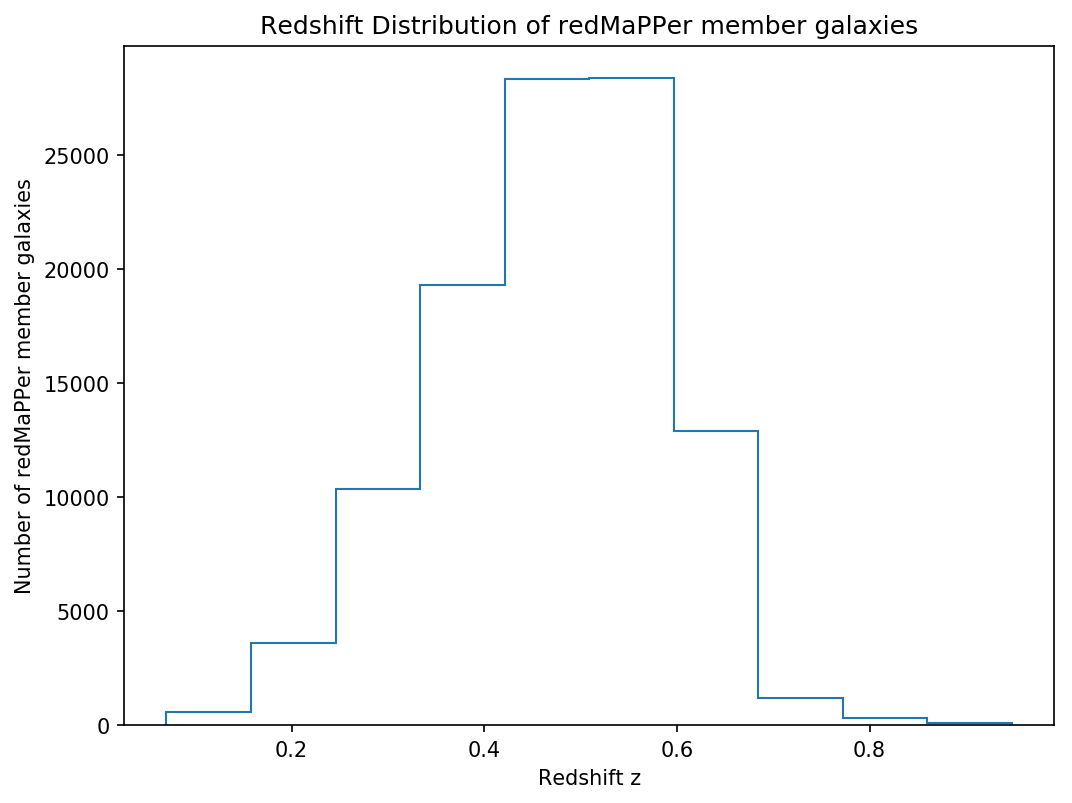

In [28]:
fig,ax=plt.subplots(figsize=(8,6),dpi=150)
ax.hist(members[('All','ZRED2')],histtype='step')
ax.set_xlabel("Redshift z")
ax.set_ylabel("Number of redMaPPer member galaxies")
ax.set_title("Redshift Distribution of redMaPPer member galaxies")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/z_hist.pdf")

# Abs Plots

Aggregated xi:
[-31.9287 -45.5413 -30.5534 -30.411  -19.831   12.4068  56.5369  53.9039
  18.8562  11.8206]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -3270.4744  -6237.2362  -8684.1673 -12299.6673 -17111.2203 -22085.9614
 -24873.4467 -22522.817  -12976.9775  -1283.4677]
------------------------------------------------------------------------------
Aggregated npairs:
[  756.  1618.  2563.  4241.  7064. 11391. 17001. 22830. 25101. 10057.]
------------------------------------------------------------------------------
Mean xi:
[-0.0422 -0.0281 -0.0119 -0.0072 -0.0028  0.0011  0.0033  0.0024  0.0008
  0.0012]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.326  -3.8549 -3.3883 -2.9002 -2.4223 -1.9389 -1.4631 -0.9865 -0.517
 -0.1276]
------------------------------------------------------------------------------


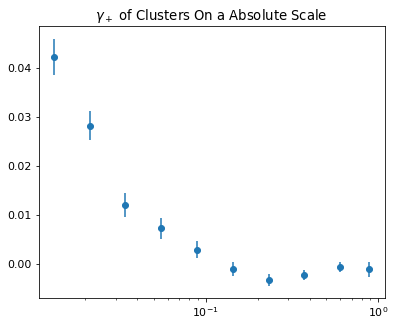

In [29]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

[ 8.0614e-03 -4.0169e-03  8.0985e-04 -8.0003e-04 -1.1234e-03 -1.6914e-05
  3.4635e-04 -8.3508e-05  1.5886e-04  6.9678e-05]
[-1.2262e-04  6.1101e-05 -1.2319e-05  1.2169e-05  1.7087e-05  2.5728e-07
 -5.2684e-06  1.2702e-06 -2.4164e-06 -1.0599e-06]


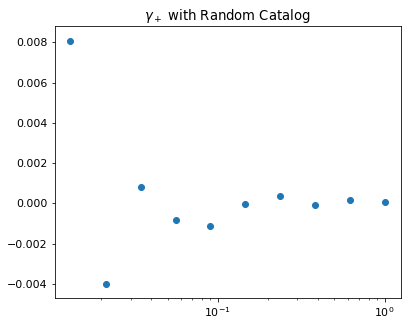

In [30]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

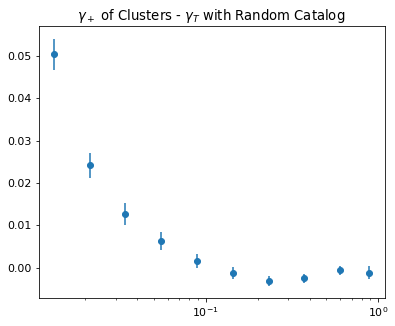

In [31]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

Aggregated xi:
[-21.1173 -40.8097 -40.1438 -24.6775 -42.0851  12.9622  18.4487  41.9417
  29.0067  43.7416]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -1789.9361  -4336.6956  -7163.3725  -9536.5457 -13278.8433 -17579.1658
 -20700.9518 -20040.472  -13281.9982  -2004.5663]
------------------------------------------------------------------------------
Aggregated npairs:
[  416.  1124.  2111.  3281.  5466.  9008. 14028. 19968. 24992. 20981.]
------------------------------------------------------------------------------
Mean xi:
[-0.0508 -0.0363 -0.019  -0.0075 -0.0077  0.0014  0.0013  0.0021  0.0012
  0.0021]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3027 -3.8583 -3.3934 -2.9066 -2.4294 -1.9515 -1.4757 -1.0036 -0.5314
 -0.0955]
------------------------------------------------------------------------------


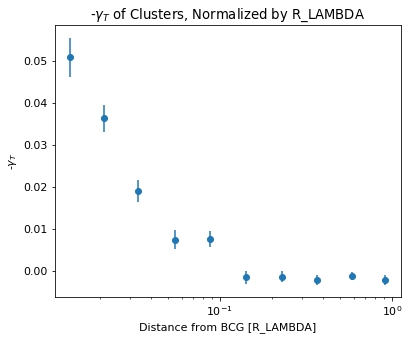

In [32]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"-$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
plt.xlabel("Distance from BCG [R_LAMBDA]")
plt.ylabel(r"-$\gamma_T$")
plt.savefig("/home/adt35/des_y1_catalog/sa-master/images/gamma_T_rel.pdf")
print_data(sum_rel,mean_rel)

In [33]:
print("Error bar size")
print(sig_rel)

Error bar size
[0.0047 0.0032 0.0026 0.0023 0.0019 0.0016 0.0013 0.0011 0.001  0.0011]


In [34]:
np.sqrt(np.dot(np.dot(mean_rel[0],np.linalg.inv(cov_rel)),mean_rel[0]))

18.09303773807688

In [35]:
len(cov_rel)

10

In [36]:
cov_rel

array([[ 2.1895e-05, -6.4492e-08,  2.3650e-07,  3.4631e-07, -1.2260e-07,
         1.3889e-07,  4.6098e-09,  9.6441e-08,  4.8434e-08,  6.5456e-08],
       [-6.4492e-08,  1.0426e-05,  1.6357e-07,  4.9499e-08,  9.7238e-08,
         1.2840e-08,  4.9130e-08,  8.5058e-08,  6.1714e-09, -8.5014e-08],
       [ 2.3650e-07,  1.6357e-07,  6.9734e-06,  7.0925e-08,  1.2502e-07,
        -9.1725e-08,  8.9091e-08,  4.9898e-08, -6.1187e-08,  5.9065e-10],
       [ 3.4631e-07,  4.9499e-08,  7.0925e-08,  5.1951e-06, -2.8396e-08,
        -2.8244e-08,  7.7971e-08,  3.8550e-08,  4.6556e-09, -7.9232e-10],
       [-1.2260e-07,  9.7238e-08,  1.2502e-07, -2.8396e-08,  3.6981e-06,
        -1.8643e-08, -1.8838e-08,  3.0054e-08, -2.5209e-08, -4.1627e-08],
       [ 1.3889e-07,  1.2840e-08, -9.1725e-08, -2.8244e-08, -1.8643e-08,
         2.4247e-06, -8.5287e-09,  3.4956e-09, -6.5076e-08,  4.2275e-08],
       [ 4.6098e-09,  4.9130e-08,  8.9091e-08,  7.7971e-08, -1.8838e-08,
        -8.5287e-09,  1.6500e-06,  2.0541e-08

In [37]:
cov_rel.min()

-1.2260209670591766e-07

In [38]:
cov_rel.max()

2.1894708855266627e-05

In [39]:
ticks_val=np.exp(mean_rel[1])
ticks_string=["{:.2f}".format(val) for val in ticks_val]
print(ticks_string)

['0.01', '0.02', '0.03', '0.05', '0.09', '0.14', '0.23', '0.37', '0.59', '0.91']


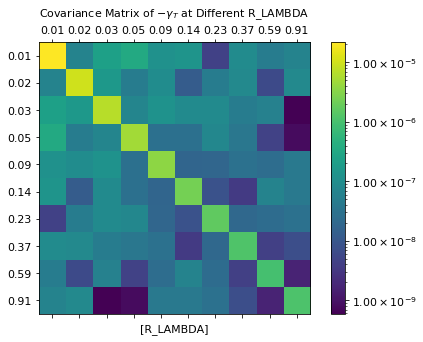

In [40]:
fig,ax=plt.subplots(figsize=(6.2,5))

from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.colors as colors

plt.matshow(np.abs(cov_rel),fignum=0,norm=colors.LogNorm(vmin=np.abs(cov_rel).min(),vmax=np.abs(cov_rel).max()))

ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1.00))

ax.set_xticks(range(len(ticks_val)))
ax.set_yticks(range(len(ticks_val)))

ax.set_xticklabels(ticks_val)


ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(ticks_string))

ax.set_xlabel("[R_LAMBDA]",labelpad=10)

def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)


cb=plt.colorbar(pad=0.06,format=ticker.FuncFormatter(fmt))




ax.set_title('Covariance Matrix of $-\gamma_T$ at Different R_LAMBDA',fontsize=11,pad=12);
plt.savefig('/home/adt35/des_y1_catalog/sa-master/images/cov.pdf')

In [41]:
# print(f.number)

In [42]:
np.dot(mean_rel[0],np.linalg.inv(cov_rel))

array([-2314.1578, -3445.1028, -2531.5522, -1267.7241, -1976.8049,
         621.9854,  1066.621 ,  2342.2174,  1157.1501,  1604.3187])

In [43]:
mean_rel[0]

array([-0.0508, -0.0363, -0.019 , -0.0075, -0.0077,  0.0014,  0.0013,
        0.0021,  0.0012,  0.0021])

In [44]:
cov_rel

array([[ 2.1895e-05, -6.4492e-08,  2.3650e-07,  3.4631e-07, -1.2260e-07,
         1.3889e-07,  4.6098e-09,  9.6441e-08,  4.8434e-08,  6.5456e-08],
       [-6.4492e-08,  1.0426e-05,  1.6357e-07,  4.9499e-08,  9.7238e-08,
         1.2840e-08,  4.9130e-08,  8.5058e-08,  6.1714e-09, -8.5014e-08],
       [ 2.3650e-07,  1.6357e-07,  6.9734e-06,  7.0925e-08,  1.2502e-07,
        -9.1725e-08,  8.9091e-08,  4.9898e-08, -6.1187e-08,  5.9065e-10],
       [ 3.4631e-07,  4.9499e-08,  7.0925e-08,  5.1951e-06, -2.8396e-08,
        -2.8244e-08,  7.7971e-08,  3.8550e-08,  4.6556e-09, -7.9232e-10],
       [-1.2260e-07,  9.7238e-08,  1.2502e-07, -2.8396e-08,  3.6981e-06,
        -1.8643e-08, -1.8838e-08,  3.0054e-08, -2.5209e-08, -4.1627e-08],
       [ 1.3889e-07,  1.2840e-08, -9.1725e-08, -2.8244e-08, -1.8643e-08,
         2.4247e-06, -8.5287e-09,  3.4956e-09, -6.5076e-08,  4.2275e-08],
       [ 4.6098e-09,  4.9130e-08,  8.9091e-08,  7.7971e-08, -1.8838e-08,
        -8.5287e-09,  1.6500e-06,  2.0541e-08

In [45]:
np.linalg.inv(cov_rel)

array([[ 4.5793e+04,  3.2216e+02, -1.5914e+03, -3.0142e+03,  1.5118e+03,
        -2.7295e+03,  1.3180e+02, -3.5540e+03, -2.5457e+03, -2.3949e+03],
       [ 3.2216e+02,  9.6099e+04, -2.1542e+03, -8.3689e+02, -2.3432e+03,
        -7.7723e+02, -2.5185e+03, -6.5003e+03, -8.5393e+02,  6.7813e+03],
       [-1.5914e+03, -2.1542e+03,  1.4391e+05, -1.6861e+03, -4.7840e+03,
         5.7430e+03, -7.7380e+03, -5.3198e+03,  9.6593e+03, -7.6574e+02],
       [-3.0142e+03, -8.3689e+02, -1.6861e+03,  1.9292e+05,  1.4688e+03,
         2.3366e+03, -8.8866e+03, -5.6520e+03, -4.8486e+02, -5.9338e+01],
       [ 1.5118e+03, -2.3432e+03, -4.7840e+03,  1.4688e+03,  2.7092e+05,
         1.8837e+03,  3.5109e+03, -6.4947e+03,  6.6963e+03,  9.3285e+03],
       [-2.7295e+03, -7.7723e+02,  5.7430e+03,  2.3366e+03,  1.8837e+03,
         4.1386e+05,  1.0927e+03, -1.2846e+03,  2.8437e+04, -1.4763e+04],
       [ 1.3180e+02, -2.5185e+03, -7.7380e+03, -8.8866e+03,  3.5109e+03,
         1.0927e+03,  6.0766e+05, -9.5630e+03

In [46]:
np.dot(mean_rel[0], np.dot(np.linalg.inv(cov_rel), mean_rel[0]))

327.3580145914742